In [139]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from scipy import stats

#from kaggle eda
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [140]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',100)

## The Data

There are two data sets included in the data folder: `Ames_Housing_Price_Data.csv` and `Ames_Real_Estate_Data.csv`.

The `Ames_Housing_Price_Data.csv` set contains $81$ data columns, including the key feature **SalePrice** which will be used as the target of the predictive/descriptive modeling. **PID** refers to the land parcel ID, which can merged on the *MapRefNo* column of the **Ames Accessor Data** (`Ames_Real_Estate_Data.csv`) to find the property address. Using a free service, such as **geopy**, we can find the long-lat coordinates of the houses.

The columns of the data are mostly attributes associated with the land and the houses. There are size related attributes, quality and condition attributes, house attachment attributes, etc.

To establish a foundation for your team's data analytics, we offer some insights on the house sizes vs. prices.

In [241]:
import numpy as np
import pandas as pd
%matplotlib inline 

housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [142]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


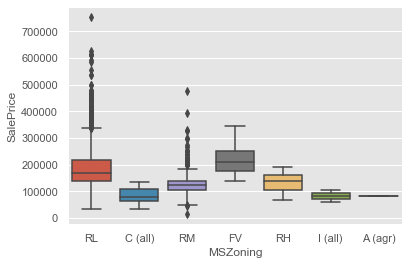

In [407]:
sns.boxplot(x='MSZoning', y='SalePrice', data=housing)


(array([1.15e+02, 1.21e+03, 8.15e+02, 2.81e+02, 1.04e+02, 3.50e+01,
        1.00e+01, 5.00e+00, 4.00e+00, 1.00e+00]),
 array([ 12789. ,  87010.1, 161231.2, 235452.3, 309673.4, 383894.5,
        458115.6, 532336.7, 606557.8, 680778.9, 755000. ]),
 <a list of 10 Patch objects>)

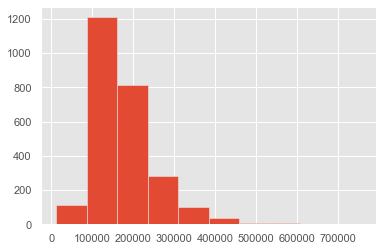

In [406]:
#housing['MSZoning'].value_counts() #group by - hist. 


plt.hist(housing['SalePrice'], bins = 10)



In [285]:
housing['KitchenAbvGr'].describe()

count    2580.00000
mean        1.04031
std         0.20255
min         0.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         3.00000
Name: KitchenAbvGr, dtype: float64

In [286]:
housing['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

In [143]:
housing['HouseStyle'].value_counts()

1Story    1288
2Story     773
1.5Fin     284
SLvl       118
SFoyer      70
2.5Unf      22
1.5Unf      19
2.5Fin       6
Name: HouseStyle, dtype: int64

In [144]:
housing['Neighborhood'].value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Gilbert    143
Somerst    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [145]:
housing['BldgType'].value_counts()

1Fam      2139
TwnhsE     202
Twnhs       98
Duplex      87
2fmCon      54
Name: BldgType, dtype: int64

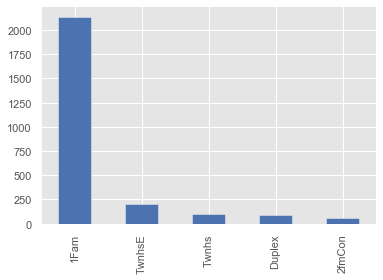

In [146]:
housing['BldgType'].value_counts().plot(kind='bar',y='count', color='b')


In [147]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [149]:
realestate = pd.read_csv('./data/Ames_Real_Estate_Data.csv', index_col=0)
realestate.shape

(22213, 90)

In [150]:
realestate.columns

Index(['GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'ZngCdSc',
       'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S',
       'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2', 'MA_City',
       'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_No',
       'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S', 'OthAc_S',
       'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D', 'X2TSc_D',
       'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 

In [291]:
realestate.head(1)

,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD \nOUTLOT V\n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2019.0,7.0,201906213,2019.0,7.0,NaN,481100,0,0,481100,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [290]:
realestate["Neighborhood"].value_counts()

IOCondo    4100
N Ames     2022
OldTown     959
CollgCr     953
Edwards     889
NW Ames     732
IOC ISU     677
Sawyer      565
NRidgHt     552
Mitchel     531
SawyerW     513
Gilbert     477
Somerst     451
Crawfor     443
BrkSide     443
NoRidge     411
IDOT&RR     389
Timber      366
Wessex      294
ClearCr     269
HaydnLk     246
S&W ISU     203
GrnHill     192
Stonebr     168
HRCondo     154
Veenker     127
Blmngtn     122
DakotaR     121
MeadowV     112
Br'Dale     108
Bluestm      80
NoPkVil      78
Landmrk      61
MsCondo      33
WllwCr1      25
Greens       21
WllwCr2      18
Name: Neighborhood, dtype: int64

### How Does Price/SqrFt Play a Role in Housing Data Analytics?

In [152]:
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

In [153]:
price        = housing['SalePrice']
size_related = housing.filter(regex='SF$|Area$')
size_related.head()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
1,856,7890,0.0,618.0,856.0,856,0,0,399.0,0,0,0
2,1049,4235,149.0,104.0,1049.0,1049,0,0,266.0,0,105,0
3,1001,6060,0.0,100.0,837.0,1001,0,0,216.0,154,0,0
4,1039,8146,0.0,405.0,405.0,717,322,0,281.0,0,0,0
5,1665,8400,0.0,167.0,810.0,810,855,0,528.0,0,45,0


In [154]:
size_related.isnull().sum(axis=0)

GrLivArea        0
LotArea          0
MasVnrArea      14
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
PoolArea         0
dtype: int64

### Performing Unary Feature Selection

In [155]:
size_related = size_related.fillna(0.0)  # We fill the very minor missing values by 0.0
F_values, p_values = f_regression(size_related, housing['SalePrice'])

pd.Series(p_values, index=size_related.columns).sort_values()

GrLivArea        0.000000e+00
TotalBsmtSF     7.306053e-313
1stFlrSF        1.616946e-300
GarageArea      6.423062e-291
MasVnrArea      4.164095e-162
WoodDeckSF       6.015295e-68
OpenPorchSF      2.930048e-57
LotArea          8.303020e-46
2ndFlrSF         4.007008e-42
BsmtUnfSF        8.441921e-18
PoolArea         1.172748e-01
LowQualFinSF     1.173873e-01
dtype: float64

In [156]:
corr = pd.concat([size_related, housing['SalePrice']], axis=1).corr()
corr

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,SalePrice
GrLivArea,1.000000,0.260322,0.385898,0.245993,0.410370,0.539135,0.665001,0.088931,0.476029,0.247716,0.321777,0.057935,0.719981
LotArea,0.260322,1.000000,0.103514,0.019984,0.222261,0.313086,0.022434,-0.000334,0.199159,0.155687,0.084963,0.052636,0.274443
MasVnrArea,0.385898,0.103514,1.000000,0.080349,0.360725,0.361919,0.129439,-0.053804,0.347454,0.149983,0.119097,-0.003637,0.498432
BsmtUnfSF,0.245993,0.019984,0.080349,1.000000,0.422157,0.303093,0.009690,0.048301,0.150678,-0.040390,0.116477,-0.032369,0.168060
TotalBsmtSF,0.410370,0.222261,0.360725,0.422157,1.000000,0.784271,-0.219782,-0.025286,0.465312,0.224190,0.214075,0.009407,0.652494
1stFlrSF,0.539135,0.313086,0.361919,0.303093,0.784271,1.000000,-0.264345,-0.009215,0.480196,0.224613,0.211429,0.076173,0.642613
2ndFlrSF,0.665001,0.022434,0.129439,0.009690,-0.219782,-0.264345,1.000000,0.005935,0.126284,0.087099,0.183689,-0.000226,0.263144
LowQualFinSF,0.088931,-0.000334,-0.053804,0.048301,-0.025286,-0.009215,0.005935,1.000000,-0.033235,-0.007544,-0.003367,-0.005239,-0.030835
GarageArea,0.476029,0.199159,0.347454,0.150678,0.465312,0.480196,0.126284,-0.033235,1.000000,0.239944,0.216076,0.026982,0.634669
WoodDeckSF,0.247716,0.155687,0.149983,-0.040390,0.224190,0.224613,0.087099,-0.007544,0.239944,1.000000,0.032639,0.080744,0.333232


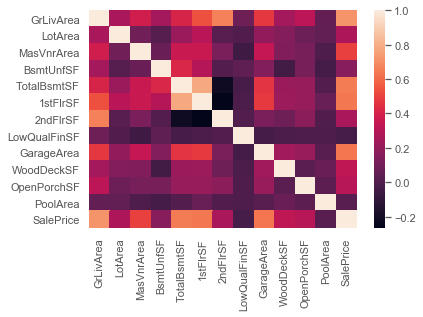

In [157]:
sns.heatmap(corr) #using seasborn imported above

### GrLivArea 

Most of the size related columns have significant p-values on their correlations with **SalePrice**. The **Gross Living Area** (GrLivArea) has a vanishing p-value, which indicates a very strong statistical relationship. We will focus our research on **GrLivArea**.


**question: what do they mean by vanishing p-value?**

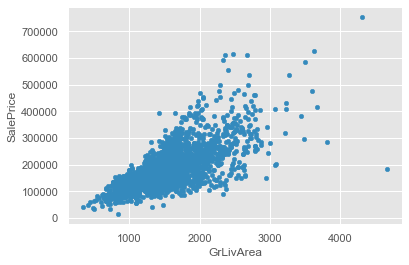

In [158]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice')


In [159]:
lm = LinearRegression()
grLivArea = size_related[['GrLivArea']]
lm.fit(grLivArea, price)
lm.score(grLivArea, price)

0.5183732056699006

In [160]:
lm.fit(np.log10(grLivArea), np.log10(price))
lm.score(np.log10(grLivArea), np.log10(price))

#slight better score with log of liv area

0.5400973491971155

In [161]:
lm.intercept_, lm.coef_

(2.442342023027404, array([0.88110363]))

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset (NA)

1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

In [162]:
housing['SalePrice'].describe()

count      2580.000000
mean     178059.623256
std       75031.089374
min       12789.000000
25%      129975.000000
50%      159900.000000
75%      209625.000000
max      755000.000000
Name: SalePrice, dtype: float64

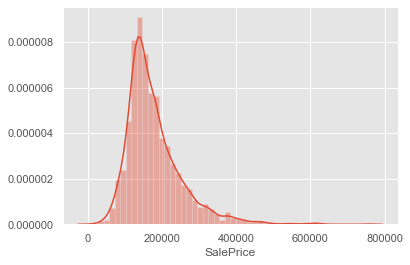

In [163]:
#histogram
sns.distplot(housing['SalePrice']);

In [164]:
#skewness and kurtosis
print("Skewness: %f" % housing['SalePrice'].skew())
print("Kurtosis: %f" % housing['SalePrice'].kurt())

Skewness: 1.760802
Kurtosis: 5.432800


# Linear Regression

In [165]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

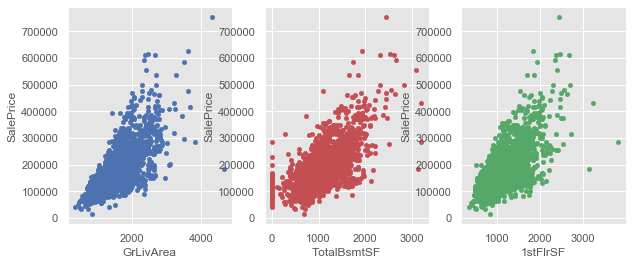

In [166]:
## load data into pandas dataframe
import pandas as pd
housing.head()
## Visualizing data, shown are Sales vs TV, Radio and Newspaper
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
housing.plot(ax=axes[0], kind='scatter', x='GrLivArea', y='SalePrice',c='b')
housing.plot(ax=axes[1], kind='scatter', x='TotalBsmtSF', y='SalePrice',c='r')
housing.plot(ax=axes[2], kind='scatter', x='1stFlrSF', y='SalePrice',c='g')
plt.show()

- GrLivArea, TotalBsmtSF, and 1stFlrSF all seem to have a positive linear relationship with sales price

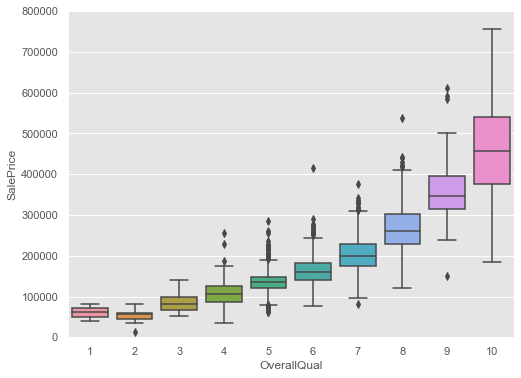

In [167]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#house prices increases when quality increases

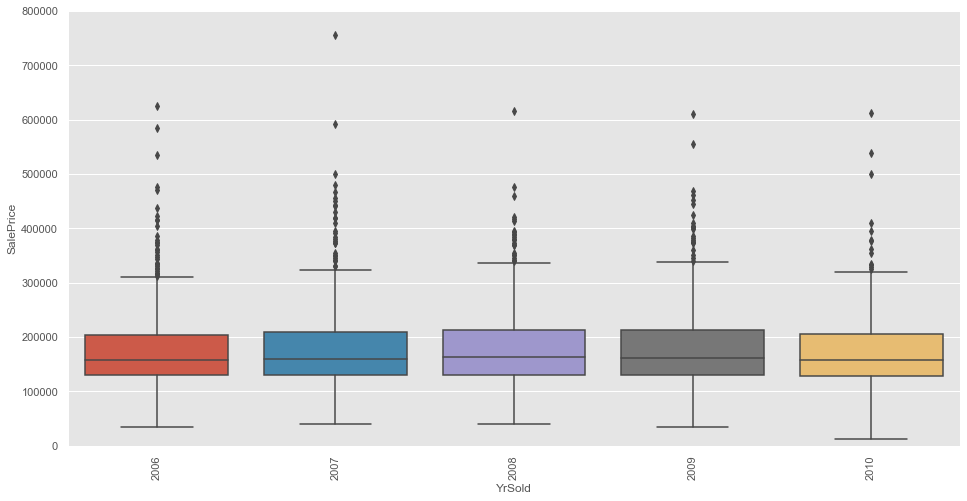

In [168]:
var = 'YrSold'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


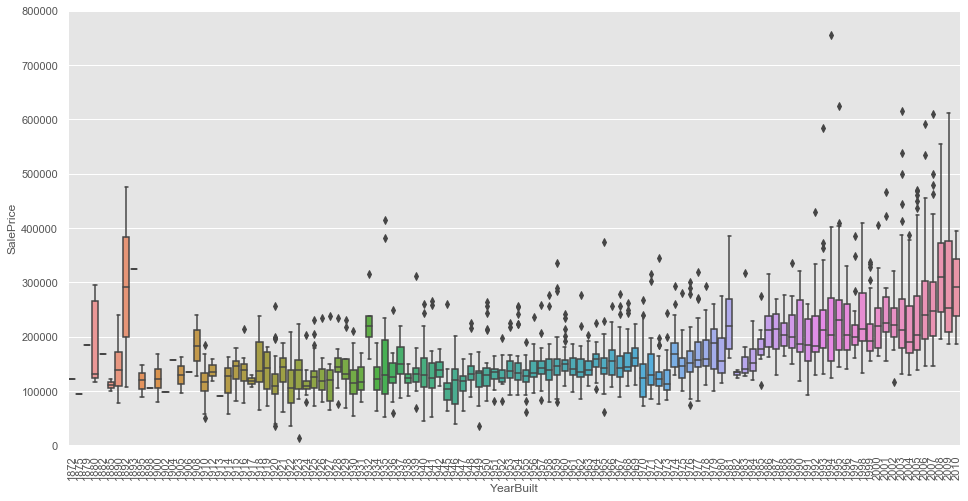

In [169]:
var = 'YearBuilt'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#Although it's not a strong tendency, 
#SalePrice' increases for newer houses

In [170]:
# #scatterplot
# sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(housing[cols], size = 2.5)
# plt.show();

## Dealing with Missing Data

In [171]:
#missing data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,2571,0.996512
MiscFeature,2483,0.962403
Alley,2412,0.934884
Fence,2055,0.796512
FireplaceQu,1241,0.481008
LotFrontage,462,0.179070
GarageQual,129,0.050000
GarageYrBlt,129,0.050000
GarageFinish,129,0.050000
GarageCond,129,0.050000


In [172]:
# #dealing with missing data
# housing = housing.drop((missing_data[missing_data['Total'] > 1]).index,1)
# housing = housing.drop(housing.loc[housing['Electrical'].isnull()].index)
# housing.isnull().sum().max() #just checking that there's no missing data missing



1

In [243]:
#missing data
housing_na = housing.fillna(0.0)
housing_na.shape
housing_na.head()
#just checking that there's no missing data missing

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,0.0,7890,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,0,0,0,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,0,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,0,0,0,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,0,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,0,0,0,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,0,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,0,0,0,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,0,0,0,0,11,2009,WD,Normal


In [174]:
#dealing with missing data
housing2 = housing.dropna(subset=['GrLivArea', 'TotalBsmtSF', '1stFlrSF'])
housing2.shape

(2576, 61)

In [175]:
housing2[['GrLivArea', 'TotalBsmtSF', '1stFlrSF']].mean()

GrLivArea      1486.276398
TotalBsmtSF    1036.916537
1stFlrSF       1145.213121
dtype: float64

In [176]:
## separate the input variables and output variables
X = housing2[['GrLivArea', 'TotalBsmtSF', '1stFlrSF']]  # input varialbe
Y = housing2['SalePrice']  # output variable
ols.fit(X, Y)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X, Y)))
print("Predicted Sale Price: %f" %(ols.predict([[1486, 1036, 1145]])))

Intercept: -27514.630461
Coefficients: [81.9441023  72.39014874  7.63773442]
R^2: 0.672112
Predicted Sale Price: 177995.705567


In [177]:
housing.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.577000e+03,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2576.000000,2576.000000,2576.000000,2576.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2576.000000,2576.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000
mean,7.148966e+08,1486.047342,178047.880481,57.658130,10122.779589,6.045790,5.619325,1970.273962,1983.726814,444.442935,53.300854,539.172748,1036.916537,1145.116414,336.681412,4.249515,1.550252,0.377959,2.850601,1.040357,6.386108,0.604191,1.746894,466.835016,95.937136,46.121847,23.241366,2.514164,16.219247,1.663950,48.788126,6.150951,2007.839348
std,1.886590e+08,488.926708,75068.260932,42.807128,8130.656236,1.367689,1.122462,29.713830,20.488840,429.221385,174.516025,425.398470,418.494060,375.907373,424.155322,44.429215,0.545927,0.499172,0.823161,0.202664,1.535656,0.648779,0.738662,207.563063,129.109952,66.089442,64.140247,25.308514,56.855172,30.357005,499.012606,2.669145,1.312489
min,5.263011e+08,334.000000,12789.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129900.000000,20.000000,7407.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,214.750000,792.750000,872.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354551e+08,1436.000000,159900.000000,50.000000,9382.000000,6.000000,5.000000,1972.000000,1992.000000,384.500000,0.000000,448.000000,979.500000,1072.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,474.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209500.000000,70.000000,11500.000000,7.000000,6.000000,1999.000000,2003.000000,732.000000,0.000000,784.000000,1266.250000,1364.000000,703.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,4.000000,2.000000,6.000000,3.000000,13.000000,4.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [178]:
housing.sample(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
109,534475100,1063,128000,20,RL,9920,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,HdBoard,HdBoard,TA,TA,CBlock,354.0,290.0,412.0,1056.0,GasA,TA,Y,SBrkr,1063,0,0,1,0,3,1,TA,6,Typ,0,1.0,280.0,Y,0,0,164,0,0,0,0,2,2010,WD,Normal
431,528142150,1760,269500,20,RL,12878,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,7,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,Gd,TA,PConc,1262.0,0.0,498.0,1760.0,GasA,Ex,Y,SBrkr,1760,0,0,2,0,3,1,Gd,8,Typ,1,2.0,583.0,Y,165,190,0,0,0,0,0,6,2009,WD,Normal
236,906204180,2559,209000,60,RL,12128,Pave,IR1,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,4,1989,1989,Gable,CompShg,HdBoard,HdBoard,Gd,TA,CBlock,549.0,0.0,319.0,868.0,GasA,Ex,Y,SBrkr,1313,1246,0,2,1,4,1,Ex,9,Typ,1,2.0,506.0,Y,0,245,0,0,168,0,0,11,2006,WD,Abnorml
516,902301060,1510,87500,70,RM,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,4,1910,1950,Gable,CompShg,VinylSd,VinylSd,Gd,Gd,BrkTil,0.0,0.0,677.0,677.0,GasA,TA,Y,SBrkr,833,677,0,2,0,3,1,Gd,7,Typ,0,2.0,720.0,N,0,0,160,0,0,0,0,6,2009,WD,Normal
509,916386060,1444,174000,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0.0,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,2,1,3,1,TA,7,Typ,0,2.0,400.0,Y,100,0,0,0,0,0,0,4,2010,WD,Normal
147,528321010,2794,403000,60,RL,15138,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1995,1996,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,689.0,0.0,773.0,1462.0,GasA,Ex,Y,SBrkr,1490,1304,0,2,1,4,1,Ex,9,Typ,1,3.0,810.0,Y,0,146,202,0,0,0,0,7,2009,WD,Normal
397,902102060,1539,157500,70,RM,10440,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,8,1904,2002,Gable,CompShg,MetalSd,MetalSd,TA,TA,PConc,0.0,0.0,650.0,650.0,GasA,Gd,Y,SBrkr,958,581,0,2,0,3,1,Gd,8,Typ,1,2.0,686.0,P,70,78,68,0,0,0,0,6,2008,WD,Normal
441,914460110,1409,245000,20,RL,12864,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,1392.0,0.0,17.0,1409.0,GasA,Ex,Y,SBrkr,1409,0,0,1,1,1,1,Gd,4,Typ,1,2.0,576.0,Y,0,144,0,0,145,0,0,7,2007,WD,Normal
234,905104030,913,129000,85,RL,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,TA,TA,CBlock,187.0,627.0,0.0,814.0,GasA,Gd,Y,SBrkr,913,0,0,1,0,3,1,TA,6,Typ,0,1.0,240.0,Y,0,0,252,0,0,0,0,5,2007,WD,Normal
360,905451320,1144,129000,20,RL,9571,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1956,1956,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,739.0,0.0,405.0,1144.0,GasA,TA,Y,SBrkr,1144,0,0,1,0,3,1,TA,6,Typ,0,1.0,596.0,Y,44,0,0,0,0,0,0,6,2010,WD,Normal


### categorical input variables

In [209]:
#Practicing Dumifying variables 
# may want to dumify neighborhood

# Kitchen Quality 

# KitchenQual_dummy = pd.get_dummies(housing['KitchenQual'])
# KitchenQual_dummy.head()


In [208]:
#KitchenQual_dummy.drop('Ex', 1)

In [207]:
#pd.DataFrame(housing.columns, columns=['Column_Name'])

In [272]:
X = housing_na.filter(regex='SF$|Area$')
y = housing_na['SalePrice']

X.columns

Index(['GrLivArea', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'PoolArea'],
      dtype='object')

In [273]:
from sklearn.model_selection import train_test_split
# np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)


In [274]:
ols.fit(X, y)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X, y)))
# print("Predicted Sale Price: %f" %(ols.predict([[1486, 1036, 1145]])))



Intercept: -21035.325464
Coefficients: [ 32.02253264   0.17789347  52.02776045 -23.45416583  66.90612375
  30.39223821  33.82747245 -32.19717803  76.55641347  40.15655349
  49.90911546 -35.31401226]
R^2: 0.756813


#### dealing with outliers


In [185]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(housing_na['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.20247416]
 [-1.90787898]
 [-1.90654663]
 [-1.90240304]
 [-1.84925573]
 [-1.8399293 ]
 [-1.77331196]
 [-1.75332676]
 [-1.70669463]
 [-1.68004769]]

outer range (high) of the distribution:
[[4.75518689]
 [4.7951573 ]
 [5.02165624]
 [5.41469851]
 [5.50912193]
 [5.75444692]
 [5.77652391]
 [5.82106426]
 [5.95429893]
 [7.68634965]]


In [186]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()

ols.fit(X_train, y_train)

print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))


R^2 for train set: 0.745573
--------------------------------------------------
R^2 for test  set: 0.742067


In [187]:
import pandas as pd

## separate the input variables and output variables
X1 = housing2[['GrLivArea', 'TotalBsmtSF', '1stFlrSF']]  # input varialbe
y1 = housing2['SalePrice']  # output variable

X1.describe()

,GrLivArea,TotalBsmtSF,1stFlrSF
count,2576.000000,2576.000000,2576.000000
mean,1486.276398,1036.916537,1145.213121
std,488.883322,418.494060,375.948293
min,334.000000,0.000000,334.000000
25%,1112.000000,792.750000,872.000000
50%,1436.000000,979.500000,1072.000000
75%,1733.250000,1266.250000,1364.000000
max,4676.000000,3206.000000,3820.000000


In [188]:
# try:  # train_test_split was moved in 0.18.0
#     from sklearn.model_selection import train_test_split
# except:  # Following import works through 0.19 but outputs a warning in 0.18
#     from sklearn.cross_validation import train_test_split
# X1_train, X1_test, y1_train, y1_test = train_test_split(housing2, y1, test_size=0.3, random_state=42)

from sklearn.model_selection import train_test_split
# np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42, test_size=0.2)




In [189]:
#### Your code here
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()

ols.fit(X1_train, y1_train)

print("R^2 for train set: %f" %ols.score(X1_train, y1_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X1_test, y1_test))



R^2 for train set: 0.680305
--------------------------------------------------
R^2 for test  set: 0.635768


In [190]:
# lasso
from sklearn.linear_model import Lasso

lasso = Lasso(normalize = True, alpha = 1e-4)
lasso.fit(X1, y1)

for ftname, beta in zip( X1.columns, lasso.coef_ ):
    print( f"{ftname}>> {beta}")

GrLivArea>> 81.94409740244672
TotalBsmtSF>> 72.39019979303063
1stFlrSF>> 7.637679777891398


In [191]:
#ridge
from sklearn.linear_model import Ridge

ridge = Ridge(normalize = True, alpha = 1e-4)
ridge.fit(X1, y1)

for ftname, beta in zip( X1.columns, ridge.coef_ ):
    print( f"{ftname}>> {beta}")

GrLivArea>> 81.93271649584663
TotalBsmtSF>> 72.3722872725338
1stFlrSF>> 7.66054857469576


In [192]:
# Detecting Multicollinearity Among Features


In [193]:
housing2.sample(3)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
236,906392110,1498,237000,20,RL,11645,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,24.0,0.0,1474.0,1498.0,GasA,Ex,Y,SBrkr,1498,0,0,2,0,3,1,Gd,7,Typ,1,3.0,844.0,Y,144,98,0,0,0,0,0,3,2009,WD,Normal
815,907250070,1611,250000,20,RL,11664,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,Gd,TA,PConc,1234.0,0.0,335.0,1569.0,GasA,Ex,Y,SBrkr,1611,0,0,2,0,3,1,Gd,6,Typ,0,3.0,1231.0,Y,262,93,0,0,0,0,0,9,2009,WD,Normal
804,909176140,1691,127000,50,RL,5000,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,TA,TA,BrkTil,218.0,0.0,808.0,1026.0,GasA,TA,Y,SBrkr,1026,665,0,2,0,3,1,Gd,6,Typ,1,1.0,308.0,Y,0,0,242,0,0,0,0,5,2010,WD,Normal


In [194]:
continuous_features.sample(3).astype('float')

,GrLivArea,LotArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
320,1720.0,11645.0,860.0,860.0,860.0,860.0,0.0,565.0,0.0,70.0,0.0
733,2071.0,15584.0,825.0,825.0,2071.0,0.0,0.0,336.0,131.0,28.0,0.0
462,2168.0,8660.0,760.0,760.0,928.0,928.0,312.0,576.0,467.0,160.0,0.0


In [195]:
# continuous_features = housing2.filter(regex='SF$|Area$')
# continuous_features = continuous_features.sample(3).astype('float')
# scores = {}
# ols2 = LinearRegression()
# from sklearn.metrics import r2_score
# for feature_name in continuous_features:
#                 housing3     = housing2.copy()
#                 feature = housing3[feature_name].copy()
#                 housing3.drop(feature_name, axis=1, inplace=True)
#                 ols2.fit(housing3, feature)
#                 scores[feature_name] = ols2.score(housing3, feature)   

### Beyond Basic EDA
(B) Isabel

How is GrLivArea engineered from the other area-related feature? If you would design a gross area feature (to replace GrLivArea) for the purpose of descriptive modeling, what would you do? What are the pros and cons when aggregating several features together?

Do home buyers value upstairs bathrooms and basement bathrooms equally? Do they price 'half-bath' as one half of a full bath? Based on your finding, how would you design an aggregate bathroom feature?

- 'TotalBsmtSF' = BsmtFinSF1' + 'BsmtFinSF2' + 'BsmtUnfSF'  

- 'GrLivArea' =  '1stFlrSF' + '2ndFlrSF' + LowQualFinSF' 



In [196]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [197]:
print(sum(housing['TotalBsmtSF'].fillna(0.0)))
sum(housing['BsmtFinSF1'].fillna(0.0))+ sum(housing['BsmtFinSF2'].fillna(0.0)) + sum(housing['BsmtUnfSF'].fillna(0.0))  # We fill the very minor missing values by 0.0



2671097.0


2671097.0

In [198]:
print(sum(housing['GrLivArea'].fillna(0.0)))
sum(housing['1stFlrSF'].fillna(0.0))+sum(housing['2ndFlrSF'].fillna(0.0))+sum(housing['LowQualFinSF'].fillna(0.0))


3829544


3829544

In [279]:
X_GL = housing2[['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'TotalBsmtSF']]  # input varialbe
Y_GL = housing2['SalePrice']  # output variable
ols.fit(X_GL, Y_GL)

print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X_GL, Y_GL)))


Intercept: -28121.669255
Coefficients: [-1.17199005e+15  1.17199005e+15  1.17199005e+15  1.17199005e+15
  7.18325336e+01]
R^2: 0.676782


In [280]:
housing2['BsmtUnfSF']

1       618.0
2       104.0
3       100.0
4       405.0
5       167.0
6         0.0
7       936.0
8      1146.0
9       217.0
10       80.0
11     1318.0
12      166.0
13      861.0
14      785.0
15      726.0
16      284.0
17      349.0
18      823.0
19      410.0
20        0.0
21     1461.0
22      516.0
23      188.0
24     1240.0
25      225.0
26      608.0
27     1450.0
28      378.0
29      216.0
30      564.0
31      190.0
32     1246.0
33     1324.0
34      833.0
35      363.0
36     1258.0
37      342.0
38       76.0
39      692.0
40      263.0
41     1519.0
42      748.0
43      675.0
44      744.0
45      736.0
46     1158.0
47      847.0
48      476.0
49      357.0
50      440.0
        ...  
714       0.0
715       0.0
716     190.0
717     150.0
718       0.0
719     588.0
720     219.0
721    1560.0
722     639.0
723     484.0
724    1768.0
725    1078.0
726     208.0
727     148.0
728     548.0
729     297.0
730     357.0
731     236.0
732     813.0
733     322.0
734   

In [278]:
corr2 = pd.concat([size_related, housing['GrLivArea']], axis=1).corr()
corr2

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,GrLivArea
GrLivArea,1.000000,0.260322,0.385898,0.245993,0.410370,0.539135,0.665001,0.088931,0.476029,0.247716,0.321777,0.057935,1.000000
LotArea,0.260322,1.000000,0.103514,0.019984,0.222261,0.313086,0.022434,-0.000334,0.199159,0.155687,0.084963,0.052636,0.260322
MasVnrArea,0.385898,0.103514,1.000000,0.080349,0.360725,0.361919,0.129439,-0.053804,0.347454,0.149983,0.119097,-0.003637,0.385898
BsmtUnfSF,0.245993,0.019984,0.080349,1.000000,0.422157,0.303093,0.009690,0.048301,0.150678,-0.040390,0.116477,-0.032369,0.245993
TotalBsmtSF,0.410370,0.222261,0.360725,0.422157,1.000000,0.784271,-0.219782,-0.025286,0.465312,0.224190,0.214075,0.009407,0.410370
1stFlrSF,0.539135,0.313086,0.361919,0.303093,0.784271,1.000000,-0.264345,-0.009215,0.480196,0.224613,0.211429,0.076173,0.539135
2ndFlrSF,0.665001,0.022434,0.129439,0.009690,-0.219782,-0.264345,1.000000,0.005935,0.126284,0.087099,0.183689,-0.000226,0.665001
LowQualFinSF,0.088931,-0.000334,-0.053804,0.048301,-0.025286,-0.009215,0.005935,1.000000,-0.033235,-0.007544,-0.003367,-0.005239,0.088931
GarageArea,0.476029,0.199159,0.347454,0.150678,0.465312,0.480196,0.126284,-0.033235,1.000000,0.239944,0.216076,0.026982,0.476029
WoodDeckSF,0.247716,0.155687,0.149983,-0.040390,0.224190,0.224613,0.087099,-0.007544,0.239944,1.000000,0.032639,0.080744,0.247716


Do home buyers value upstairs bathrooms and basement bathrooms equally? Do they price 'half-bath' as one half of a full bath? Based on your finding, how would you design an aggregate bathroom feature?
- 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'

‘Bathrooms’ = BsmtFullBath + BsmtHalfBath * 0.5 + FullBath + HalfBath * 0.5


‘Bathrooms’ = FullBath + HalfBath(0.5) + BsmtFullBath(.6) + BsmtHalfBath(0.2) 



In [199]:
housing_bath2 = housing.fillna(0.0)
housing_bath2 = housing_bath


In [200]:
## separate the input variables and output variables
X2 = housing_bath[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]  # input varialbe
y2 = housing_bath['SalePrice']  # output variable

X2.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
1,1.0,0.0,1,0
2,1.0,0.0,2,0
3,0.0,0.0,1,0
4,0.0,0.0,1,0
5,1.0,0.0,2,1


In [201]:
ols.fit(X2, y2)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))


Intercept: 36411.467820
Coefficients: [46581.74474426 16327.75872485 69639.06554285 32755.7538322 ]


- 'BsmtFullBath', 46581.74 
- 'BsmtHalfBath', 16327.75
- 'FullBath', 69639.06
- 'HalfBath' 32755.75

In [248]:
housing_na['HalfBath2'] = housing_na['HalfBath'].fillna(0.0)*0.5
housing_na['BsmtFullBath2'] = housing_na['BsmtFullBath'].fillna(0.0)*.6 
housing_na['BsmtHalfBath2'] = housing_na['BsmtHalfBath'].fillna(0.0)*.2

In [249]:
housing_na['bathroom'] = housing_na['FullBath'] + housing_na['HalfBath2'] + housing_na['BsmtFullBath2'] + housing_na['BsmtHalfBath2']

#FullBath + HalfBath(0.5) + BsmtFullBath(.6) + BsmtHalfBath(0.2)



In [233]:
housing_na['bathroom'].sample(10)

746    2.5
418    1.6
662    2.2
683    1.6
321    3.1
455    2.6
875    3.1
136    1.6
264    2.6
246    2.5
Name: bathroom, dtype: float64

In [120]:
46581.74 * .4

18632.696

In [111]:
 69639.06 * .5

34819.53

In [112]:
32755.75/69639.06

0.4703646200853372

In [115]:
16327.75/46581.74

0.3505182502843389

In [113]:
46581.74/69639.06

0.6689024808778292

In [121]:
16327.75/69639.06

0.23446252720815014

In [114]:
(69639.06-46581.74)/46581.74

0.49498623280281073

In [244]:
housing_na["BsmtFin"] =  housing_na['BsmtFinSF1'] + housing_na['BsmtFinSF2']

In [282]:
housing_na["BsmtFin"]

1       238.0
2       945.0
3       737.0
4         0.0
5       643.0
6         0.0
7         0.0
8         0.0
9       647.0
10      467.0
11       24.0
12      458.0
13        0.0
14      609.0
15      810.0
16      602.0
17      925.0
18       41.0
19     1200.0
20      384.0
21        0.0
22      273.0
23      358.0
24        0.0
25      300.0
26        0.0
27       16.0
28      378.0
29      891.0
30     1430.0
31        0.0
32        0.0
33        0.0
34        0.0
35      906.0
36       78.0
37      500.0
38      416.0
39      156.0
40      725.0
41        0.0
42      336.0
43      637.0
44      181.0
45        0.0
46        0.0
47        0.0
48      292.0
49      579.0
50        0.0
        ...  
714     700.0
715     570.0
716     883.0
717     714.0
718    1060.0
719     700.0
720     651.0
721       0.0
722     870.0
723     399.0
724       0.0
725       0.0
726    1270.0
727     632.0
728     141.0
729       0.0
730     329.0
731     809.0
732       0.0
733     606.0
734   

In [259]:
housing_na.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [261]:
housing_na.dtypes

PID                int64
GrLivArea          int64
SalePrice          int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64


In [275]:
# Xx = housing_na[['GrLivArea','LotFrontage', 'LotArea',
#                 'Alley', 'OverallQual', 'OverallCond',
#        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
#         'bathroom','BedroomAbvGr', 'KitchenAbvGr',
#        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
#        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
#        'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'BsmtFin']].astype('float')
# yy = housing_na['SalePrice']

# Xx.head()



In [276]:
# from sklearn.model_selection import train_test_split
# # np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
# Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, random_state = 42, test_size=0.2)




# #### Your code here
# from sklearn.linear_model import LinearRegression 

# ols = LinearRegression()

# ols.fit(Xx_train, yy_train)

# print("R^2 for train set: %f" %ols.score(Xx_train, yy_train))

# print('-'*50)

# print("R^2 for test  set: %f" %ols.score(Xx_test, yy_test))



In [277]:
# # lasso
# from sklearn.linear_model import Lasso

# lasso = Lasso(normalize = True, alpha = 1e-4)
# lasso.fit(Xx, yy)

# for ftname, beta in zip( X1.columns, lasso.coef_ ):
#     print( f"{ftname}>> {beta}")

In [409]:
from geopy.geocoders import Nominatim
# location = geolocator.geocode("2400 SE 16TH ST AMES, IA")

geolocator = Nominatim(user_agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36")
geolocator.geocode("329 W 35th St New York, NY 10001")
    
    

Location(West 35th Street, Midtown South, New York County, Manhattan Community Board 5, New York, 10001, United States of America, (40.7494541, -73.9849089, 0.0))

In [ ]:
# get neighborhood 
>>> from geopy.geocoders import Nominatim
>>> geolocator = Nominatim(user_agent="specify_your_app_name_here")
>>> location = geolocator.geocode("175 5th Avenue NYC")
>>> print(location.address)
Flatiron Building, 175, 5th Avenue, Flatiron, New York, NYC, New York, ...
>>> print((location.latitude, location.longitude))
(40.7410861, -73.9896297241625)
>>> print(location.raw)

In [401]:
get_lat_log("Ames High School 1921 Ames High Drive Ames, IA 50010")

(42.0403449, -93.634264)

In [388]:
# Function to get Latitude and Longitude

from geopy.geocoders import Nominatim
# location = geolocator.geocode("2400 SE 16TH ST AMES, IA")

def get_lat_log(address):
    geolocator = Nominatim(user_agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36")
    geocode = lambda query: geolocator.geocode("%s, AMES IA" % query)
    location = geocode(address)
    
    if location == None:
        return None 
    
    return (location.latitude, location.longitude)

In [ ]:
# # Function to get distance from schools
# from geopy.distance import geodesic

# def get_school_dist(address, school):
#     lat_log = get_lat_log(address)
#     school = get_lat_log(school)
    
#     return(geodesic(lat_log, school).miles)

In [378]:
# Function to get distance from schools
from geopy.distance import geodesic

def get_school_dist(lat_log, school_lat_log):
    """ Get School Distance
    :lat_log - tuple, address lat and log
    :school_lst_log -tuple, school lat and log
    Return: distance between both addresses
    """
    return(geodesic(lat_log, school_lat_log).miles)

In [374]:
#saving 
#covert dict to json
import json

def to_json_string(list_dict):
    ''' converts dict to json'''
    if list_dict is None or list_dict == []:
        return '[]'
    return json.dumps[list_dict]

#save json to json file
def save_to_file(ListObj_dict, name):
    ''' write into a .json file'''
    with open(name + '.json', 'w') as f:
        f.write(to_json_string(ListObj_dict))
    print(f'Saved to {name}.json')
    

##### for loop to get two lists for distance to highschool and distance to Iowa State

In [379]:
from time import sleep


addresses = realestate["Prop_Addr"]

total_addresses = len(addresses)
count = 0
none_count_hs = 0
none_count_c = 0

high_school = "Ames High School 1921 Ames High Drive Ames, IA 50010"
hs_lat_log = get_lat_log(high_school)

college = "100 Enrollment Services Ctr"
c_lat_log = get_lat_log(college)

address_lat_log = []
highschool_dist = []
college_dist = []

for address in addresses:
    sleep(.25)
    lat_log = get_lat_log(address)
    address_lat_log.append(lat_log)
    
    dist_hs = get_school_dist(lat_log, hs_lat_log)
    if dist_hs is None:
        dist_hs = 0
        non_count_hs += 1
    highschool_dist.append(dist_hs) 
    
    sleep(.25)
    dist_c = get_school_dist(lat_log, c_lat_log)
    if dist_c is None:
        dist_c = 0
        non_count_c += 1
    college_dist.append(dist_c)
    
    
    count += 1
    print(f"On address {count} out of {total_addresses}")
    print(f"Got None: High School: {none_count_hs} college: {none_count_c}")

print("Done!")

# save_to_file(address_lat_log, "address_lat_log")
# save_to_file(highschool_dist, "highschool_dist")
# save_to_file(college_dist, "college_dist")


On address 1 out of 22213
Got None: High School: 0 college: 0
On address 2 out of 22213
Got None: High School: 0 college: 0
On address 3 out of 22213
Got None: High School: 0 college: 0
On address 4 out of 22213
Got None: High School: 0 college: 0
On address 5 out of 22213
Got None: High School: 0 college: 0
On address 6 out of 22213
Got None: High School: 0 college: 0
On address 7 out of 22213
Got None: High School: 0 college: 0
On address 8 out of 22213
Got None: High School: 0 college: 0
On address 9 out of 22213
Got None: High School: 0 college: 0
On address 10 out of 22213
Got None: High School: 0 college: 0
On address 11 out of 22213
Got None: High School: 0 college: 0
On address 12 out of 22213
Got None: High School: 0 college: 0
On address 13 out of 22213
Got None: High School: 0 college: 0
On address 14 out of 22213
Got None: High School: 0 college: 0
On address 15 out of 22213
Got None: High School: 0 college: 0
On address 16 out of 22213
Got None: High School: 0 college: 0
O

On address 131 out of 22213
Got None: High School: 0 college: 0
On address 132 out of 22213
Got None: High School: 0 college: 0
On address 133 out of 22213
Got None: High School: 0 college: 0
On address 134 out of 22213
Got None: High School: 0 college: 0
On address 135 out of 22213
Got None: High School: 0 college: 0
On address 136 out of 22213
Got None: High School: 0 college: 0
On address 137 out of 22213
Got None: High School: 0 college: 0
On address 138 out of 22213
Got None: High School: 0 college: 0
On address 139 out of 22213
Got None: High School: 0 college: 0
On address 140 out of 22213
Got None: High School: 0 college: 0
On address 141 out of 22213
Got None: High School: 0 college: 0
On address 142 out of 22213
Got None: High School: 0 college: 0
On address 143 out of 22213
Got None: High School: 0 college: 0
On address 144 out of 22213
Got None: High School: 0 college: 0
On address 145 out of 22213
Got None: High School: 0 college: 0
On address 146 out of 22213
Got None: Hi

On address 260 out of 22213
Got None: High School: 0 college: 0
On address 261 out of 22213
Got None: High School: 0 college: 0
On address 262 out of 22213
Got None: High School: 0 college: 0
On address 263 out of 22213
Got None: High School: 0 college: 0
On address 264 out of 22213
Got None: High School: 0 college: 0
On address 265 out of 22213
Got None: High School: 0 college: 0
On address 266 out of 22213
Got None: High School: 0 college: 0
On address 267 out of 22213
Got None: High School: 0 college: 0
On address 268 out of 22213
Got None: High School: 0 college: 0
On address 269 out of 22213
Got None: High School: 0 college: 0
On address 270 out of 22213
Got None: High School: 0 college: 0
On address 271 out of 22213
Got None: High School: 0 college: 0
On address 272 out of 22213
Got None: High School: 0 college: 0
On address 273 out of 22213
Got None: High School: 0 college: 0
On address 274 out of 22213
Got None: High School: 0 college: 0
On address 275 out of 22213
Got None: Hi

On address 389 out of 22213
Got None: High School: 0 college: 0
On address 390 out of 22213
Got None: High School: 0 college: 0
On address 391 out of 22213
Got None: High School: 0 college: 0
On address 392 out of 22213
Got None: High School: 0 college: 0
On address 393 out of 22213
Got None: High School: 0 college: 0
On address 394 out of 22213
Got None: High School: 0 college: 0
On address 395 out of 22213
Got None: High School: 0 college: 0
On address 396 out of 22213
Got None: High School: 0 college: 0
On address 397 out of 22213
Got None: High School: 0 college: 0
On address 398 out of 22213
Got None: High School: 0 college: 0
On address 399 out of 22213
Got None: High School: 0 college: 0
On address 400 out of 22213
Got None: High School: 0 college: 0
On address 401 out of 22213
Got None: High School: 0 college: 0
On address 402 out of 22213
Got None: High School: 0 college: 0
On address 403 out of 22213
Got None: High School: 0 college: 0
On address 404 out of 22213
Got None: Hi

On address 518 out of 22213
Got None: High School: 0 college: 0
On address 519 out of 22213
Got None: High School: 0 college: 0
On address 520 out of 22213
Got None: High School: 0 college: 0
On address 521 out of 22213
Got None: High School: 0 college: 0
On address 522 out of 22213
Got None: High School: 0 college: 0
On address 523 out of 22213
Got None: High School: 0 college: 0
On address 524 out of 22213
Got None: High School: 0 college: 0
On address 525 out of 22213
Got None: High School: 0 college: 0
On address 526 out of 22213
Got None: High School: 0 college: 0
On address 527 out of 22213
Got None: High School: 0 college: 0
On address 528 out of 22213
Got None: High School: 0 college: 0
On address 529 out of 22213
Got None: High School: 0 college: 0
On address 530 out of 22213
Got None: High School: 0 college: 0
On address 531 out of 22213
Got None: High School: 0 college: 0
On address 532 out of 22213
Got None: High School: 0 college: 0
On address 533 out of 22213
Got None: Hi

On address 647 out of 22213
Got None: High School: 0 college: 0
On address 648 out of 22213
Got None: High School: 0 college: 0
On address 649 out of 22213
Got None: High School: 0 college: 0
On address 650 out of 22213
Got None: High School: 0 college: 0
On address 651 out of 22213
Got None: High School: 0 college: 0
On address 652 out of 22213
Got None: High School: 0 college: 0
On address 653 out of 22213
Got None: High School: 0 college: 0
On address 654 out of 22213
Got None: High School: 0 college: 0
On address 655 out of 22213
Got None: High School: 0 college: 0
On address 656 out of 22213
Got None: High School: 0 college: 0
On address 657 out of 22213
Got None: High School: 0 college: 0
On address 658 out of 22213
Got None: High School: 0 college: 0
On address 659 out of 22213
Got None: High School: 0 college: 0
On address 660 out of 22213
Got None: High School: 0 college: 0
On address 661 out of 22213
Got None: High School: 0 college: 0
On address 662 out of 22213
Got None: Hi

On address 776 out of 22213
Got None: High School: 0 college: 0
On address 777 out of 22213
Got None: High School: 0 college: 0
On address 778 out of 22213
Got None: High School: 0 college: 0
On address 779 out of 22213
Got None: High School: 0 college: 0
On address 780 out of 22213
Got None: High School: 0 college: 0
On address 781 out of 22213
Got None: High School: 0 college: 0
On address 782 out of 22213
Got None: High School: 0 college: 0
On address 783 out of 22213
Got None: High School: 0 college: 0
On address 784 out of 22213
Got None: High School: 0 college: 0
On address 785 out of 22213
Got None: High School: 0 college: 0
On address 786 out of 22213
Got None: High School: 0 college: 0
On address 787 out of 22213
Got None: High School: 0 college: 0
On address 788 out of 22213
Got None: High School: 0 college: 0
On address 789 out of 22213
Got None: High School: 0 college: 0
On address 790 out of 22213
Got None: High School: 0 college: 0
On address 791 out of 22213
Got None: Hi

On address 905 out of 22213
Got None: High School: 0 college: 0
On address 906 out of 22213
Got None: High School: 0 college: 0
On address 907 out of 22213
Got None: High School: 0 college: 0
On address 908 out of 22213
Got None: High School: 0 college: 0
On address 909 out of 22213
Got None: High School: 0 college: 0
On address 910 out of 22213
Got None: High School: 0 college: 0
On address 911 out of 22213
Got None: High School: 0 college: 0
On address 912 out of 22213
Got None: High School: 0 college: 0
On address 913 out of 22213
Got None: High School: 0 college: 0
On address 914 out of 22213
Got None: High School: 0 college: 0
On address 915 out of 22213
Got None: High School: 0 college: 0
On address 916 out of 22213
Got None: High School: 0 college: 0
On address 917 out of 22213
Got None: High School: 0 college: 0
On address 918 out of 22213
Got None: High School: 0 college: 0
On address 919 out of 22213
Got None: High School: 0 college: 0
On address 920 out of 22213
Got None: Hi

On address 1033 out of 22213
Got None: High School: 0 college: 0
On address 1034 out of 22213
Got None: High School: 0 college: 0
On address 1035 out of 22213
Got None: High School: 0 college: 0
On address 1036 out of 22213
Got None: High School: 0 college: 0
On address 1037 out of 22213
Got None: High School: 0 college: 0
On address 1038 out of 22213
Got None: High School: 0 college: 0
On address 1039 out of 22213
Got None: High School: 0 college: 0
On address 1040 out of 22213
Got None: High School: 0 college: 0
On address 1041 out of 22213
Got None: High School: 0 college: 0
On address 1042 out of 22213
Got None: High School: 0 college: 0
On address 1043 out of 22213
Got None: High School: 0 college: 0
On address 1044 out of 22213
Got None: High School: 0 college: 0
On address 1045 out of 22213
Got None: High School: 0 college: 0
On address 1046 out of 22213
Got None: High School: 0 college: 0
On address 1047 out of 22213
Got None: High School: 0 college: 0
On address 1048 out of 22

On address 1160 out of 22213
Got None: High School: 0 college: 0
On address 1161 out of 22213
Got None: High School: 0 college: 0
On address 1162 out of 22213
Got None: High School: 0 college: 0
On address 1163 out of 22213
Got None: High School: 0 college: 0
On address 1164 out of 22213
Got None: High School: 0 college: 0
On address 1165 out of 22213
Got None: High School: 0 college: 0
On address 1166 out of 22213
Got None: High School: 0 college: 0
On address 1167 out of 22213
Got None: High School: 0 college: 0
On address 1168 out of 22213
Got None: High School: 0 college: 0
On address 1169 out of 22213
Got None: High School: 0 college: 0
On address 1170 out of 22213
Got None: High School: 0 college: 0
On address 1171 out of 22213
Got None: High School: 0 college: 0
On address 1172 out of 22213
Got None: High School: 0 college: 0
On address 1173 out of 22213
Got None: High School: 0 college: 0
On address 1174 out of 22213
Got None: High School: 0 college: 0
On address 1175 out of 22

On address 1287 out of 22213
Got None: High School: 0 college: 0
On address 1288 out of 22213
Got None: High School: 0 college: 0
On address 1289 out of 22213
Got None: High School: 0 college: 0
On address 1290 out of 22213
Got None: High School: 0 college: 0
On address 1291 out of 22213
Got None: High School: 0 college: 0
On address 1292 out of 22213
Got None: High School: 0 college: 0
On address 1293 out of 22213
Got None: High School: 0 college: 0
On address 1294 out of 22213
Got None: High School: 0 college: 0
On address 1295 out of 22213
Got None: High School: 0 college: 0
On address 1296 out of 22213
Got None: High School: 0 college: 0
On address 1297 out of 22213
Got None: High School: 0 college: 0
On address 1298 out of 22213
Got None: High School: 0 college: 0
On address 1299 out of 22213
Got None: High School: 0 college: 0
On address 1300 out of 22213
Got None: High School: 0 college: 0
On address 1301 out of 22213
Got None: High School: 0 college: 0
On address 1302 out of 22

On address 1414 out of 22213
Got None: High School: 0 college: 0
On address 1415 out of 22213
Got None: High School: 0 college: 0
On address 1416 out of 22213
Got None: High School: 0 college: 0
On address 1417 out of 22213
Got None: High School: 0 college: 0
On address 1418 out of 22213
Got None: High School: 0 college: 0
On address 1419 out of 22213
Got None: High School: 0 college: 0
On address 1420 out of 22213
Got None: High School: 0 college: 0
On address 1421 out of 22213
Got None: High School: 0 college: 0
On address 1422 out of 22213
Got None: High School: 0 college: 0
On address 1423 out of 22213
Got None: High School: 0 college: 0
On address 1424 out of 22213
Got None: High School: 0 college: 0
On address 1425 out of 22213
Got None: High School: 0 college: 0
On address 1426 out of 22213
Got None: High School: 0 college: 0
On address 1427 out of 22213
Got None: High School: 0 college: 0
On address 1428 out of 22213
Got None: High School: 0 college: 0
On address 1429 out of 22

On address 1541 out of 22213
Got None: High School: 0 college: 0
On address 1542 out of 22213
Got None: High School: 0 college: 0
On address 1543 out of 22213
Got None: High School: 0 college: 0
On address 1544 out of 22213
Got None: High School: 0 college: 0
On address 1545 out of 22213
Got None: High School: 0 college: 0
On address 1546 out of 22213
Got None: High School: 0 college: 0
On address 1547 out of 22213
Got None: High School: 0 college: 0
On address 1548 out of 22213
Got None: High School: 0 college: 0
On address 1549 out of 22213
Got None: High School: 0 college: 0
On address 1550 out of 22213
Got None: High School: 0 college: 0
On address 1551 out of 22213
Got None: High School: 0 college: 0
On address 1552 out of 22213
Got None: High School: 0 college: 0
On address 1553 out of 22213
Got None: High School: 0 college: 0
On address 1554 out of 22213
Got None: High School: 0 college: 0
On address 1555 out of 22213
Got None: High School: 0 college: 0
On address 1556 out of 22

On address 1668 out of 22213
Got None: High School: 0 college: 0
On address 1669 out of 22213
Got None: High School: 0 college: 0
On address 1670 out of 22213
Got None: High School: 0 college: 0
On address 1671 out of 22213
Got None: High School: 0 college: 0
On address 1672 out of 22213
Got None: High School: 0 college: 0
On address 1673 out of 22213
Got None: High School: 0 college: 0
On address 1674 out of 22213
Got None: High School: 0 college: 0
On address 1675 out of 22213
Got None: High School: 0 college: 0
On address 1676 out of 22213
Got None: High School: 0 college: 0
On address 1677 out of 22213
Got None: High School: 0 college: 0
On address 1678 out of 22213
Got None: High School: 0 college: 0
On address 1679 out of 22213
Got None: High School: 0 college: 0
On address 1680 out of 22213
Got None: High School: 0 college: 0
On address 1681 out of 22213
Got None: High School: 0 college: 0
On address 1682 out of 22213
Got None: High School: 0 college: 0
On address 1683 out of 22

On address 1795 out of 22213
Got None: High School: 0 college: 0
On address 1796 out of 22213
Got None: High School: 0 college: 0
On address 1797 out of 22213
Got None: High School: 0 college: 0
On address 1798 out of 22213
Got None: High School: 0 college: 0
On address 1799 out of 22213
Got None: High School: 0 college: 0
On address 1800 out of 22213
Got None: High School: 0 college: 0
On address 1801 out of 22213
Got None: High School: 0 college: 0
On address 1802 out of 22213
Got None: High School: 0 college: 0
On address 1803 out of 22213
Got None: High School: 0 college: 0
On address 1804 out of 22213
Got None: High School: 0 college: 0
On address 1805 out of 22213
Got None: High School: 0 college: 0
On address 1806 out of 22213
Got None: High School: 0 college: 0
On address 1807 out of 22213
Got None: High School: 0 college: 0
On address 1808 out of 22213
Got None: High School: 0 college: 0
On address 1809 out of 22213
Got None: High School: 0 college: 0
On address 1810 out of 22

On address 1922 out of 22213
Got None: High School: 0 college: 0
On address 1923 out of 22213
Got None: High School: 0 college: 0
On address 1924 out of 22213
Got None: High School: 0 college: 0
On address 1925 out of 22213
Got None: High School: 0 college: 0
On address 1926 out of 22213
Got None: High School: 0 college: 0
On address 1927 out of 22213
Got None: High School: 0 college: 0
On address 1928 out of 22213
Got None: High School: 0 college: 0
On address 1929 out of 22213
Got None: High School: 0 college: 0
On address 1930 out of 22213
Got None: High School: 0 college: 0
On address 1931 out of 22213
Got None: High School: 0 college: 0
On address 1932 out of 22213
Got None: High School: 0 college: 0
On address 1933 out of 22213
Got None: High School: 0 college: 0
On address 1934 out of 22213
Got None: High School: 0 college: 0
On address 1935 out of 22213
Got None: High School: 0 college: 0
On address 1936 out of 22213
Got None: High School: 0 college: 0
On address 1937 out of 22

On address 2049 out of 22213
Got None: High School: 0 college: 0
On address 2050 out of 22213
Got None: High School: 0 college: 0
On address 2051 out of 22213
Got None: High School: 0 college: 0
On address 2052 out of 22213
Got None: High School: 0 college: 0
On address 2053 out of 22213
Got None: High School: 0 college: 0
On address 2054 out of 22213
Got None: High School: 0 college: 0
On address 2055 out of 22213
Got None: High School: 0 college: 0
On address 2056 out of 22213
Got None: High School: 0 college: 0
On address 2057 out of 22213
Got None: High School: 0 college: 0
On address 2058 out of 22213
Got None: High School: 0 college: 0
On address 2059 out of 22213
Got None: High School: 0 college: 0
On address 2060 out of 22213
Got None: High School: 0 college: 0
On address 2061 out of 22213
Got None: High School: 0 college: 0
On address 2062 out of 22213
Got None: High School: 0 college: 0
On address 2063 out of 22213
Got None: High School: 0 college: 0
On address 2064 out of 22

On address 2176 out of 22213
Got None: High School: 0 college: 0
On address 2177 out of 22213
Got None: High School: 0 college: 0
On address 2178 out of 22213
Got None: High School: 0 college: 0
On address 2179 out of 22213
Got None: High School: 0 college: 0
On address 2180 out of 22213
Got None: High School: 0 college: 0
On address 2181 out of 22213
Got None: High School: 0 college: 0
On address 2182 out of 22213
Got None: High School: 0 college: 0
On address 2183 out of 22213
Got None: High School: 0 college: 0
On address 2184 out of 22213
Got None: High School: 0 college: 0
On address 2185 out of 22213
Got None: High School: 0 college: 0
On address 2186 out of 22213
Got None: High School: 0 college: 0
On address 2187 out of 22213
Got None: High School: 0 college: 0
On address 2188 out of 22213
Got None: High School: 0 college: 0
On address 2189 out of 22213
Got None: High School: 0 college: 0
On address 2190 out of 22213
Got None: High School: 0 college: 0
On address 2191 out of 22

On address 2303 out of 22213
Got None: High School: 0 college: 0
On address 2304 out of 22213
Got None: High School: 0 college: 0
On address 2305 out of 22213
Got None: High School: 0 college: 0
On address 2306 out of 22213
Got None: High School: 0 college: 0
On address 2307 out of 22213
Got None: High School: 0 college: 0
On address 2308 out of 22213
Got None: High School: 0 college: 0
On address 2309 out of 22213
Got None: High School: 0 college: 0
On address 2310 out of 22213
Got None: High School: 0 college: 0
On address 2311 out of 22213
Got None: High School: 0 college: 0
On address 2312 out of 22213
Got None: High School: 0 college: 0
On address 2313 out of 22213
Got None: High School: 0 college: 0
On address 2314 out of 22213
Got None: High School: 0 college: 0
On address 2315 out of 22213
Got None: High School: 0 college: 0
On address 2316 out of 22213
Got None: High School: 0 college: 0
On address 2317 out of 22213
Got None: High School: 0 college: 0
On address 2318 out of 22

On address 2430 out of 22213
Got None: High School: 0 college: 0
On address 2431 out of 22213
Got None: High School: 0 college: 0
On address 2432 out of 22213
Got None: High School: 0 college: 0
On address 2433 out of 22213
Got None: High School: 0 college: 0
On address 2434 out of 22213
Got None: High School: 0 college: 0
On address 2435 out of 22213
Got None: High School: 0 college: 0
On address 2436 out of 22213
Got None: High School: 0 college: 0
On address 2437 out of 22213
Got None: High School: 0 college: 0
On address 2438 out of 22213
Got None: High School: 0 college: 0
On address 2439 out of 22213
Got None: High School: 0 college: 0
On address 2440 out of 22213
Got None: High School: 0 college: 0
On address 2441 out of 22213
Got None: High School: 0 college: 0
On address 2442 out of 22213
Got None: High School: 0 college: 0
On address 2443 out of 22213
Got None: High School: 0 college: 0
On address 2444 out of 22213
Got None: High School: 0 college: 0
On address 2445 out of 22

On address 2557 out of 22213
Got None: High School: 0 college: 0
On address 2558 out of 22213
Got None: High School: 0 college: 0
On address 2559 out of 22213
Got None: High School: 0 college: 0
On address 2560 out of 22213
Got None: High School: 0 college: 0
On address 2561 out of 22213
Got None: High School: 0 college: 0
On address 2562 out of 22213
Got None: High School: 0 college: 0
On address 2563 out of 22213
Got None: High School: 0 college: 0
On address 2564 out of 22213
Got None: High School: 0 college: 0
On address 2565 out of 22213
Got None: High School: 0 college: 0
On address 2566 out of 22213
Got None: High School: 0 college: 0
On address 2567 out of 22213
Got None: High School: 0 college: 0
On address 2568 out of 22213
Got None: High School: 0 college: 0
On address 2569 out of 22213
Got None: High School: 0 college: 0
On address 2570 out of 22213
Got None: High School: 0 college: 0
On address 2571 out of 22213
Got None: High School: 0 college: 0
On address 2572 out of 22

On address 2684 out of 22213
Got None: High School: 0 college: 0
On address 2685 out of 22213
Got None: High School: 0 college: 0
On address 2686 out of 22213
Got None: High School: 0 college: 0
On address 2687 out of 22213
Got None: High School: 0 college: 0
On address 2688 out of 22213
Got None: High School: 0 college: 0
On address 2689 out of 22213
Got None: High School: 0 college: 0
On address 2690 out of 22213
Got None: High School: 0 college: 0
On address 2691 out of 22213
Got None: High School: 0 college: 0
On address 2692 out of 22213
Got None: High School: 0 college: 0
On address 2693 out of 22213
Got None: High School: 0 college: 0
On address 2694 out of 22213
Got None: High School: 0 college: 0
On address 2695 out of 22213
Got None: High School: 0 college: 0
On address 2696 out of 22213
Got None: High School: 0 college: 0
On address 2697 out of 22213
Got None: High School: 0 college: 0
On address 2698 out of 22213
Got None: High School: 0 college: 0
On address 2699 out of 22

On address 2811 out of 22213
Got None: High School: 0 college: 0
On address 2812 out of 22213
Got None: High School: 0 college: 0
On address 2813 out of 22213
Got None: High School: 0 college: 0
On address 2814 out of 22213
Got None: High School: 0 college: 0
On address 2815 out of 22213
Got None: High School: 0 college: 0
On address 2816 out of 22213
Got None: High School: 0 college: 0
On address 2817 out of 22213
Got None: High School: 0 college: 0
On address 2818 out of 22213
Got None: High School: 0 college: 0
On address 2819 out of 22213
Got None: High School: 0 college: 0
On address 2820 out of 22213
Got None: High School: 0 college: 0
On address 2821 out of 22213
Got None: High School: 0 college: 0
On address 2822 out of 22213
Got None: High School: 0 college: 0
On address 2823 out of 22213
Got None: High School: 0 college: 0
On address 2824 out of 22213
Got None: High School: 0 college: 0
On address 2825 out of 22213
Got None: High School: 0 college: 0
On address 2826 out of 22

On address 2938 out of 22213
Got None: High School: 0 college: 0
On address 2939 out of 22213
Got None: High School: 0 college: 0
On address 2940 out of 22213
Got None: High School: 0 college: 0
On address 2941 out of 22213
Got None: High School: 0 college: 0
On address 2942 out of 22213
Got None: High School: 0 college: 0
On address 2943 out of 22213
Got None: High School: 0 college: 0
On address 2944 out of 22213
Got None: High School: 0 college: 0
On address 2945 out of 22213
Got None: High School: 0 college: 0
On address 2946 out of 22213
Got None: High School: 0 college: 0
On address 2947 out of 22213
Got None: High School: 0 college: 0
On address 2948 out of 22213
Got None: High School: 0 college: 0
On address 2949 out of 22213
Got None: High School: 0 college: 0
On address 2950 out of 22213
Got None: High School: 0 college: 0
On address 2951 out of 22213
Got None: High School: 0 college: 0
On address 2952 out of 22213
Got None: High School: 0 college: 0
On address 2953 out of 22

On address 3065 out of 22213
Got None: High School: 0 college: 0
On address 3066 out of 22213
Got None: High School: 0 college: 0
On address 3067 out of 22213
Got None: High School: 0 college: 0
On address 3068 out of 22213
Got None: High School: 0 college: 0
On address 3069 out of 22213
Got None: High School: 0 college: 0
On address 3070 out of 22213
Got None: High School: 0 college: 0
On address 3071 out of 22213
Got None: High School: 0 college: 0
On address 3072 out of 22213
Got None: High School: 0 college: 0
On address 3073 out of 22213
Got None: High School: 0 college: 0
On address 3074 out of 22213
Got None: High School: 0 college: 0
On address 3075 out of 22213
Got None: High School: 0 college: 0
On address 3076 out of 22213
Got None: High School: 0 college: 0
On address 3077 out of 22213
Got None: High School: 0 college: 0
On address 3078 out of 22213
Got None: High School: 0 college: 0
On address 3079 out of 22213
Got None: High School: 0 college: 0
On address 3080 out of 22

On address 3192 out of 22213
Got None: High School: 0 college: 0
On address 3193 out of 22213
Got None: High School: 0 college: 0
On address 3194 out of 22213
Got None: High School: 0 college: 0
On address 3195 out of 22213
Got None: High School: 0 college: 0
On address 3196 out of 22213
Got None: High School: 0 college: 0
On address 3197 out of 22213
Got None: High School: 0 college: 0
On address 3198 out of 22213
Got None: High School: 0 college: 0
On address 3199 out of 22213
Got None: High School: 0 college: 0
On address 3200 out of 22213
Got None: High School: 0 college: 0
On address 3201 out of 22213
Got None: High School: 0 college: 0
On address 3202 out of 22213
Got None: High School: 0 college: 0
On address 3203 out of 22213
Got None: High School: 0 college: 0
On address 3204 out of 22213
Got None: High School: 0 college: 0
On address 3205 out of 22213
Got None: High School: 0 college: 0
On address 3206 out of 22213
Got None: High School: 0 college: 0
On address 3207 out of 22

On address 3319 out of 22213
Got None: High School: 0 college: 0
On address 3320 out of 22213
Got None: High School: 0 college: 0
On address 3321 out of 22213
Got None: High School: 0 college: 0
On address 3322 out of 22213
Got None: High School: 0 college: 0
On address 3323 out of 22213
Got None: High School: 0 college: 0
On address 3324 out of 22213
Got None: High School: 0 college: 0
On address 3325 out of 22213
Got None: High School: 0 college: 0
On address 3326 out of 22213
Got None: High School: 0 college: 0
On address 3327 out of 22213
Got None: High School: 0 college: 0
On address 3328 out of 22213
Got None: High School: 0 college: 0
On address 3329 out of 22213
Got None: High School: 0 college: 0
On address 3330 out of 22213
Got None: High School: 0 college: 0
On address 3331 out of 22213
Got None: High School: 0 college: 0
On address 3332 out of 22213
Got None: High School: 0 college: 0
On address 3333 out of 22213
Got None: High School: 0 college: 0
On address 3334 out of 22

On address 3446 out of 22213
Got None: High School: 0 college: 0
On address 3447 out of 22213
Got None: High School: 0 college: 0
On address 3448 out of 22213
Got None: High School: 0 college: 0
On address 3449 out of 22213
Got None: High School: 0 college: 0
On address 3450 out of 22213
Got None: High School: 0 college: 0
On address 3451 out of 22213
Got None: High School: 0 college: 0
On address 3452 out of 22213
Got None: High School: 0 college: 0
On address 3453 out of 22213
Got None: High School: 0 college: 0
On address 3454 out of 22213
Got None: High School: 0 college: 0
On address 3455 out of 22213
Got None: High School: 0 college: 0
On address 3456 out of 22213
Got None: High School: 0 college: 0
On address 3457 out of 22213
Got None: High School: 0 college: 0
On address 3458 out of 22213
Got None: High School: 0 college: 0
On address 3459 out of 22213
Got None: High School: 0 college: 0
On address 3460 out of 22213
Got None: High School: 0 college: 0
On address 3461 out of 22

On address 3573 out of 22213
Got None: High School: 0 college: 0
On address 3574 out of 22213
Got None: High School: 0 college: 0
On address 3575 out of 22213
Got None: High School: 0 college: 0
On address 3576 out of 22213
Got None: High School: 0 college: 0
On address 3577 out of 22213
Got None: High School: 0 college: 0
On address 3578 out of 22213
Got None: High School: 0 college: 0
On address 3579 out of 22213
Got None: High School: 0 college: 0
On address 3580 out of 22213
Got None: High School: 0 college: 0
On address 3581 out of 22213
Got None: High School: 0 college: 0
On address 3582 out of 22213
Got None: High School: 0 college: 0
On address 3583 out of 22213
Got None: High School: 0 college: 0
On address 3584 out of 22213
Got None: High School: 0 college: 0
On address 3585 out of 22213
Got None: High School: 0 college: 0
On address 3586 out of 22213
Got None: High School: 0 college: 0
On address 3587 out of 22213
Got None: High School: 0 college: 0
On address 3588 out of 22

On address 3700 out of 22213
Got None: High School: 0 college: 0
On address 3701 out of 22213
Got None: High School: 0 college: 0
On address 3702 out of 22213
Got None: High School: 0 college: 0
On address 3703 out of 22213
Got None: High School: 0 college: 0
On address 3704 out of 22213
Got None: High School: 0 college: 0
On address 3705 out of 22213
Got None: High School: 0 college: 0
On address 3706 out of 22213
Got None: High School: 0 college: 0
On address 3707 out of 22213
Got None: High School: 0 college: 0
On address 3708 out of 22213
Got None: High School: 0 college: 0
On address 3709 out of 22213
Got None: High School: 0 college: 0
On address 3710 out of 22213
Got None: High School: 0 college: 0
On address 3711 out of 22213
Got None: High School: 0 college: 0
On address 3712 out of 22213
Got None: High School: 0 college: 0
On address 3713 out of 22213
Got None: High School: 0 college: 0
On address 3714 out of 22213
Got None: High School: 0 college: 0
On address 3715 out of 22

On address 3827 out of 22213
Got None: High School: 0 college: 0
On address 3828 out of 22213
Got None: High School: 0 college: 0
On address 3829 out of 22213
Got None: High School: 0 college: 0
On address 3830 out of 22213
Got None: High School: 0 college: 0
On address 3831 out of 22213
Got None: High School: 0 college: 0
On address 3832 out of 22213
Got None: High School: 0 college: 0
On address 3833 out of 22213
Got None: High School: 0 college: 0
On address 3834 out of 22213
Got None: High School: 0 college: 0
On address 3835 out of 22213
Got None: High School: 0 college: 0
On address 3836 out of 22213
Got None: High School: 0 college: 0
On address 3837 out of 22213
Got None: High School: 0 college: 0
On address 3838 out of 22213
Got None: High School: 0 college: 0
On address 3839 out of 22213
Got None: High School: 0 college: 0
On address 3840 out of 22213
Got None: High School: 0 college: 0
On address 3841 out of 22213
Got None: High School: 0 college: 0
On address 3842 out of 22

On address 3954 out of 22213
Got None: High School: 0 college: 0
On address 3955 out of 22213
Got None: High School: 0 college: 0
On address 3956 out of 22213
Got None: High School: 0 college: 0
On address 3957 out of 22213
Got None: High School: 0 college: 0
On address 3958 out of 22213
Got None: High School: 0 college: 0
On address 3959 out of 22213
Got None: High School: 0 college: 0
On address 3960 out of 22213
Got None: High School: 0 college: 0
On address 3961 out of 22213
Got None: High School: 0 college: 0
On address 3962 out of 22213
Got None: High School: 0 college: 0
On address 3963 out of 22213
Got None: High School: 0 college: 0
On address 3964 out of 22213
Got None: High School: 0 college: 0
On address 3965 out of 22213
Got None: High School: 0 college: 0
On address 3966 out of 22213
Got None: High School: 0 college: 0
On address 3967 out of 22213
Got None: High School: 0 college: 0
On address 3968 out of 22213
Got None: High School: 0 college: 0
On address 3969 out of 22

On address 4081 out of 22213
Got None: High School: 0 college: 0
On address 4082 out of 22213
Got None: High School: 0 college: 0
On address 4083 out of 22213
Got None: High School: 0 college: 0
On address 4084 out of 22213
Got None: High School: 0 college: 0
On address 4085 out of 22213
Got None: High School: 0 college: 0
On address 4086 out of 22213
Got None: High School: 0 college: 0
On address 4087 out of 22213
Got None: High School: 0 college: 0
On address 4088 out of 22213
Got None: High School: 0 college: 0
On address 4089 out of 22213
Got None: High School: 0 college: 0
On address 4090 out of 22213
Got None: High School: 0 college: 0
On address 4091 out of 22213
Got None: High School: 0 college: 0
On address 4092 out of 22213
Got None: High School: 0 college: 0
On address 4093 out of 22213
Got None: High School: 0 college: 0
On address 4094 out of 22213
Got None: High School: 0 college: 0
On address 4095 out of 22213
Got None: High School: 0 college: 0
On address 4096 out of 22

On address 4208 out of 22213
Got None: High School: 0 college: 0
On address 4209 out of 22213
Got None: High School: 0 college: 0
On address 4210 out of 22213
Got None: High School: 0 college: 0
On address 4211 out of 22213
Got None: High School: 0 college: 0
On address 4212 out of 22213
Got None: High School: 0 college: 0
On address 4213 out of 22213
Got None: High School: 0 college: 0
On address 4214 out of 22213
Got None: High School: 0 college: 0
On address 4215 out of 22213
Got None: High School: 0 college: 0
On address 4216 out of 22213
Got None: High School: 0 college: 0
On address 4217 out of 22213
Got None: High School: 0 college: 0
On address 4218 out of 22213
Got None: High School: 0 college: 0
On address 4219 out of 22213
Got None: High School: 0 college: 0
On address 4220 out of 22213
Got None: High School: 0 college: 0
On address 4221 out of 22213
Got None: High School: 0 college: 0
On address 4222 out of 22213
Got None: High School: 0 college: 0
On address 4223 out of 22

On address 4335 out of 22213
Got None: High School: 0 college: 0
On address 4336 out of 22213
Got None: High School: 0 college: 0
On address 4337 out of 22213
Got None: High School: 0 college: 0
On address 4338 out of 22213
Got None: High School: 0 college: 0
On address 4339 out of 22213
Got None: High School: 0 college: 0
On address 4340 out of 22213
Got None: High School: 0 college: 0
On address 4341 out of 22213
Got None: High School: 0 college: 0
On address 4342 out of 22213
Got None: High School: 0 college: 0
On address 4343 out of 22213
Got None: High School: 0 college: 0
On address 4344 out of 22213
Got None: High School: 0 college: 0
On address 4345 out of 22213
Got None: High School: 0 college: 0
On address 4346 out of 22213
Got None: High School: 0 college: 0
On address 4347 out of 22213
Got None: High School: 0 college: 0
On address 4348 out of 22213
Got None: High School: 0 college: 0
On address 4349 out of 22213
Got None: High School: 0 college: 0
On address 4350 out of 22

On address 4462 out of 22213
Got None: High School: 0 college: 0
On address 4463 out of 22213
Got None: High School: 0 college: 0
On address 4464 out of 22213
Got None: High School: 0 college: 0
On address 4465 out of 22213
Got None: High School: 0 college: 0
On address 4466 out of 22213
Got None: High School: 0 college: 0
On address 4467 out of 22213
Got None: High School: 0 college: 0
On address 4468 out of 22213
Got None: High School: 0 college: 0
On address 4469 out of 22213
Got None: High School: 0 college: 0
On address 4470 out of 22213
Got None: High School: 0 college: 0
On address 4471 out of 22213
Got None: High School: 0 college: 0
On address 4472 out of 22213
Got None: High School: 0 college: 0
On address 4473 out of 22213
Got None: High School: 0 college: 0
On address 4474 out of 22213
Got None: High School: 0 college: 0
On address 4475 out of 22213
Got None: High School: 0 college: 0
On address 4476 out of 22213
Got None: High School: 0 college: 0
On address 4477 out of 22

On address 4589 out of 22213
Got None: High School: 0 college: 0
On address 4590 out of 22213
Got None: High School: 0 college: 0
On address 4591 out of 22213
Got None: High School: 0 college: 0
On address 4592 out of 22213
Got None: High School: 0 college: 0
On address 4593 out of 22213
Got None: High School: 0 college: 0
On address 4594 out of 22213
Got None: High School: 0 college: 0
On address 4595 out of 22213
Got None: High School: 0 college: 0
On address 4596 out of 22213
Got None: High School: 0 college: 0
On address 4597 out of 22213
Got None: High School: 0 college: 0
On address 4598 out of 22213
Got None: High School: 0 college: 0
On address 4599 out of 22213
Got None: High School: 0 college: 0
On address 4600 out of 22213
Got None: High School: 0 college: 0
On address 4601 out of 22213
Got None: High School: 0 college: 0
On address 4602 out of 22213
Got None: High School: 0 college: 0
On address 4603 out of 22213
Got None: High School: 0 college: 0
On address 4604 out of 22

On address 4716 out of 22213
Got None: High School: 0 college: 0
On address 4717 out of 22213
Got None: High School: 0 college: 0
On address 4718 out of 22213
Got None: High School: 0 college: 0
On address 4719 out of 22213
Got None: High School: 0 college: 0
On address 4720 out of 22213
Got None: High School: 0 college: 0
On address 4721 out of 22213
Got None: High School: 0 college: 0
On address 4722 out of 22213
Got None: High School: 0 college: 0
On address 4723 out of 22213
Got None: High School: 0 college: 0
On address 4724 out of 22213
Got None: High School: 0 college: 0
On address 4725 out of 22213
Got None: High School: 0 college: 0
On address 4726 out of 22213
Got None: High School: 0 college: 0
On address 4727 out of 22213
Got None: High School: 0 college: 0
On address 4728 out of 22213
Got None: High School: 0 college: 0
On address 4729 out of 22213
Got None: High School: 0 college: 0
On address 4730 out of 22213
Got None: High School: 0 college: 0
On address 4731 out of 22

On address 4843 out of 22213
Got None: High School: 0 college: 0
On address 4844 out of 22213
Got None: High School: 0 college: 0
On address 4845 out of 22213
Got None: High School: 0 college: 0
On address 4846 out of 22213
Got None: High School: 0 college: 0
On address 4847 out of 22213
Got None: High School: 0 college: 0
On address 4848 out of 22213
Got None: High School: 0 college: 0
On address 4849 out of 22213
Got None: High School: 0 college: 0
On address 4850 out of 22213
Got None: High School: 0 college: 0
On address 4851 out of 22213
Got None: High School: 0 college: 0
On address 4852 out of 22213
Got None: High School: 0 college: 0
On address 4853 out of 22213
Got None: High School: 0 college: 0
On address 4854 out of 22213
Got None: High School: 0 college: 0
On address 4855 out of 22213
Got None: High School: 0 college: 0
On address 4856 out of 22213
Got None: High School: 0 college: 0
On address 4857 out of 22213
Got None: High School: 0 college: 0
On address 4858 out of 22

On address 4970 out of 22213
Got None: High School: 0 college: 0
On address 4971 out of 22213
Got None: High School: 0 college: 0
On address 4972 out of 22213
Got None: High School: 0 college: 0
On address 4973 out of 22213
Got None: High School: 0 college: 0
On address 4974 out of 22213
Got None: High School: 0 college: 0
On address 4975 out of 22213
Got None: High School: 0 college: 0
On address 4976 out of 22213
Got None: High School: 0 college: 0
On address 4977 out of 22213
Got None: High School: 0 college: 0
On address 4978 out of 22213
Got None: High School: 0 college: 0
On address 4979 out of 22213
Got None: High School: 0 college: 0
On address 4980 out of 22213
Got None: High School: 0 college: 0
On address 4981 out of 22213
Got None: High School: 0 college: 0
On address 4982 out of 22213
Got None: High School: 0 college: 0
On address 4983 out of 22213
Got None: High School: 0 college: 0
On address 4984 out of 22213
Got None: High School: 0 college: 0
On address 4985 out of 22

On address 5097 out of 22213
Got None: High School: 0 college: 0
On address 5098 out of 22213
Got None: High School: 0 college: 0
On address 5099 out of 22213
Got None: High School: 0 college: 0
On address 5100 out of 22213
Got None: High School: 0 college: 0
On address 5101 out of 22213
Got None: High School: 0 college: 0
On address 5102 out of 22213
Got None: High School: 0 college: 0
On address 5103 out of 22213
Got None: High School: 0 college: 0
On address 5104 out of 22213
Got None: High School: 0 college: 0
On address 5105 out of 22213
Got None: High School: 0 college: 0
On address 5106 out of 22213
Got None: High School: 0 college: 0
On address 5107 out of 22213
Got None: High School: 0 college: 0
On address 5108 out of 22213
Got None: High School: 0 college: 0
On address 5109 out of 22213
Got None: High School: 0 college: 0
On address 5110 out of 22213
Got None: High School: 0 college: 0
On address 5111 out of 22213
Got None: High School: 0 college: 0
On address 5112 out of 22

On address 5224 out of 22213
Got None: High School: 0 college: 0
On address 5225 out of 22213
Got None: High School: 0 college: 0
On address 5226 out of 22213
Got None: High School: 0 college: 0
On address 5227 out of 22213
Got None: High School: 0 college: 0
On address 5228 out of 22213
Got None: High School: 0 college: 0
On address 5229 out of 22213
Got None: High School: 0 college: 0
On address 5230 out of 22213
Got None: High School: 0 college: 0
On address 5231 out of 22213
Got None: High School: 0 college: 0
On address 5232 out of 22213
Got None: High School: 0 college: 0
On address 5233 out of 22213
Got None: High School: 0 college: 0
On address 5234 out of 22213
Got None: High School: 0 college: 0
On address 5235 out of 22213
Got None: High School: 0 college: 0
On address 5236 out of 22213
Got None: High School: 0 college: 0
On address 5237 out of 22213
Got None: High School: 0 college: 0
On address 5238 out of 22213
Got None: High School: 0 college: 0
On address 5239 out of 22

On address 5351 out of 22213
Got None: High School: 0 college: 0
On address 5352 out of 22213
Got None: High School: 0 college: 0
On address 5353 out of 22213
Got None: High School: 0 college: 0
On address 5354 out of 22213
Got None: High School: 0 college: 0
On address 5355 out of 22213
Got None: High School: 0 college: 0
On address 5356 out of 22213
Got None: High School: 0 college: 0
On address 5357 out of 22213
Got None: High School: 0 college: 0
On address 5358 out of 22213
Got None: High School: 0 college: 0
On address 5359 out of 22213
Got None: High School: 0 college: 0
On address 5360 out of 22213
Got None: High School: 0 college: 0
On address 5361 out of 22213
Got None: High School: 0 college: 0
On address 5362 out of 22213
Got None: High School: 0 college: 0
On address 5363 out of 22213
Got None: High School: 0 college: 0
On address 5364 out of 22213
Got None: High School: 0 college: 0
On address 5365 out of 22213
Got None: High School: 0 college: 0
On address 5366 out of 22

On address 5478 out of 22213
Got None: High School: 0 college: 0
On address 5479 out of 22213
Got None: High School: 0 college: 0
On address 5480 out of 22213
Got None: High School: 0 college: 0
On address 5481 out of 22213
Got None: High School: 0 college: 0
On address 5482 out of 22213
Got None: High School: 0 college: 0
On address 5483 out of 22213
Got None: High School: 0 college: 0
On address 5484 out of 22213
Got None: High School: 0 college: 0
On address 5485 out of 22213
Got None: High School: 0 college: 0
On address 5486 out of 22213
Got None: High School: 0 college: 0
On address 5487 out of 22213
Got None: High School: 0 college: 0
On address 5488 out of 22213
Got None: High School: 0 college: 0
On address 5489 out of 22213
Got None: High School: 0 college: 0
On address 5490 out of 22213
Got None: High School: 0 college: 0
On address 5491 out of 22213
Got None: High School: 0 college: 0
On address 5492 out of 22213
Got None: High School: 0 college: 0
On address 5493 out of 22

On address 5605 out of 22213
Got None: High School: 0 college: 0
On address 5606 out of 22213
Got None: High School: 0 college: 0
On address 5607 out of 22213
Got None: High School: 0 college: 0
On address 5608 out of 22213
Got None: High School: 0 college: 0
On address 5609 out of 22213
Got None: High School: 0 college: 0
On address 5610 out of 22213
Got None: High School: 0 college: 0
On address 5611 out of 22213
Got None: High School: 0 college: 0
On address 5612 out of 22213
Got None: High School: 0 college: 0
On address 5613 out of 22213
Got None: High School: 0 college: 0
On address 5614 out of 22213
Got None: High School: 0 college: 0
On address 5615 out of 22213
Got None: High School: 0 college: 0
On address 5616 out of 22213
Got None: High School: 0 college: 0
On address 5617 out of 22213
Got None: High School: 0 college: 0
On address 5618 out of 22213
Got None: High School: 0 college: 0
On address 5619 out of 22213
Got None: High School: 0 college: 0
On address 5620 out of 22

On address 5732 out of 22213
Got None: High School: 0 college: 0
On address 5733 out of 22213
Got None: High School: 0 college: 0
On address 5734 out of 22213
Got None: High School: 0 college: 0
On address 5735 out of 22213
Got None: High School: 0 college: 0
On address 5736 out of 22213
Got None: High School: 0 college: 0
On address 5737 out of 22213
Got None: High School: 0 college: 0
On address 5738 out of 22213
Got None: High School: 0 college: 0
On address 5739 out of 22213
Got None: High School: 0 college: 0
On address 5740 out of 22213
Got None: High School: 0 college: 0
On address 5741 out of 22213
Got None: High School: 0 college: 0
On address 5742 out of 22213
Got None: High School: 0 college: 0
On address 5743 out of 22213
Got None: High School: 0 college: 0
On address 5744 out of 22213
Got None: High School: 0 college: 0
On address 5745 out of 22213
Got None: High School: 0 college: 0
On address 5746 out of 22213
Got None: High School: 0 college: 0
On address 5747 out of 22

On address 5859 out of 22213
Got None: High School: 0 college: 0
On address 5860 out of 22213
Got None: High School: 0 college: 0
On address 5861 out of 22213
Got None: High School: 0 college: 0
On address 5862 out of 22213
Got None: High School: 0 college: 0
On address 5863 out of 22213
Got None: High School: 0 college: 0
On address 5864 out of 22213
Got None: High School: 0 college: 0
On address 5865 out of 22213
Got None: High School: 0 college: 0
On address 5866 out of 22213
Got None: High School: 0 college: 0
On address 5867 out of 22213
Got None: High School: 0 college: 0
On address 5868 out of 22213
Got None: High School: 0 college: 0
On address 5869 out of 22213
Got None: High School: 0 college: 0
On address 5870 out of 22213
Got None: High School: 0 college: 0
On address 5871 out of 22213
Got None: High School: 0 college: 0
On address 5872 out of 22213
Got None: High School: 0 college: 0
On address 5873 out of 22213
Got None: High School: 0 college: 0
On address 5874 out of 22

On address 5986 out of 22213
Got None: High School: 0 college: 0
On address 5987 out of 22213
Got None: High School: 0 college: 0
On address 5988 out of 22213
Got None: High School: 0 college: 0
On address 5989 out of 22213
Got None: High School: 0 college: 0
On address 5990 out of 22213
Got None: High School: 0 college: 0
On address 5991 out of 22213
Got None: High School: 0 college: 0
On address 5992 out of 22213
Got None: High School: 0 college: 0
On address 5993 out of 22213
Got None: High School: 0 college: 0
On address 5994 out of 22213
Got None: High School: 0 college: 0
On address 5995 out of 22213
Got None: High School: 0 college: 0
On address 5996 out of 22213
Got None: High School: 0 college: 0
On address 5997 out of 22213
Got None: High School: 0 college: 0
On address 5998 out of 22213
Got None: High School: 0 college: 0
On address 5999 out of 22213
Got None: High School: 0 college: 0
On address 6000 out of 22213
Got None: High School: 0 college: 0
On address 6001 out of 22

On address 6113 out of 22213
Got None: High School: 0 college: 0
On address 6114 out of 22213
Got None: High School: 0 college: 0
On address 6115 out of 22213
Got None: High School: 0 college: 0
On address 6116 out of 22213
Got None: High School: 0 college: 0
On address 6117 out of 22213
Got None: High School: 0 college: 0
On address 6118 out of 22213
Got None: High School: 0 college: 0
On address 6119 out of 22213
Got None: High School: 0 college: 0
On address 6120 out of 22213
Got None: High School: 0 college: 0
On address 6121 out of 22213
Got None: High School: 0 college: 0
On address 6122 out of 22213
Got None: High School: 0 college: 0
On address 6123 out of 22213
Got None: High School: 0 college: 0
On address 6124 out of 22213
Got None: High School: 0 college: 0
On address 6125 out of 22213
Got None: High School: 0 college: 0
On address 6126 out of 22213
Got None: High School: 0 college: 0
On address 6127 out of 22213
Got None: High School: 0 college: 0
On address 6128 out of 22

On address 6240 out of 22213
Got None: High School: 0 college: 0
On address 6241 out of 22213
Got None: High School: 0 college: 0
On address 6242 out of 22213
Got None: High School: 0 college: 0
On address 6243 out of 22213
Got None: High School: 0 college: 0
On address 6244 out of 22213
Got None: High School: 0 college: 0
On address 6245 out of 22213
Got None: High School: 0 college: 0
On address 6246 out of 22213
Got None: High School: 0 college: 0
On address 6247 out of 22213
Got None: High School: 0 college: 0
On address 6248 out of 22213
Got None: High School: 0 college: 0
On address 6249 out of 22213
Got None: High School: 0 college: 0
On address 6250 out of 22213
Got None: High School: 0 college: 0
On address 6251 out of 22213
Got None: High School: 0 college: 0
On address 6252 out of 22213
Got None: High School: 0 college: 0
On address 6253 out of 22213
Got None: High School: 0 college: 0
On address 6254 out of 22213
Got None: High School: 0 college: 0
On address 6255 out of 22

On address 6367 out of 22213
Got None: High School: 0 college: 0
On address 6368 out of 22213
Got None: High School: 0 college: 0
On address 6369 out of 22213
Got None: High School: 0 college: 0
On address 6370 out of 22213
Got None: High School: 0 college: 0
On address 6371 out of 22213
Got None: High School: 0 college: 0
On address 6372 out of 22213
Got None: High School: 0 college: 0
On address 6373 out of 22213
Got None: High School: 0 college: 0
On address 6374 out of 22213
Got None: High School: 0 college: 0
On address 6375 out of 22213
Got None: High School: 0 college: 0
On address 6376 out of 22213
Got None: High School: 0 college: 0
On address 6377 out of 22213
Got None: High School: 0 college: 0
On address 6378 out of 22213
Got None: High School: 0 college: 0
On address 6379 out of 22213
Got None: High School: 0 college: 0
On address 6380 out of 22213
Got None: High School: 0 college: 0
On address 6381 out of 22213
Got None: High School: 0 college: 0
On address 6382 out of 22

On address 6494 out of 22213
Got None: High School: 0 college: 0
On address 6495 out of 22213
Got None: High School: 0 college: 0
On address 6496 out of 22213
Got None: High School: 0 college: 0
On address 6497 out of 22213
Got None: High School: 0 college: 0
On address 6498 out of 22213
Got None: High School: 0 college: 0
On address 6499 out of 22213
Got None: High School: 0 college: 0
On address 6500 out of 22213
Got None: High School: 0 college: 0
On address 6501 out of 22213
Got None: High School: 0 college: 0
On address 6502 out of 22213
Got None: High School: 0 college: 0
On address 6503 out of 22213
Got None: High School: 0 college: 0
On address 6504 out of 22213
Got None: High School: 0 college: 0
On address 6505 out of 22213
Got None: High School: 0 college: 0
On address 6506 out of 22213
Got None: High School: 0 college: 0
On address 6507 out of 22213
Got None: High School: 0 college: 0
On address 6508 out of 22213
Got None: High School: 0 college: 0
On address 6509 out of 22

On address 6621 out of 22213
Got None: High School: 0 college: 0
On address 6622 out of 22213
Got None: High School: 0 college: 0
On address 6623 out of 22213
Got None: High School: 0 college: 0
On address 6624 out of 22213
Got None: High School: 0 college: 0
On address 6625 out of 22213
Got None: High School: 0 college: 0
On address 6626 out of 22213
Got None: High School: 0 college: 0
On address 6627 out of 22213
Got None: High School: 0 college: 0
On address 6628 out of 22213
Got None: High School: 0 college: 0
On address 6629 out of 22213
Got None: High School: 0 college: 0
On address 6630 out of 22213
Got None: High School: 0 college: 0
On address 6631 out of 22213
Got None: High School: 0 college: 0
On address 6632 out of 22213
Got None: High School: 0 college: 0
On address 6633 out of 22213
Got None: High School: 0 college: 0
On address 6634 out of 22213
Got None: High School: 0 college: 0
On address 6635 out of 22213
Got None: High School: 0 college: 0
On address 6636 out of 22

On address 6748 out of 22213
Got None: High School: 0 college: 0
On address 6749 out of 22213
Got None: High School: 0 college: 0
On address 6750 out of 22213
Got None: High School: 0 college: 0
On address 6751 out of 22213
Got None: High School: 0 college: 0
On address 6752 out of 22213
Got None: High School: 0 college: 0
On address 6753 out of 22213
Got None: High School: 0 college: 0
On address 6754 out of 22213
Got None: High School: 0 college: 0
On address 6755 out of 22213
Got None: High School: 0 college: 0
On address 6756 out of 22213
Got None: High School: 0 college: 0
On address 6757 out of 22213
Got None: High School: 0 college: 0
On address 6758 out of 22213
Got None: High School: 0 college: 0
On address 6759 out of 22213
Got None: High School: 0 college: 0
On address 6760 out of 22213
Got None: High School: 0 college: 0
On address 6761 out of 22213
Got None: High School: 0 college: 0
On address 6762 out of 22213
Got None: High School: 0 college: 0
On address 6763 out of 22

On address 6875 out of 22213
Got None: High School: 0 college: 0
On address 6876 out of 22213
Got None: High School: 0 college: 0
On address 6877 out of 22213
Got None: High School: 0 college: 0
On address 6878 out of 22213
Got None: High School: 0 college: 0
On address 6879 out of 22213
Got None: High School: 0 college: 0
On address 6880 out of 22213
Got None: High School: 0 college: 0
On address 6881 out of 22213
Got None: High School: 0 college: 0
On address 6882 out of 22213
Got None: High School: 0 college: 0
On address 6883 out of 22213
Got None: High School: 0 college: 0
On address 6884 out of 22213
Got None: High School: 0 college: 0
On address 6885 out of 22213
Got None: High School: 0 college: 0
On address 6886 out of 22213
Got None: High School: 0 college: 0
On address 6887 out of 22213
Got None: High School: 0 college: 0
On address 6888 out of 22213
Got None: High School: 0 college: 0
On address 6889 out of 22213
Got None: High School: 0 college: 0
On address 6890 out of 22

On address 7002 out of 22213
Got None: High School: 0 college: 0
On address 7003 out of 22213
Got None: High School: 0 college: 0
On address 7004 out of 22213
Got None: High School: 0 college: 0
On address 7005 out of 22213
Got None: High School: 0 college: 0
On address 7006 out of 22213
Got None: High School: 0 college: 0
On address 7007 out of 22213
Got None: High School: 0 college: 0
On address 7008 out of 22213
Got None: High School: 0 college: 0
On address 7009 out of 22213
Got None: High School: 0 college: 0
On address 7010 out of 22213
Got None: High School: 0 college: 0
On address 7011 out of 22213
Got None: High School: 0 college: 0
On address 7012 out of 22213
Got None: High School: 0 college: 0
On address 7013 out of 22213
Got None: High School: 0 college: 0
On address 7014 out of 22213
Got None: High School: 0 college: 0
On address 7015 out of 22213
Got None: High School: 0 college: 0
On address 7016 out of 22213
Got None: High School: 0 college: 0
On address 7017 out of 22

On address 7129 out of 22213
Got None: High School: 0 college: 0
On address 7130 out of 22213
Got None: High School: 0 college: 0
On address 7131 out of 22213
Got None: High School: 0 college: 0
On address 7132 out of 22213
Got None: High School: 0 college: 0
On address 7133 out of 22213
Got None: High School: 0 college: 0
On address 7134 out of 22213
Got None: High School: 0 college: 0
On address 7135 out of 22213
Got None: High School: 0 college: 0
On address 7136 out of 22213
Got None: High School: 0 college: 0
On address 7137 out of 22213
Got None: High School: 0 college: 0
On address 7138 out of 22213
Got None: High School: 0 college: 0
On address 7139 out of 22213
Got None: High School: 0 college: 0
On address 7140 out of 22213
Got None: High School: 0 college: 0
On address 7141 out of 22213
Got None: High School: 0 college: 0
On address 7142 out of 22213
Got None: High School: 0 college: 0
On address 7143 out of 22213
Got None: High School: 0 college: 0
On address 7144 out of 22

On address 7256 out of 22213
Got None: High School: 0 college: 0
On address 7257 out of 22213
Got None: High School: 0 college: 0
On address 7258 out of 22213
Got None: High School: 0 college: 0
On address 7259 out of 22213
Got None: High School: 0 college: 0
On address 7260 out of 22213
Got None: High School: 0 college: 0
On address 7261 out of 22213
Got None: High School: 0 college: 0
On address 7262 out of 22213
Got None: High School: 0 college: 0
On address 7263 out of 22213
Got None: High School: 0 college: 0
On address 7264 out of 22213
Got None: High School: 0 college: 0
On address 7265 out of 22213
Got None: High School: 0 college: 0
On address 7266 out of 22213
Got None: High School: 0 college: 0
On address 7267 out of 22213
Got None: High School: 0 college: 0
On address 7268 out of 22213
Got None: High School: 0 college: 0
On address 7269 out of 22213
Got None: High School: 0 college: 0
On address 7270 out of 22213
Got None: High School: 0 college: 0
On address 7271 out of 22

On address 7383 out of 22213
Got None: High School: 0 college: 0
On address 7384 out of 22213
Got None: High School: 0 college: 0
On address 7385 out of 22213
Got None: High School: 0 college: 0
On address 7386 out of 22213
Got None: High School: 0 college: 0
On address 7387 out of 22213
Got None: High School: 0 college: 0
On address 7388 out of 22213
Got None: High School: 0 college: 0
On address 7389 out of 22213
Got None: High School: 0 college: 0
On address 7390 out of 22213
Got None: High School: 0 college: 0
On address 7391 out of 22213
Got None: High School: 0 college: 0
On address 7392 out of 22213
Got None: High School: 0 college: 0
On address 7393 out of 22213
Got None: High School: 0 college: 0
On address 7394 out of 22213
Got None: High School: 0 college: 0
On address 7395 out of 22213
Got None: High School: 0 college: 0
On address 7396 out of 22213
Got None: High School: 0 college: 0
On address 7397 out of 22213
Got None: High School: 0 college: 0
On address 7398 out of 22

On address 7510 out of 22213
Got None: High School: 0 college: 0
On address 7511 out of 22213
Got None: High School: 0 college: 0
On address 7512 out of 22213
Got None: High School: 0 college: 0
On address 7513 out of 22213
Got None: High School: 0 college: 0
On address 7514 out of 22213
Got None: High School: 0 college: 0
On address 7515 out of 22213
Got None: High School: 0 college: 0
On address 7516 out of 22213
Got None: High School: 0 college: 0
On address 7517 out of 22213
Got None: High School: 0 college: 0
On address 7518 out of 22213
Got None: High School: 0 college: 0
On address 7519 out of 22213
Got None: High School: 0 college: 0
On address 7520 out of 22213
Got None: High School: 0 college: 0
On address 7521 out of 22213
Got None: High School: 0 college: 0
On address 7522 out of 22213
Got None: High School: 0 college: 0
On address 7523 out of 22213
Got None: High School: 0 college: 0
On address 7524 out of 22213
Got None: High School: 0 college: 0
On address 7525 out of 22

On address 7637 out of 22213
Got None: High School: 0 college: 0
On address 7638 out of 22213
Got None: High School: 0 college: 0
On address 7639 out of 22213
Got None: High School: 0 college: 0
On address 7640 out of 22213
Got None: High School: 0 college: 0
On address 7641 out of 22213
Got None: High School: 0 college: 0
On address 7642 out of 22213
Got None: High School: 0 college: 0
On address 7643 out of 22213
Got None: High School: 0 college: 0
On address 7644 out of 22213
Got None: High School: 0 college: 0
On address 7645 out of 22213
Got None: High School: 0 college: 0
On address 7646 out of 22213
Got None: High School: 0 college: 0
On address 7647 out of 22213
Got None: High School: 0 college: 0
On address 7648 out of 22213
Got None: High School: 0 college: 0
On address 7649 out of 22213
Got None: High School: 0 college: 0
On address 7650 out of 22213
Got None: High School: 0 college: 0
On address 7651 out of 22213
Got None: High School: 0 college: 0
On address 7652 out of 22

On address 7764 out of 22213
Got None: High School: 0 college: 0
On address 7765 out of 22213
Got None: High School: 0 college: 0
On address 7766 out of 22213
Got None: High School: 0 college: 0
On address 7767 out of 22213
Got None: High School: 0 college: 0
On address 7768 out of 22213
Got None: High School: 0 college: 0
On address 7769 out of 22213
Got None: High School: 0 college: 0
On address 7770 out of 22213
Got None: High School: 0 college: 0
On address 7771 out of 22213
Got None: High School: 0 college: 0
On address 7772 out of 22213
Got None: High School: 0 college: 0
On address 7773 out of 22213
Got None: High School: 0 college: 0
On address 7774 out of 22213
Got None: High School: 0 college: 0
On address 7775 out of 22213
Got None: High School: 0 college: 0
On address 7776 out of 22213
Got None: High School: 0 college: 0
On address 7777 out of 22213
Got None: High School: 0 college: 0
On address 7778 out of 22213
Got None: High School: 0 college: 0
On address 7779 out of 22

On address 7891 out of 22213
Got None: High School: 0 college: 0
On address 7892 out of 22213
Got None: High School: 0 college: 0
On address 7893 out of 22213
Got None: High School: 0 college: 0
On address 7894 out of 22213
Got None: High School: 0 college: 0
On address 7895 out of 22213
Got None: High School: 0 college: 0
On address 7896 out of 22213
Got None: High School: 0 college: 0
On address 7897 out of 22213
Got None: High School: 0 college: 0
On address 7898 out of 22213
Got None: High School: 0 college: 0
On address 7899 out of 22213
Got None: High School: 0 college: 0
On address 7900 out of 22213
Got None: High School: 0 college: 0
On address 7901 out of 22213
Got None: High School: 0 college: 0
On address 7902 out of 22213
Got None: High School: 0 college: 0
On address 7903 out of 22213
Got None: High School: 0 college: 0
On address 7904 out of 22213
Got None: High School: 0 college: 0
On address 7905 out of 22213
Got None: High School: 0 college: 0
On address 7906 out of 22

On address 8018 out of 22213
Got None: High School: 0 college: 0
On address 8019 out of 22213
Got None: High School: 0 college: 0
On address 8020 out of 22213
Got None: High School: 0 college: 0
On address 8021 out of 22213
Got None: High School: 0 college: 0
On address 8022 out of 22213
Got None: High School: 0 college: 0
On address 8023 out of 22213
Got None: High School: 0 college: 0
On address 8024 out of 22213
Got None: High School: 0 college: 0
On address 8025 out of 22213
Got None: High School: 0 college: 0
On address 8026 out of 22213
Got None: High School: 0 college: 0
On address 8027 out of 22213
Got None: High School: 0 college: 0
On address 8028 out of 22213
Got None: High School: 0 college: 0
On address 8029 out of 22213
Got None: High School: 0 college: 0
On address 8030 out of 22213
Got None: High School: 0 college: 0
On address 8031 out of 22213
Got None: High School: 0 college: 0
On address 8032 out of 22213
Got None: High School: 0 college: 0
On address 8033 out of 22

On address 8145 out of 22213
Got None: High School: 0 college: 0
On address 8146 out of 22213
Got None: High School: 0 college: 0
On address 8147 out of 22213
Got None: High School: 0 college: 0
On address 8148 out of 22213
Got None: High School: 0 college: 0
On address 8149 out of 22213
Got None: High School: 0 college: 0
On address 8150 out of 22213
Got None: High School: 0 college: 0
On address 8151 out of 22213
Got None: High School: 0 college: 0
On address 8152 out of 22213
Got None: High School: 0 college: 0
On address 8153 out of 22213
Got None: High School: 0 college: 0
On address 8154 out of 22213
Got None: High School: 0 college: 0
On address 8155 out of 22213
Got None: High School: 0 college: 0
On address 8156 out of 22213
Got None: High School: 0 college: 0
On address 8157 out of 22213
Got None: High School: 0 college: 0
On address 8158 out of 22213
Got None: High School: 0 college: 0
On address 8159 out of 22213
Got None: High School: 0 college: 0
On address 8160 out of 22

On address 8272 out of 22213
Got None: High School: 0 college: 0
On address 8273 out of 22213
Got None: High School: 0 college: 0
On address 8274 out of 22213
Got None: High School: 0 college: 0
On address 8275 out of 22213
Got None: High School: 0 college: 0
On address 8276 out of 22213
Got None: High School: 0 college: 0
On address 8277 out of 22213
Got None: High School: 0 college: 0
On address 8278 out of 22213
Got None: High School: 0 college: 0
On address 8279 out of 22213
Got None: High School: 0 college: 0
On address 8280 out of 22213
Got None: High School: 0 college: 0
On address 8281 out of 22213
Got None: High School: 0 college: 0
On address 8282 out of 22213
Got None: High School: 0 college: 0
On address 8283 out of 22213
Got None: High School: 0 college: 0
On address 8284 out of 22213
Got None: High School: 0 college: 0
On address 8285 out of 22213
Got None: High School: 0 college: 0
On address 8286 out of 22213
Got None: High School: 0 college: 0
On address 8287 out of 22

On address 8399 out of 22213
Got None: High School: 0 college: 0
On address 8400 out of 22213
Got None: High School: 0 college: 0
On address 8401 out of 22213
Got None: High School: 0 college: 0
On address 8402 out of 22213
Got None: High School: 0 college: 0
On address 8403 out of 22213
Got None: High School: 0 college: 0
On address 8404 out of 22213
Got None: High School: 0 college: 0
On address 8405 out of 22213
Got None: High School: 0 college: 0
On address 8406 out of 22213
Got None: High School: 0 college: 0
On address 8407 out of 22213
Got None: High School: 0 college: 0
On address 8408 out of 22213
Got None: High School: 0 college: 0
On address 8409 out of 22213
Got None: High School: 0 college: 0
On address 8410 out of 22213
Got None: High School: 0 college: 0
On address 8411 out of 22213
Got None: High School: 0 college: 0
On address 8412 out of 22213
Got None: High School: 0 college: 0
On address 8413 out of 22213
Got None: High School: 0 college: 0
On address 8414 out of 22

On address 8526 out of 22213
Got None: High School: 0 college: 0
On address 8527 out of 22213
Got None: High School: 0 college: 0
On address 8528 out of 22213
Got None: High School: 0 college: 0
On address 8529 out of 22213
Got None: High School: 0 college: 0
On address 8530 out of 22213
Got None: High School: 0 college: 0
On address 8531 out of 22213
Got None: High School: 0 college: 0
On address 8532 out of 22213
Got None: High School: 0 college: 0
On address 8533 out of 22213
Got None: High School: 0 college: 0
On address 8534 out of 22213
Got None: High School: 0 college: 0
On address 8535 out of 22213
Got None: High School: 0 college: 0
On address 8536 out of 22213
Got None: High School: 0 college: 0
On address 8537 out of 22213
Got None: High School: 0 college: 0
On address 8538 out of 22213
Got None: High School: 0 college: 0
On address 8539 out of 22213
Got None: High School: 0 college: 0
On address 8540 out of 22213
Got None: High School: 0 college: 0
On address 8541 out of 22

On address 8653 out of 22213
Got None: High School: 0 college: 0
On address 8654 out of 22213
Got None: High School: 0 college: 0
On address 8655 out of 22213
Got None: High School: 0 college: 0
On address 8656 out of 22213
Got None: High School: 0 college: 0
On address 8657 out of 22213
Got None: High School: 0 college: 0
On address 8658 out of 22213
Got None: High School: 0 college: 0
On address 8659 out of 22213
Got None: High School: 0 college: 0
On address 8660 out of 22213
Got None: High School: 0 college: 0
On address 8661 out of 22213
Got None: High School: 0 college: 0
On address 8662 out of 22213
Got None: High School: 0 college: 0
On address 8663 out of 22213
Got None: High School: 0 college: 0
On address 8664 out of 22213
Got None: High School: 0 college: 0
On address 8665 out of 22213
Got None: High School: 0 college: 0
On address 8666 out of 22213
Got None: High School: 0 college: 0
On address 8667 out of 22213
Got None: High School: 0 college: 0
On address 8668 out of 22

On address 8780 out of 22213
Got None: High School: 0 college: 0
On address 8781 out of 22213
Got None: High School: 0 college: 0
On address 8782 out of 22213
Got None: High School: 0 college: 0
On address 8783 out of 22213
Got None: High School: 0 college: 0
On address 8784 out of 22213
Got None: High School: 0 college: 0
On address 8785 out of 22213
Got None: High School: 0 college: 0
On address 8786 out of 22213
Got None: High School: 0 college: 0
On address 8787 out of 22213
Got None: High School: 0 college: 0
On address 8788 out of 22213
Got None: High School: 0 college: 0
On address 8789 out of 22213
Got None: High School: 0 college: 0
On address 8790 out of 22213
Got None: High School: 0 college: 0
On address 8791 out of 22213
Got None: High School: 0 college: 0
On address 8792 out of 22213
Got None: High School: 0 college: 0
On address 8793 out of 22213
Got None: High School: 0 college: 0
On address 8794 out of 22213
Got None: High School: 0 college: 0
On address 8795 out of 22

On address 8907 out of 22213
Got None: High School: 0 college: 0
On address 8908 out of 22213
Got None: High School: 0 college: 0
On address 8909 out of 22213
Got None: High School: 0 college: 0
On address 8910 out of 22213
Got None: High School: 0 college: 0
On address 8911 out of 22213
Got None: High School: 0 college: 0
On address 8912 out of 22213
Got None: High School: 0 college: 0
On address 8913 out of 22213
Got None: High School: 0 college: 0
On address 8914 out of 22213
Got None: High School: 0 college: 0
On address 8915 out of 22213
Got None: High School: 0 college: 0
On address 8916 out of 22213
Got None: High School: 0 college: 0
On address 8917 out of 22213
Got None: High School: 0 college: 0
On address 8918 out of 22213
Got None: High School: 0 college: 0
On address 8919 out of 22213
Got None: High School: 0 college: 0
On address 8920 out of 22213
Got None: High School: 0 college: 0
On address 8921 out of 22213
Got None: High School: 0 college: 0
On address 8922 out of 22

On address 9034 out of 22213
Got None: High School: 0 college: 0
On address 9035 out of 22213
Got None: High School: 0 college: 0
On address 9036 out of 22213
Got None: High School: 0 college: 0
On address 9037 out of 22213
Got None: High School: 0 college: 0
On address 9038 out of 22213
Got None: High School: 0 college: 0
On address 9039 out of 22213
Got None: High School: 0 college: 0
On address 9040 out of 22213
Got None: High School: 0 college: 0
On address 9041 out of 22213
Got None: High School: 0 college: 0
On address 9042 out of 22213
Got None: High School: 0 college: 0
On address 9043 out of 22213
Got None: High School: 0 college: 0
On address 9044 out of 22213
Got None: High School: 0 college: 0
On address 9045 out of 22213
Got None: High School: 0 college: 0
On address 9046 out of 22213
Got None: High School: 0 college: 0
On address 9047 out of 22213
Got None: High School: 0 college: 0
On address 9048 out of 22213
Got None: High School: 0 college: 0
On address 9049 out of 22

On address 9161 out of 22213
Got None: High School: 0 college: 0
On address 9162 out of 22213
Got None: High School: 0 college: 0
On address 9163 out of 22213
Got None: High School: 0 college: 0
On address 9164 out of 22213
Got None: High School: 0 college: 0
On address 9165 out of 22213
Got None: High School: 0 college: 0
On address 9166 out of 22213
Got None: High School: 0 college: 0
On address 9167 out of 22213
Got None: High School: 0 college: 0
On address 9168 out of 22213
Got None: High School: 0 college: 0
On address 9169 out of 22213
Got None: High School: 0 college: 0
On address 9170 out of 22213
Got None: High School: 0 college: 0
On address 9171 out of 22213
Got None: High School: 0 college: 0
On address 9172 out of 22213
Got None: High School: 0 college: 0
On address 9173 out of 22213
Got None: High School: 0 college: 0
On address 9174 out of 22213
Got None: High School: 0 college: 0
On address 9175 out of 22213
Got None: High School: 0 college: 0
On address 9176 out of 22

On address 9288 out of 22213
Got None: High School: 0 college: 0
On address 9289 out of 22213
Got None: High School: 0 college: 0
On address 9290 out of 22213
Got None: High School: 0 college: 0
On address 9291 out of 22213
Got None: High School: 0 college: 0
On address 9292 out of 22213
Got None: High School: 0 college: 0
On address 9293 out of 22213
Got None: High School: 0 college: 0
On address 9294 out of 22213
Got None: High School: 0 college: 0
On address 9295 out of 22213
Got None: High School: 0 college: 0
On address 9296 out of 22213
Got None: High School: 0 college: 0
On address 9297 out of 22213
Got None: High School: 0 college: 0
On address 9298 out of 22213
Got None: High School: 0 college: 0
On address 9299 out of 22213
Got None: High School: 0 college: 0
On address 9300 out of 22213
Got None: High School: 0 college: 0
On address 9301 out of 22213
Got None: High School: 0 college: 0
On address 9302 out of 22213
Got None: High School: 0 college: 0
On address 9303 out of 22

On address 9415 out of 22213
Got None: High School: 0 college: 0
On address 9416 out of 22213
Got None: High School: 0 college: 0
On address 9417 out of 22213
Got None: High School: 0 college: 0
On address 9418 out of 22213
Got None: High School: 0 college: 0
On address 9419 out of 22213
Got None: High School: 0 college: 0
On address 9420 out of 22213
Got None: High School: 0 college: 0
On address 9421 out of 22213
Got None: High School: 0 college: 0
On address 9422 out of 22213
Got None: High School: 0 college: 0
On address 9423 out of 22213
Got None: High School: 0 college: 0
On address 9424 out of 22213
Got None: High School: 0 college: 0
On address 9425 out of 22213
Got None: High School: 0 college: 0
On address 9426 out of 22213
Got None: High School: 0 college: 0
On address 9427 out of 22213
Got None: High School: 0 college: 0
On address 9428 out of 22213
Got None: High School: 0 college: 0
On address 9429 out of 22213
Got None: High School: 0 college: 0
On address 9430 out of 22

On address 9542 out of 22213
Got None: High School: 0 college: 0
On address 9543 out of 22213
Got None: High School: 0 college: 0
On address 9544 out of 22213
Got None: High School: 0 college: 0
On address 9545 out of 22213
Got None: High School: 0 college: 0
On address 9546 out of 22213
Got None: High School: 0 college: 0
On address 9547 out of 22213
Got None: High School: 0 college: 0
On address 9548 out of 22213
Got None: High School: 0 college: 0
On address 9549 out of 22213
Got None: High School: 0 college: 0
On address 9550 out of 22213
Got None: High School: 0 college: 0
On address 9551 out of 22213
Got None: High School: 0 college: 0
On address 9552 out of 22213
Got None: High School: 0 college: 0
On address 9553 out of 22213
Got None: High School: 0 college: 0
On address 9554 out of 22213
Got None: High School: 0 college: 0
On address 9555 out of 22213
Got None: High School: 0 college: 0
On address 9556 out of 22213
Got None: High School: 0 college: 0
On address 9557 out of 22

On address 9669 out of 22213
Got None: High School: 0 college: 0
On address 9670 out of 22213
Got None: High School: 0 college: 0
On address 9671 out of 22213
Got None: High School: 0 college: 0
On address 9672 out of 22213
Got None: High School: 0 college: 0
On address 9673 out of 22213
Got None: High School: 0 college: 0
On address 9674 out of 22213
Got None: High School: 0 college: 0
On address 9675 out of 22213
Got None: High School: 0 college: 0
On address 9676 out of 22213
Got None: High School: 0 college: 0
On address 9677 out of 22213
Got None: High School: 0 college: 0
On address 9678 out of 22213
Got None: High School: 0 college: 0
On address 9679 out of 22213
Got None: High School: 0 college: 0
On address 9680 out of 22213
Got None: High School: 0 college: 0
On address 9681 out of 22213
Got None: High School: 0 college: 0
On address 9682 out of 22213
Got None: High School: 0 college: 0
On address 9683 out of 22213
Got None: High School: 0 college: 0
On address 9684 out of 22

On address 9796 out of 22213
Got None: High School: 0 college: 0
On address 9797 out of 22213
Got None: High School: 0 college: 0
On address 9798 out of 22213
Got None: High School: 0 college: 0
On address 9799 out of 22213
Got None: High School: 0 college: 0
On address 9800 out of 22213
Got None: High School: 0 college: 0
On address 9801 out of 22213
Got None: High School: 0 college: 0
On address 9802 out of 22213
Got None: High School: 0 college: 0
On address 9803 out of 22213
Got None: High School: 0 college: 0
On address 9804 out of 22213
Got None: High School: 0 college: 0
On address 9805 out of 22213
Got None: High School: 0 college: 0
On address 9806 out of 22213
Got None: High School: 0 college: 0
On address 9807 out of 22213
Got None: High School: 0 college: 0
On address 9808 out of 22213
Got None: High School: 0 college: 0
On address 9809 out of 22213
Got None: High School: 0 college: 0
On address 9810 out of 22213
Got None: High School: 0 college: 0
On address 9811 out of 22

On address 9923 out of 22213
Got None: High School: 0 college: 0
On address 9924 out of 22213
Got None: High School: 0 college: 0
On address 9925 out of 22213
Got None: High School: 0 college: 0
On address 9926 out of 22213
Got None: High School: 0 college: 0
On address 9927 out of 22213
Got None: High School: 0 college: 0
On address 9928 out of 22213
Got None: High School: 0 college: 0
On address 9929 out of 22213
Got None: High School: 0 college: 0
On address 9930 out of 22213
Got None: High School: 0 college: 0
On address 9931 out of 22213
Got None: High School: 0 college: 0
On address 9932 out of 22213
Got None: High School: 0 college: 0
On address 9933 out of 22213
Got None: High School: 0 college: 0
On address 9934 out of 22213
Got None: High School: 0 college: 0
On address 9935 out of 22213
Got None: High School: 0 college: 0
On address 9936 out of 22213
Got None: High School: 0 college: 0
On address 9937 out of 22213
Got None: High School: 0 college: 0
On address 9938 out of 22

On address 10049 out of 22213
Got None: High School: 0 college: 0
On address 10050 out of 22213
Got None: High School: 0 college: 0
On address 10051 out of 22213
Got None: High School: 0 college: 0
On address 10052 out of 22213
Got None: High School: 0 college: 0
On address 10053 out of 22213
Got None: High School: 0 college: 0
On address 10054 out of 22213
Got None: High School: 0 college: 0
On address 10055 out of 22213
Got None: High School: 0 college: 0
On address 10056 out of 22213
Got None: High School: 0 college: 0
On address 10057 out of 22213
Got None: High School: 0 college: 0
On address 10058 out of 22213
Got None: High School: 0 college: 0
On address 10059 out of 22213
Got None: High School: 0 college: 0
On address 10060 out of 22213
Got None: High School: 0 college: 0
On address 10061 out of 22213
Got None: High School: 0 college: 0
On address 10062 out of 22213
Got None: High School: 0 college: 0
On address 10063 out of 22213
Got None: High School: 0 college: 0
On address

On address 10174 out of 22213
Got None: High School: 0 college: 0
On address 10175 out of 22213
Got None: High School: 0 college: 0
On address 10176 out of 22213
Got None: High School: 0 college: 0
On address 10177 out of 22213
Got None: High School: 0 college: 0
On address 10178 out of 22213
Got None: High School: 0 college: 0
On address 10179 out of 22213
Got None: High School: 0 college: 0
On address 10180 out of 22213
Got None: High School: 0 college: 0
On address 10181 out of 22213
Got None: High School: 0 college: 0
On address 10182 out of 22213
Got None: High School: 0 college: 0
On address 10183 out of 22213
Got None: High School: 0 college: 0
On address 10184 out of 22213
Got None: High School: 0 college: 0
On address 10185 out of 22213
Got None: High School: 0 college: 0
On address 10186 out of 22213
Got None: High School: 0 college: 0
On address 10187 out of 22213
Got None: High School: 0 college: 0
On address 10188 out of 22213
Got None: High School: 0 college: 0
On address

On address 10299 out of 22213
Got None: High School: 0 college: 0
On address 10300 out of 22213
Got None: High School: 0 college: 0
On address 10301 out of 22213
Got None: High School: 0 college: 0
On address 10302 out of 22213
Got None: High School: 0 college: 0
On address 10303 out of 22213
Got None: High School: 0 college: 0
On address 10304 out of 22213
Got None: High School: 0 college: 0
On address 10305 out of 22213
Got None: High School: 0 college: 0
On address 10306 out of 22213
Got None: High School: 0 college: 0
On address 10307 out of 22213
Got None: High School: 0 college: 0
On address 10308 out of 22213
Got None: High School: 0 college: 0
On address 10309 out of 22213
Got None: High School: 0 college: 0
On address 10310 out of 22213
Got None: High School: 0 college: 0
On address 10311 out of 22213
Got None: High School: 0 college: 0
On address 10312 out of 22213
Got None: High School: 0 college: 0
On address 10313 out of 22213
Got None: High School: 0 college: 0
On address

On address 10424 out of 22213
Got None: High School: 0 college: 0
On address 10425 out of 22213
Got None: High School: 0 college: 0
On address 10426 out of 22213
Got None: High School: 0 college: 0
On address 10427 out of 22213
Got None: High School: 0 college: 0
On address 10428 out of 22213
Got None: High School: 0 college: 0
On address 10429 out of 22213
Got None: High School: 0 college: 0
On address 10430 out of 22213
Got None: High School: 0 college: 0
On address 10431 out of 22213
Got None: High School: 0 college: 0
On address 10432 out of 22213
Got None: High School: 0 college: 0
On address 10433 out of 22213
Got None: High School: 0 college: 0
On address 10434 out of 22213
Got None: High School: 0 college: 0
On address 10435 out of 22213
Got None: High School: 0 college: 0
On address 10436 out of 22213
Got None: High School: 0 college: 0
On address 10437 out of 22213
Got None: High School: 0 college: 0
On address 10438 out of 22213
Got None: High School: 0 college: 0
On address

On address 10549 out of 22213
Got None: High School: 0 college: 0
On address 10550 out of 22213
Got None: High School: 0 college: 0
On address 10551 out of 22213
Got None: High School: 0 college: 0
On address 10552 out of 22213
Got None: High School: 0 college: 0
On address 10553 out of 22213
Got None: High School: 0 college: 0
On address 10554 out of 22213
Got None: High School: 0 college: 0
On address 10555 out of 22213
Got None: High School: 0 college: 0
On address 10556 out of 22213
Got None: High School: 0 college: 0
On address 10557 out of 22213
Got None: High School: 0 college: 0
On address 10558 out of 22213
Got None: High School: 0 college: 0
On address 10559 out of 22213
Got None: High School: 0 college: 0
On address 10560 out of 22213
Got None: High School: 0 college: 0
On address 10561 out of 22213
Got None: High School: 0 college: 0
On address 10562 out of 22213
Got None: High School: 0 college: 0
On address 10563 out of 22213
Got None: High School: 0 college: 0
On address

On address 10674 out of 22213
Got None: High School: 0 college: 0
On address 10675 out of 22213
Got None: High School: 0 college: 0
On address 10676 out of 22213
Got None: High School: 0 college: 0
On address 10677 out of 22213
Got None: High School: 0 college: 0
On address 10678 out of 22213
Got None: High School: 0 college: 0
On address 10679 out of 22213
Got None: High School: 0 college: 0
On address 10680 out of 22213
Got None: High School: 0 college: 0
On address 10681 out of 22213
Got None: High School: 0 college: 0
On address 10682 out of 22213
Got None: High School: 0 college: 0
On address 10683 out of 22213
Got None: High School: 0 college: 0
On address 10684 out of 22213
Got None: High School: 0 college: 0
On address 10685 out of 22213
Got None: High School: 0 college: 0
On address 10686 out of 22213
Got None: High School: 0 college: 0
On address 10687 out of 22213
Got None: High School: 0 college: 0
On address 10688 out of 22213
Got None: High School: 0 college: 0
On address

On address 10799 out of 22213
Got None: High School: 0 college: 0
On address 10800 out of 22213
Got None: High School: 0 college: 0
On address 10801 out of 22213
Got None: High School: 0 college: 0
On address 10802 out of 22213
Got None: High School: 0 college: 0
On address 10803 out of 22213
Got None: High School: 0 college: 0
On address 10804 out of 22213
Got None: High School: 0 college: 0
On address 10805 out of 22213
Got None: High School: 0 college: 0
On address 10806 out of 22213
Got None: High School: 0 college: 0
On address 10807 out of 22213
Got None: High School: 0 college: 0
On address 10808 out of 22213
Got None: High School: 0 college: 0
On address 10809 out of 22213
Got None: High School: 0 college: 0
On address 10810 out of 22213
Got None: High School: 0 college: 0
On address 10811 out of 22213
Got None: High School: 0 college: 0
On address 10812 out of 22213
Got None: High School: 0 college: 0
On address 10813 out of 22213
Got None: High School: 0 college: 0
On address

On address 10924 out of 22213
Got None: High School: 0 college: 0
On address 10925 out of 22213
Got None: High School: 0 college: 0
On address 10926 out of 22213
Got None: High School: 0 college: 0
On address 10927 out of 22213
Got None: High School: 0 college: 0
On address 10928 out of 22213
Got None: High School: 0 college: 0
On address 10929 out of 22213
Got None: High School: 0 college: 0
On address 10930 out of 22213
Got None: High School: 0 college: 0
On address 10931 out of 22213
Got None: High School: 0 college: 0
On address 10932 out of 22213
Got None: High School: 0 college: 0
On address 10933 out of 22213
Got None: High School: 0 college: 0
On address 10934 out of 22213
Got None: High School: 0 college: 0
On address 10935 out of 22213
Got None: High School: 0 college: 0
On address 10936 out of 22213
Got None: High School: 0 college: 0
On address 10937 out of 22213
Got None: High School: 0 college: 0
On address 10938 out of 22213
Got None: High School: 0 college: 0
On address

On address 11049 out of 22213
Got None: High School: 0 college: 0
On address 11050 out of 22213
Got None: High School: 0 college: 0
On address 11051 out of 22213
Got None: High School: 0 college: 0
On address 11052 out of 22213
Got None: High School: 0 college: 0
On address 11053 out of 22213
Got None: High School: 0 college: 0
On address 11054 out of 22213
Got None: High School: 0 college: 0
On address 11055 out of 22213
Got None: High School: 0 college: 0
On address 11056 out of 22213
Got None: High School: 0 college: 0
On address 11057 out of 22213
Got None: High School: 0 college: 0
On address 11058 out of 22213
Got None: High School: 0 college: 0
On address 11059 out of 22213
Got None: High School: 0 college: 0
On address 11060 out of 22213
Got None: High School: 0 college: 0
On address 11061 out of 22213
Got None: High School: 0 college: 0
On address 11062 out of 22213
Got None: High School: 0 college: 0
On address 11063 out of 22213
Got None: High School: 0 college: 0
On address

On address 11174 out of 22213
Got None: High School: 0 college: 0
On address 11175 out of 22213
Got None: High School: 0 college: 0
On address 11176 out of 22213
Got None: High School: 0 college: 0
On address 11177 out of 22213
Got None: High School: 0 college: 0
On address 11178 out of 22213
Got None: High School: 0 college: 0
On address 11179 out of 22213
Got None: High School: 0 college: 0
On address 11180 out of 22213
Got None: High School: 0 college: 0
On address 11181 out of 22213
Got None: High School: 0 college: 0
On address 11182 out of 22213
Got None: High School: 0 college: 0
On address 11183 out of 22213
Got None: High School: 0 college: 0
On address 11184 out of 22213
Got None: High School: 0 college: 0
On address 11185 out of 22213
Got None: High School: 0 college: 0
On address 11186 out of 22213
Got None: High School: 0 college: 0
On address 11187 out of 22213
Got None: High School: 0 college: 0
On address 11188 out of 22213
Got None: High School: 0 college: 0
On address

On address 11299 out of 22213
Got None: High School: 0 college: 0
On address 11300 out of 22213
Got None: High School: 0 college: 0
On address 11301 out of 22213
Got None: High School: 0 college: 0
On address 11302 out of 22213
Got None: High School: 0 college: 0
On address 11303 out of 22213
Got None: High School: 0 college: 0
On address 11304 out of 22213
Got None: High School: 0 college: 0
On address 11305 out of 22213
Got None: High School: 0 college: 0
On address 11306 out of 22213
Got None: High School: 0 college: 0
On address 11307 out of 22213
Got None: High School: 0 college: 0
On address 11308 out of 22213
Got None: High School: 0 college: 0
On address 11309 out of 22213
Got None: High School: 0 college: 0
On address 11310 out of 22213
Got None: High School: 0 college: 0
On address 11311 out of 22213
Got None: High School: 0 college: 0
On address 11312 out of 22213
Got None: High School: 0 college: 0
On address 11313 out of 22213
Got None: High School: 0 college: 0
On address

On address 11424 out of 22213
Got None: High School: 0 college: 0
On address 11425 out of 22213
Got None: High School: 0 college: 0
On address 11426 out of 22213
Got None: High School: 0 college: 0
On address 11427 out of 22213
Got None: High School: 0 college: 0
On address 11428 out of 22213
Got None: High School: 0 college: 0
On address 11429 out of 22213
Got None: High School: 0 college: 0
On address 11430 out of 22213
Got None: High School: 0 college: 0
On address 11431 out of 22213
Got None: High School: 0 college: 0
On address 11432 out of 22213
Got None: High School: 0 college: 0
On address 11433 out of 22213
Got None: High School: 0 college: 0
On address 11434 out of 22213
Got None: High School: 0 college: 0
On address 11435 out of 22213
Got None: High School: 0 college: 0
On address 11436 out of 22213
Got None: High School: 0 college: 0
On address 11437 out of 22213
Got None: High School: 0 college: 0
On address 11438 out of 22213
Got None: High School: 0 college: 0
On address

On address 11549 out of 22213
Got None: High School: 0 college: 0
On address 11550 out of 22213
Got None: High School: 0 college: 0
On address 11551 out of 22213
Got None: High School: 0 college: 0
On address 11552 out of 22213
Got None: High School: 0 college: 0
On address 11553 out of 22213
Got None: High School: 0 college: 0
On address 11554 out of 22213
Got None: High School: 0 college: 0
On address 11555 out of 22213
Got None: High School: 0 college: 0
On address 11556 out of 22213
Got None: High School: 0 college: 0
On address 11557 out of 22213
Got None: High School: 0 college: 0
On address 11558 out of 22213
Got None: High School: 0 college: 0
On address 11559 out of 22213
Got None: High School: 0 college: 0
On address 11560 out of 22213
Got None: High School: 0 college: 0
On address 11561 out of 22213
Got None: High School: 0 college: 0
On address 11562 out of 22213
Got None: High School: 0 college: 0
On address 11563 out of 22213
Got None: High School: 0 college: 0
On address

On address 11674 out of 22213
Got None: High School: 0 college: 0
On address 11675 out of 22213
Got None: High School: 0 college: 0
On address 11676 out of 22213
Got None: High School: 0 college: 0
On address 11677 out of 22213
Got None: High School: 0 college: 0
On address 11678 out of 22213
Got None: High School: 0 college: 0
On address 11679 out of 22213
Got None: High School: 0 college: 0
On address 11680 out of 22213
Got None: High School: 0 college: 0
On address 11681 out of 22213
Got None: High School: 0 college: 0
On address 11682 out of 22213
Got None: High School: 0 college: 0
On address 11683 out of 22213
Got None: High School: 0 college: 0
On address 11684 out of 22213
Got None: High School: 0 college: 0
On address 11685 out of 22213
Got None: High School: 0 college: 0
On address 11686 out of 22213
Got None: High School: 0 college: 0
On address 11687 out of 22213
Got None: High School: 0 college: 0
On address 11688 out of 22213
Got None: High School: 0 college: 0
On address

On address 11799 out of 22213
Got None: High School: 0 college: 0
On address 11800 out of 22213
Got None: High School: 0 college: 0
On address 11801 out of 22213
Got None: High School: 0 college: 0
On address 11802 out of 22213
Got None: High School: 0 college: 0
On address 11803 out of 22213
Got None: High School: 0 college: 0
On address 11804 out of 22213
Got None: High School: 0 college: 0
On address 11805 out of 22213
Got None: High School: 0 college: 0
On address 11806 out of 22213
Got None: High School: 0 college: 0
On address 11807 out of 22213
Got None: High School: 0 college: 0
On address 11808 out of 22213
Got None: High School: 0 college: 0
On address 11809 out of 22213
Got None: High School: 0 college: 0
On address 11810 out of 22213
Got None: High School: 0 college: 0
On address 11811 out of 22213
Got None: High School: 0 college: 0
On address 11812 out of 22213
Got None: High School: 0 college: 0
On address 11813 out of 22213
Got None: High School: 0 college: 0
On address

On address 11924 out of 22213
Got None: High School: 0 college: 0
On address 11925 out of 22213
Got None: High School: 0 college: 0
On address 11926 out of 22213
Got None: High School: 0 college: 0
On address 11927 out of 22213
Got None: High School: 0 college: 0
On address 11928 out of 22213
Got None: High School: 0 college: 0
On address 11929 out of 22213
Got None: High School: 0 college: 0
On address 11930 out of 22213
Got None: High School: 0 college: 0
On address 11931 out of 22213
Got None: High School: 0 college: 0
On address 11932 out of 22213
Got None: High School: 0 college: 0
On address 11933 out of 22213
Got None: High School: 0 college: 0
On address 11934 out of 22213
Got None: High School: 0 college: 0
On address 11935 out of 22213
Got None: High School: 0 college: 0
On address 11936 out of 22213
Got None: High School: 0 college: 0
On address 11937 out of 22213
Got None: High School: 0 college: 0
On address 11938 out of 22213
Got None: High School: 0 college: 0
On address

On address 12049 out of 22213
Got None: High School: 0 college: 0
On address 12050 out of 22213
Got None: High School: 0 college: 0
On address 12051 out of 22213
Got None: High School: 0 college: 0
On address 12052 out of 22213
Got None: High School: 0 college: 0
On address 12053 out of 22213
Got None: High School: 0 college: 0
On address 12054 out of 22213
Got None: High School: 0 college: 0
On address 12055 out of 22213
Got None: High School: 0 college: 0
On address 12056 out of 22213
Got None: High School: 0 college: 0
On address 12057 out of 22213
Got None: High School: 0 college: 0
On address 12058 out of 22213
Got None: High School: 0 college: 0
On address 12059 out of 22213
Got None: High School: 0 college: 0
On address 12060 out of 22213
Got None: High School: 0 college: 0
On address 12061 out of 22213
Got None: High School: 0 college: 0
On address 12062 out of 22213
Got None: High School: 0 college: 0
On address 12063 out of 22213
Got None: High School: 0 college: 0
On address

On address 12174 out of 22213
Got None: High School: 0 college: 0
On address 12175 out of 22213
Got None: High School: 0 college: 0
On address 12176 out of 22213
Got None: High School: 0 college: 0
On address 12177 out of 22213
Got None: High School: 0 college: 0
On address 12178 out of 22213
Got None: High School: 0 college: 0
On address 12179 out of 22213
Got None: High School: 0 college: 0
On address 12180 out of 22213
Got None: High School: 0 college: 0
On address 12181 out of 22213
Got None: High School: 0 college: 0
On address 12182 out of 22213
Got None: High School: 0 college: 0
On address 12183 out of 22213
Got None: High School: 0 college: 0
On address 12184 out of 22213
Got None: High School: 0 college: 0
On address 12185 out of 22213
Got None: High School: 0 college: 0
On address 12186 out of 22213
Got None: High School: 0 college: 0
On address 12187 out of 22213
Got None: High School: 0 college: 0
On address 12188 out of 22213
Got None: High School: 0 college: 0
On address

On address 12299 out of 22213
Got None: High School: 0 college: 0
On address 12300 out of 22213
Got None: High School: 0 college: 0
On address 12301 out of 22213
Got None: High School: 0 college: 0
On address 12302 out of 22213
Got None: High School: 0 college: 0
On address 12303 out of 22213
Got None: High School: 0 college: 0
On address 12304 out of 22213
Got None: High School: 0 college: 0
On address 12305 out of 22213
Got None: High School: 0 college: 0
On address 12306 out of 22213
Got None: High School: 0 college: 0
On address 12307 out of 22213
Got None: High School: 0 college: 0
On address 12308 out of 22213
Got None: High School: 0 college: 0
On address 12309 out of 22213
Got None: High School: 0 college: 0
On address 12310 out of 22213
Got None: High School: 0 college: 0
On address 12311 out of 22213
Got None: High School: 0 college: 0
On address 12312 out of 22213
Got None: High School: 0 college: 0
On address 12313 out of 22213
Got None: High School: 0 college: 0
On address

On address 12424 out of 22213
Got None: High School: 0 college: 0
On address 12425 out of 22213
Got None: High School: 0 college: 0
On address 12426 out of 22213
Got None: High School: 0 college: 0
On address 12427 out of 22213
Got None: High School: 0 college: 0
On address 12428 out of 22213
Got None: High School: 0 college: 0
On address 12429 out of 22213
Got None: High School: 0 college: 0
On address 12430 out of 22213
Got None: High School: 0 college: 0
On address 12431 out of 22213
Got None: High School: 0 college: 0
On address 12432 out of 22213
Got None: High School: 0 college: 0
On address 12433 out of 22213
Got None: High School: 0 college: 0
On address 12434 out of 22213
Got None: High School: 0 college: 0
On address 12435 out of 22213
Got None: High School: 0 college: 0
On address 12436 out of 22213
Got None: High School: 0 college: 0
On address 12437 out of 22213
Got None: High School: 0 college: 0
On address 12438 out of 22213
Got None: High School: 0 college: 0
On address

On address 12549 out of 22213
Got None: High School: 0 college: 0
On address 12550 out of 22213
Got None: High School: 0 college: 0
On address 12551 out of 22213
Got None: High School: 0 college: 0
On address 12552 out of 22213
Got None: High School: 0 college: 0
On address 12553 out of 22213
Got None: High School: 0 college: 0
On address 12554 out of 22213
Got None: High School: 0 college: 0
On address 12555 out of 22213
Got None: High School: 0 college: 0
On address 12556 out of 22213
Got None: High School: 0 college: 0
On address 12557 out of 22213
Got None: High School: 0 college: 0
On address 12558 out of 22213
Got None: High School: 0 college: 0
On address 12559 out of 22213
Got None: High School: 0 college: 0
On address 12560 out of 22213
Got None: High School: 0 college: 0
On address 12561 out of 22213
Got None: High School: 0 college: 0
On address 12562 out of 22213
Got None: High School: 0 college: 0
On address 12563 out of 22213
Got None: High School: 0 college: 0
On address

On address 12674 out of 22213
Got None: High School: 0 college: 0
On address 12675 out of 22213
Got None: High School: 0 college: 0
On address 12676 out of 22213
Got None: High School: 0 college: 0
On address 12677 out of 22213
Got None: High School: 0 college: 0
On address 12678 out of 22213
Got None: High School: 0 college: 0
On address 12679 out of 22213
Got None: High School: 0 college: 0
On address 12680 out of 22213
Got None: High School: 0 college: 0
On address 12681 out of 22213
Got None: High School: 0 college: 0
On address 12682 out of 22213
Got None: High School: 0 college: 0
On address 12683 out of 22213
Got None: High School: 0 college: 0
On address 12684 out of 22213
Got None: High School: 0 college: 0
On address 12685 out of 22213
Got None: High School: 0 college: 0
On address 12686 out of 22213
Got None: High School: 0 college: 0
On address 12687 out of 22213
Got None: High School: 0 college: 0
On address 12688 out of 22213
Got None: High School: 0 college: 0
On address

On address 12799 out of 22213
Got None: High School: 0 college: 0
On address 12800 out of 22213
Got None: High School: 0 college: 0
On address 12801 out of 22213
Got None: High School: 0 college: 0
On address 12802 out of 22213
Got None: High School: 0 college: 0
On address 12803 out of 22213
Got None: High School: 0 college: 0
On address 12804 out of 22213
Got None: High School: 0 college: 0
On address 12805 out of 22213
Got None: High School: 0 college: 0
On address 12806 out of 22213
Got None: High School: 0 college: 0
On address 12807 out of 22213
Got None: High School: 0 college: 0
On address 12808 out of 22213
Got None: High School: 0 college: 0
On address 12809 out of 22213
Got None: High School: 0 college: 0
On address 12810 out of 22213
Got None: High School: 0 college: 0
On address 12811 out of 22213
Got None: High School: 0 college: 0
On address 12812 out of 22213
Got None: High School: 0 college: 0
On address 12813 out of 22213
Got None: High School: 0 college: 0
On address

On address 12924 out of 22213
Got None: High School: 0 college: 0
On address 12925 out of 22213
Got None: High School: 0 college: 0
On address 12926 out of 22213
Got None: High School: 0 college: 0
On address 12927 out of 22213
Got None: High School: 0 college: 0
On address 12928 out of 22213
Got None: High School: 0 college: 0
On address 12929 out of 22213
Got None: High School: 0 college: 0
On address 12930 out of 22213
Got None: High School: 0 college: 0
On address 12931 out of 22213
Got None: High School: 0 college: 0
On address 12932 out of 22213
Got None: High School: 0 college: 0
On address 12933 out of 22213
Got None: High School: 0 college: 0
On address 12934 out of 22213
Got None: High School: 0 college: 0
On address 12935 out of 22213
Got None: High School: 0 college: 0
On address 12936 out of 22213
Got None: High School: 0 college: 0
On address 12937 out of 22213
Got None: High School: 0 college: 0
On address 12938 out of 22213
Got None: High School: 0 college: 0
On address

On address 13049 out of 22213
Got None: High School: 0 college: 0
On address 13050 out of 22213
Got None: High School: 0 college: 0
On address 13051 out of 22213
Got None: High School: 0 college: 0
On address 13052 out of 22213
Got None: High School: 0 college: 0
On address 13053 out of 22213
Got None: High School: 0 college: 0
On address 13054 out of 22213
Got None: High School: 0 college: 0
On address 13055 out of 22213
Got None: High School: 0 college: 0
On address 13056 out of 22213
Got None: High School: 0 college: 0
On address 13057 out of 22213
Got None: High School: 0 college: 0
On address 13058 out of 22213
Got None: High School: 0 college: 0
On address 13059 out of 22213
Got None: High School: 0 college: 0
On address 13060 out of 22213
Got None: High School: 0 college: 0
On address 13061 out of 22213
Got None: High School: 0 college: 0
On address 13062 out of 22213
Got None: High School: 0 college: 0
On address 13063 out of 22213
Got None: High School: 0 college: 0
On address

On address 13174 out of 22213
Got None: High School: 0 college: 0
On address 13175 out of 22213
Got None: High School: 0 college: 0
On address 13176 out of 22213
Got None: High School: 0 college: 0
On address 13177 out of 22213
Got None: High School: 0 college: 0
On address 13178 out of 22213
Got None: High School: 0 college: 0
On address 13179 out of 22213
Got None: High School: 0 college: 0
On address 13180 out of 22213
Got None: High School: 0 college: 0
On address 13181 out of 22213
Got None: High School: 0 college: 0
On address 13182 out of 22213
Got None: High School: 0 college: 0
On address 13183 out of 22213
Got None: High School: 0 college: 0
On address 13184 out of 22213
Got None: High School: 0 college: 0
On address 13185 out of 22213
Got None: High School: 0 college: 0
On address 13186 out of 22213
Got None: High School: 0 college: 0
On address 13187 out of 22213
Got None: High School: 0 college: 0
On address 13188 out of 22213
Got None: High School: 0 college: 0
On address

On address 13299 out of 22213
Got None: High School: 0 college: 0
On address 13300 out of 22213
Got None: High School: 0 college: 0
On address 13301 out of 22213
Got None: High School: 0 college: 0
On address 13302 out of 22213
Got None: High School: 0 college: 0
On address 13303 out of 22213
Got None: High School: 0 college: 0
On address 13304 out of 22213
Got None: High School: 0 college: 0
On address 13305 out of 22213
Got None: High School: 0 college: 0
On address 13306 out of 22213
Got None: High School: 0 college: 0
On address 13307 out of 22213
Got None: High School: 0 college: 0
On address 13308 out of 22213
Got None: High School: 0 college: 0
On address 13309 out of 22213
Got None: High School: 0 college: 0
On address 13310 out of 22213
Got None: High School: 0 college: 0
On address 13311 out of 22213
Got None: High School: 0 college: 0
On address 13312 out of 22213
Got None: High School: 0 college: 0
On address 13313 out of 22213
Got None: High School: 0 college: 0
On address

On address 13424 out of 22213
Got None: High School: 0 college: 0
On address 13425 out of 22213
Got None: High School: 0 college: 0
On address 13426 out of 22213
Got None: High School: 0 college: 0
On address 13427 out of 22213
Got None: High School: 0 college: 0
On address 13428 out of 22213
Got None: High School: 0 college: 0
On address 13429 out of 22213
Got None: High School: 0 college: 0
On address 13430 out of 22213
Got None: High School: 0 college: 0
On address 13431 out of 22213
Got None: High School: 0 college: 0
On address 13432 out of 22213
Got None: High School: 0 college: 0
On address 13433 out of 22213
Got None: High School: 0 college: 0
On address 13434 out of 22213
Got None: High School: 0 college: 0
On address 13435 out of 22213
Got None: High School: 0 college: 0
On address 13436 out of 22213
Got None: High School: 0 college: 0
On address 13437 out of 22213
Got None: High School: 0 college: 0
On address 13438 out of 22213
Got None: High School: 0 college: 0
On address

On address 13549 out of 22213
Got None: High School: 0 college: 0
On address 13550 out of 22213
Got None: High School: 0 college: 0
On address 13551 out of 22213
Got None: High School: 0 college: 0
On address 13552 out of 22213
Got None: High School: 0 college: 0
On address 13553 out of 22213
Got None: High School: 0 college: 0
On address 13554 out of 22213
Got None: High School: 0 college: 0
On address 13555 out of 22213
Got None: High School: 0 college: 0
On address 13556 out of 22213
Got None: High School: 0 college: 0
On address 13557 out of 22213
Got None: High School: 0 college: 0
On address 13558 out of 22213
Got None: High School: 0 college: 0
On address 13559 out of 22213
Got None: High School: 0 college: 0
On address 13560 out of 22213
Got None: High School: 0 college: 0
On address 13561 out of 22213
Got None: High School: 0 college: 0
On address 13562 out of 22213
Got None: High School: 0 college: 0
On address 13563 out of 22213
Got None: High School: 0 college: 0
On address

On address 13674 out of 22213
Got None: High School: 0 college: 0
On address 13675 out of 22213
Got None: High School: 0 college: 0
On address 13676 out of 22213
Got None: High School: 0 college: 0
On address 13677 out of 22213
Got None: High School: 0 college: 0
On address 13678 out of 22213
Got None: High School: 0 college: 0
On address 13679 out of 22213
Got None: High School: 0 college: 0
On address 13680 out of 22213
Got None: High School: 0 college: 0
On address 13681 out of 22213
Got None: High School: 0 college: 0
On address 13682 out of 22213
Got None: High School: 0 college: 0
On address 13683 out of 22213
Got None: High School: 0 college: 0
On address 13684 out of 22213
Got None: High School: 0 college: 0
On address 13685 out of 22213
Got None: High School: 0 college: 0
On address 13686 out of 22213
Got None: High School: 0 college: 0
On address 13687 out of 22213
Got None: High School: 0 college: 0
On address 13688 out of 22213
Got None: High School: 0 college: 0
On address

On address 13799 out of 22213
Got None: High School: 0 college: 0
On address 13800 out of 22213
Got None: High School: 0 college: 0
On address 13801 out of 22213
Got None: High School: 0 college: 0
On address 13802 out of 22213
Got None: High School: 0 college: 0
On address 13803 out of 22213
Got None: High School: 0 college: 0
On address 13804 out of 22213
Got None: High School: 0 college: 0
On address 13805 out of 22213
Got None: High School: 0 college: 0
On address 13806 out of 22213
Got None: High School: 0 college: 0
On address 13807 out of 22213
Got None: High School: 0 college: 0
On address 13808 out of 22213
Got None: High School: 0 college: 0
On address 13809 out of 22213
Got None: High School: 0 college: 0
On address 13810 out of 22213
Got None: High School: 0 college: 0
On address 13811 out of 22213
Got None: High School: 0 college: 0
On address 13812 out of 22213
Got None: High School: 0 college: 0
On address 13813 out of 22213
Got None: High School: 0 college: 0
On address

On address 13924 out of 22213
Got None: High School: 0 college: 0
On address 13925 out of 22213
Got None: High School: 0 college: 0
On address 13926 out of 22213
Got None: High School: 0 college: 0
On address 13927 out of 22213
Got None: High School: 0 college: 0
On address 13928 out of 22213
Got None: High School: 0 college: 0
On address 13929 out of 22213
Got None: High School: 0 college: 0
On address 13930 out of 22213
Got None: High School: 0 college: 0
On address 13931 out of 22213
Got None: High School: 0 college: 0
On address 13932 out of 22213
Got None: High School: 0 college: 0
On address 13933 out of 22213
Got None: High School: 0 college: 0
On address 13934 out of 22213
Got None: High School: 0 college: 0
On address 13935 out of 22213
Got None: High School: 0 college: 0
On address 13936 out of 22213
Got None: High School: 0 college: 0
On address 13937 out of 22213
Got None: High School: 0 college: 0
On address 13938 out of 22213
Got None: High School: 0 college: 0
On address

On address 14049 out of 22213
Got None: High School: 0 college: 0
On address 14050 out of 22213
Got None: High School: 0 college: 0
On address 14051 out of 22213
Got None: High School: 0 college: 0
On address 14052 out of 22213
Got None: High School: 0 college: 0
On address 14053 out of 22213
Got None: High School: 0 college: 0
On address 14054 out of 22213
Got None: High School: 0 college: 0
On address 14055 out of 22213
Got None: High School: 0 college: 0
On address 14056 out of 22213
Got None: High School: 0 college: 0
On address 14057 out of 22213
Got None: High School: 0 college: 0
On address 14058 out of 22213
Got None: High School: 0 college: 0
On address 14059 out of 22213
Got None: High School: 0 college: 0
On address 14060 out of 22213
Got None: High School: 0 college: 0
On address 14061 out of 22213
Got None: High School: 0 college: 0
On address 14062 out of 22213
Got None: High School: 0 college: 0
On address 14063 out of 22213
Got None: High School: 0 college: 0
On address

On address 14174 out of 22213
Got None: High School: 0 college: 0
On address 14175 out of 22213
Got None: High School: 0 college: 0
On address 14176 out of 22213
Got None: High School: 0 college: 0
On address 14177 out of 22213
Got None: High School: 0 college: 0
On address 14178 out of 22213
Got None: High School: 0 college: 0
On address 14179 out of 22213
Got None: High School: 0 college: 0
On address 14180 out of 22213
Got None: High School: 0 college: 0
On address 14181 out of 22213
Got None: High School: 0 college: 0
On address 14182 out of 22213
Got None: High School: 0 college: 0
On address 14183 out of 22213
Got None: High School: 0 college: 0
On address 14184 out of 22213
Got None: High School: 0 college: 0
On address 14185 out of 22213
Got None: High School: 0 college: 0
On address 14186 out of 22213
Got None: High School: 0 college: 0
On address 14187 out of 22213
Got None: High School: 0 college: 0
On address 14188 out of 22213
Got None: High School: 0 college: 0
On address

On address 14299 out of 22213
Got None: High School: 0 college: 0
On address 14300 out of 22213
Got None: High School: 0 college: 0
On address 14301 out of 22213
Got None: High School: 0 college: 0
On address 14302 out of 22213
Got None: High School: 0 college: 0
On address 14303 out of 22213
Got None: High School: 0 college: 0
On address 14304 out of 22213
Got None: High School: 0 college: 0
On address 14305 out of 22213
Got None: High School: 0 college: 0
On address 14306 out of 22213
Got None: High School: 0 college: 0
On address 14307 out of 22213
Got None: High School: 0 college: 0
On address 14308 out of 22213
Got None: High School: 0 college: 0
On address 14309 out of 22213
Got None: High School: 0 college: 0
On address 14310 out of 22213
Got None: High School: 0 college: 0
On address 14311 out of 22213
Got None: High School: 0 college: 0
On address 14312 out of 22213
Got None: High School: 0 college: 0
On address 14313 out of 22213
Got None: High School: 0 college: 0
On address

On address 14424 out of 22213
Got None: High School: 0 college: 0
On address 14425 out of 22213
Got None: High School: 0 college: 0
On address 14426 out of 22213
Got None: High School: 0 college: 0
On address 14427 out of 22213
Got None: High School: 0 college: 0
On address 14428 out of 22213
Got None: High School: 0 college: 0
On address 14429 out of 22213
Got None: High School: 0 college: 0
On address 14430 out of 22213
Got None: High School: 0 college: 0
On address 14431 out of 22213
Got None: High School: 0 college: 0
On address 14432 out of 22213
Got None: High School: 0 college: 0
On address 14433 out of 22213
Got None: High School: 0 college: 0
On address 14434 out of 22213
Got None: High School: 0 college: 0
On address 14435 out of 22213
Got None: High School: 0 college: 0
On address 14436 out of 22213
Got None: High School: 0 college: 0
On address 14437 out of 22213
Got None: High School: 0 college: 0
On address 14438 out of 22213
Got None: High School: 0 college: 0
On address

On address 14549 out of 22213
Got None: High School: 0 college: 0
On address 14550 out of 22213
Got None: High School: 0 college: 0
On address 14551 out of 22213
Got None: High School: 0 college: 0
On address 14552 out of 22213
Got None: High School: 0 college: 0
On address 14553 out of 22213
Got None: High School: 0 college: 0
On address 14554 out of 22213
Got None: High School: 0 college: 0
On address 14555 out of 22213
Got None: High School: 0 college: 0
On address 14556 out of 22213
Got None: High School: 0 college: 0
On address 14557 out of 22213
Got None: High School: 0 college: 0
On address 14558 out of 22213
Got None: High School: 0 college: 0
On address 14559 out of 22213
Got None: High School: 0 college: 0
On address 14560 out of 22213
Got None: High School: 0 college: 0
On address 14561 out of 22213
Got None: High School: 0 college: 0
On address 14562 out of 22213
Got None: High School: 0 college: 0
On address 14563 out of 22213
Got None: High School: 0 college: 0
On address

On address 14674 out of 22213
Got None: High School: 0 college: 0
On address 14675 out of 22213
Got None: High School: 0 college: 0
On address 14676 out of 22213
Got None: High School: 0 college: 0
On address 14677 out of 22213
Got None: High School: 0 college: 0
On address 14678 out of 22213
Got None: High School: 0 college: 0
On address 14679 out of 22213
Got None: High School: 0 college: 0
On address 14680 out of 22213
Got None: High School: 0 college: 0
On address 14681 out of 22213
Got None: High School: 0 college: 0
On address 14682 out of 22213
Got None: High School: 0 college: 0
On address 14683 out of 22213
Got None: High School: 0 college: 0
On address 14684 out of 22213
Got None: High School: 0 college: 0
On address 14685 out of 22213
Got None: High School: 0 college: 0
On address 14686 out of 22213
Got None: High School: 0 college: 0
On address 14687 out of 22213
Got None: High School: 0 college: 0
On address 14688 out of 22213
Got None: High School: 0 college: 0
On address

On address 14799 out of 22213
Got None: High School: 0 college: 0
On address 14800 out of 22213
Got None: High School: 0 college: 0
On address 14801 out of 22213
Got None: High School: 0 college: 0
On address 14802 out of 22213
Got None: High School: 0 college: 0
On address 14803 out of 22213
Got None: High School: 0 college: 0
On address 14804 out of 22213
Got None: High School: 0 college: 0
On address 14805 out of 22213
Got None: High School: 0 college: 0
On address 14806 out of 22213
Got None: High School: 0 college: 0
On address 14807 out of 22213
Got None: High School: 0 college: 0
On address 14808 out of 22213
Got None: High School: 0 college: 0
On address 14809 out of 22213
Got None: High School: 0 college: 0
On address 14810 out of 22213
Got None: High School: 0 college: 0
On address 14811 out of 22213
Got None: High School: 0 college: 0
On address 14812 out of 22213
Got None: High School: 0 college: 0
On address 14813 out of 22213
Got None: High School: 0 college: 0
On address

On address 14924 out of 22213
Got None: High School: 0 college: 0
On address 14925 out of 22213
Got None: High School: 0 college: 0
On address 14926 out of 22213
Got None: High School: 0 college: 0
On address 14927 out of 22213
Got None: High School: 0 college: 0
On address 14928 out of 22213
Got None: High School: 0 college: 0
On address 14929 out of 22213
Got None: High School: 0 college: 0
On address 14930 out of 22213
Got None: High School: 0 college: 0
On address 14931 out of 22213
Got None: High School: 0 college: 0
On address 14932 out of 22213
Got None: High School: 0 college: 0
On address 14933 out of 22213
Got None: High School: 0 college: 0
On address 14934 out of 22213
Got None: High School: 0 college: 0
On address 14935 out of 22213
Got None: High School: 0 college: 0
On address 14936 out of 22213
Got None: High School: 0 college: 0
On address 14937 out of 22213
Got None: High School: 0 college: 0
On address 14938 out of 22213
Got None: High School: 0 college: 0
On address

On address 15049 out of 22213
Got None: High School: 0 college: 0
On address 15050 out of 22213
Got None: High School: 0 college: 0
On address 15051 out of 22213
Got None: High School: 0 college: 0
On address 15052 out of 22213
Got None: High School: 0 college: 0
On address 15053 out of 22213
Got None: High School: 0 college: 0
On address 15054 out of 22213
Got None: High School: 0 college: 0
On address 15055 out of 22213
Got None: High School: 0 college: 0
On address 15056 out of 22213
Got None: High School: 0 college: 0
On address 15057 out of 22213
Got None: High School: 0 college: 0
On address 15058 out of 22213
Got None: High School: 0 college: 0
On address 15059 out of 22213
Got None: High School: 0 college: 0
On address 15060 out of 22213
Got None: High School: 0 college: 0
On address 15061 out of 22213
Got None: High School: 0 college: 0
On address 15062 out of 22213
Got None: High School: 0 college: 0
On address 15063 out of 22213
Got None: High School: 0 college: 0
On address

On address 15174 out of 22213
Got None: High School: 0 college: 0
On address 15175 out of 22213
Got None: High School: 0 college: 0
On address 15176 out of 22213
Got None: High School: 0 college: 0
On address 15177 out of 22213
Got None: High School: 0 college: 0
On address 15178 out of 22213
Got None: High School: 0 college: 0
On address 15179 out of 22213
Got None: High School: 0 college: 0
On address 15180 out of 22213
Got None: High School: 0 college: 0
On address 15181 out of 22213
Got None: High School: 0 college: 0
On address 15182 out of 22213
Got None: High School: 0 college: 0
On address 15183 out of 22213
Got None: High School: 0 college: 0
On address 15184 out of 22213
Got None: High School: 0 college: 0
On address 15185 out of 22213
Got None: High School: 0 college: 0
On address 15186 out of 22213
Got None: High School: 0 college: 0
On address 15187 out of 22213
Got None: High School: 0 college: 0
On address 15188 out of 22213
Got None: High School: 0 college: 0
On address

On address 15299 out of 22213
Got None: High School: 0 college: 0
On address 15300 out of 22213
Got None: High School: 0 college: 0
On address 15301 out of 22213
Got None: High School: 0 college: 0
On address 15302 out of 22213
Got None: High School: 0 college: 0
On address 15303 out of 22213
Got None: High School: 0 college: 0
On address 15304 out of 22213
Got None: High School: 0 college: 0
On address 15305 out of 22213
Got None: High School: 0 college: 0
On address 15306 out of 22213
Got None: High School: 0 college: 0
On address 15307 out of 22213
Got None: High School: 0 college: 0
On address 15308 out of 22213
Got None: High School: 0 college: 0
On address 15309 out of 22213
Got None: High School: 0 college: 0
On address 15310 out of 22213
Got None: High School: 0 college: 0
On address 15311 out of 22213
Got None: High School: 0 college: 0
On address 15312 out of 22213
Got None: High School: 0 college: 0
On address 15313 out of 22213
Got None: High School: 0 college: 0
On address

On address 15424 out of 22213
Got None: High School: 0 college: 0
On address 15425 out of 22213
Got None: High School: 0 college: 0
On address 15426 out of 22213
Got None: High School: 0 college: 0
On address 15427 out of 22213
Got None: High School: 0 college: 0
On address 15428 out of 22213
Got None: High School: 0 college: 0
On address 15429 out of 22213
Got None: High School: 0 college: 0
On address 15430 out of 22213
Got None: High School: 0 college: 0
On address 15431 out of 22213
Got None: High School: 0 college: 0
On address 15432 out of 22213
Got None: High School: 0 college: 0
On address 15433 out of 22213
Got None: High School: 0 college: 0
On address 15434 out of 22213
Got None: High School: 0 college: 0
On address 15435 out of 22213
Got None: High School: 0 college: 0
On address 15436 out of 22213
Got None: High School: 0 college: 0
On address 15437 out of 22213
Got None: High School: 0 college: 0
On address 15438 out of 22213
Got None: High School: 0 college: 0
On address

On address 15549 out of 22213
Got None: High School: 0 college: 0
On address 15550 out of 22213
Got None: High School: 0 college: 0
On address 15551 out of 22213
Got None: High School: 0 college: 0
On address 15552 out of 22213
Got None: High School: 0 college: 0
On address 15553 out of 22213
Got None: High School: 0 college: 0
On address 15554 out of 22213
Got None: High School: 0 college: 0
On address 15555 out of 22213
Got None: High School: 0 college: 0
On address 15556 out of 22213
Got None: High School: 0 college: 0
On address 15557 out of 22213
Got None: High School: 0 college: 0
On address 15558 out of 22213
Got None: High School: 0 college: 0
On address 15559 out of 22213
Got None: High School: 0 college: 0
On address 15560 out of 22213
Got None: High School: 0 college: 0
On address 15561 out of 22213
Got None: High School: 0 college: 0
On address 15562 out of 22213
Got None: High School: 0 college: 0
On address 15563 out of 22213
Got None: High School: 0 college: 0
On address

On address 15674 out of 22213
Got None: High School: 0 college: 0
On address 15675 out of 22213
Got None: High School: 0 college: 0
On address 15676 out of 22213
Got None: High School: 0 college: 0
On address 15677 out of 22213
Got None: High School: 0 college: 0
On address 15678 out of 22213
Got None: High School: 0 college: 0
On address 15679 out of 22213
Got None: High School: 0 college: 0
On address 15680 out of 22213
Got None: High School: 0 college: 0
On address 15681 out of 22213
Got None: High School: 0 college: 0
On address 15682 out of 22213
Got None: High School: 0 college: 0
On address 15683 out of 22213
Got None: High School: 0 college: 0
On address 15684 out of 22213
Got None: High School: 0 college: 0
On address 15685 out of 22213
Got None: High School: 0 college: 0
On address 15686 out of 22213
Got None: High School: 0 college: 0
On address 15687 out of 22213
Got None: High School: 0 college: 0
On address 15688 out of 22213
Got None: High School: 0 college: 0
On address

On address 15799 out of 22213
Got None: High School: 0 college: 0
On address 15800 out of 22213
Got None: High School: 0 college: 0
On address 15801 out of 22213
Got None: High School: 0 college: 0
On address 15802 out of 22213
Got None: High School: 0 college: 0
On address 15803 out of 22213
Got None: High School: 0 college: 0
On address 15804 out of 22213
Got None: High School: 0 college: 0
On address 15805 out of 22213
Got None: High School: 0 college: 0
On address 15806 out of 22213
Got None: High School: 0 college: 0
On address 15807 out of 22213
Got None: High School: 0 college: 0
On address 15808 out of 22213
Got None: High School: 0 college: 0
On address 15809 out of 22213
Got None: High School: 0 college: 0
On address 15810 out of 22213
Got None: High School: 0 college: 0
On address 15811 out of 22213
Got None: High School: 0 college: 0
On address 15812 out of 22213
Got None: High School: 0 college: 0
On address 15813 out of 22213
Got None: High School: 0 college: 0
On address

On address 15924 out of 22213
Got None: High School: 0 college: 0
On address 15925 out of 22213
Got None: High School: 0 college: 0
On address 15926 out of 22213
Got None: High School: 0 college: 0
On address 15927 out of 22213
Got None: High School: 0 college: 0
On address 15928 out of 22213
Got None: High School: 0 college: 0
On address 15929 out of 22213
Got None: High School: 0 college: 0
On address 15930 out of 22213
Got None: High School: 0 college: 0
On address 15931 out of 22213
Got None: High School: 0 college: 0
On address 15932 out of 22213
Got None: High School: 0 college: 0
On address 15933 out of 22213
Got None: High School: 0 college: 0
On address 15934 out of 22213
Got None: High School: 0 college: 0
On address 15935 out of 22213
Got None: High School: 0 college: 0
On address 15936 out of 22213
Got None: High School: 0 college: 0
On address 15937 out of 22213
Got None: High School: 0 college: 0
On address 15938 out of 22213
Got None: High School: 0 college: 0
On address

On address 16049 out of 22213
Got None: High School: 0 college: 0
On address 16050 out of 22213
Got None: High School: 0 college: 0
On address 16051 out of 22213
Got None: High School: 0 college: 0
On address 16052 out of 22213
Got None: High School: 0 college: 0
On address 16053 out of 22213
Got None: High School: 0 college: 0
On address 16054 out of 22213
Got None: High School: 0 college: 0
On address 16055 out of 22213
Got None: High School: 0 college: 0
On address 16056 out of 22213
Got None: High School: 0 college: 0
On address 16057 out of 22213
Got None: High School: 0 college: 0
On address 16058 out of 22213
Got None: High School: 0 college: 0
On address 16059 out of 22213
Got None: High School: 0 college: 0
On address 16060 out of 22213
Got None: High School: 0 college: 0
On address 16061 out of 22213
Got None: High School: 0 college: 0
On address 16062 out of 22213
Got None: High School: 0 college: 0
On address 16063 out of 22213
Got None: High School: 0 college: 0
On address

On address 16174 out of 22213
Got None: High School: 0 college: 0
On address 16175 out of 22213
Got None: High School: 0 college: 0
On address 16176 out of 22213
Got None: High School: 0 college: 0
On address 16177 out of 22213
Got None: High School: 0 college: 0
On address 16178 out of 22213
Got None: High School: 0 college: 0
On address 16179 out of 22213
Got None: High School: 0 college: 0
On address 16180 out of 22213
Got None: High School: 0 college: 0
On address 16181 out of 22213
Got None: High School: 0 college: 0
On address 16182 out of 22213
Got None: High School: 0 college: 0
On address 16183 out of 22213
Got None: High School: 0 college: 0
On address 16184 out of 22213
Got None: High School: 0 college: 0
On address 16185 out of 22213
Got None: High School: 0 college: 0
On address 16186 out of 22213
Got None: High School: 0 college: 0
On address 16187 out of 22213
Got None: High School: 0 college: 0
On address 16188 out of 22213
Got None: High School: 0 college: 0
On address

On address 16299 out of 22213
Got None: High School: 0 college: 0
On address 16300 out of 22213
Got None: High School: 0 college: 0
On address 16301 out of 22213
Got None: High School: 0 college: 0
On address 16302 out of 22213
Got None: High School: 0 college: 0
On address 16303 out of 22213
Got None: High School: 0 college: 0
On address 16304 out of 22213
Got None: High School: 0 college: 0
On address 16305 out of 22213
Got None: High School: 0 college: 0
On address 16306 out of 22213
Got None: High School: 0 college: 0
On address 16307 out of 22213
Got None: High School: 0 college: 0
On address 16308 out of 22213
Got None: High School: 0 college: 0
On address 16309 out of 22213
Got None: High School: 0 college: 0
On address 16310 out of 22213
Got None: High School: 0 college: 0
On address 16311 out of 22213
Got None: High School: 0 college: 0
On address 16312 out of 22213
Got None: High School: 0 college: 0
On address 16313 out of 22213
Got None: High School: 0 college: 0
On address

On address 16424 out of 22213
Got None: High School: 0 college: 0
On address 16425 out of 22213
Got None: High School: 0 college: 0
On address 16426 out of 22213
Got None: High School: 0 college: 0
On address 16427 out of 22213
Got None: High School: 0 college: 0
On address 16428 out of 22213
Got None: High School: 0 college: 0
On address 16429 out of 22213
Got None: High School: 0 college: 0
On address 16430 out of 22213
Got None: High School: 0 college: 0
On address 16431 out of 22213
Got None: High School: 0 college: 0
On address 16432 out of 22213
Got None: High School: 0 college: 0
On address 16433 out of 22213
Got None: High School: 0 college: 0
On address 16434 out of 22213
Got None: High School: 0 college: 0
On address 16435 out of 22213
Got None: High School: 0 college: 0
On address 16436 out of 22213
Got None: High School: 0 college: 0
On address 16437 out of 22213
Got None: High School: 0 college: 0
On address 16438 out of 22213
Got None: High School: 0 college: 0
On address

On address 16549 out of 22213
Got None: High School: 0 college: 0
On address 16550 out of 22213
Got None: High School: 0 college: 0
On address 16551 out of 22213
Got None: High School: 0 college: 0
On address 16552 out of 22213
Got None: High School: 0 college: 0
On address 16553 out of 22213
Got None: High School: 0 college: 0
On address 16554 out of 22213
Got None: High School: 0 college: 0
On address 16555 out of 22213
Got None: High School: 0 college: 0
On address 16556 out of 22213
Got None: High School: 0 college: 0
On address 16557 out of 22213
Got None: High School: 0 college: 0
On address 16558 out of 22213
Got None: High School: 0 college: 0
On address 16559 out of 22213
Got None: High School: 0 college: 0
On address 16560 out of 22213
Got None: High School: 0 college: 0
On address 16561 out of 22213
Got None: High School: 0 college: 0
On address 16562 out of 22213
Got None: High School: 0 college: 0
On address 16563 out of 22213
Got None: High School: 0 college: 0
On address

On address 16674 out of 22213
Got None: High School: 0 college: 0
On address 16675 out of 22213
Got None: High School: 0 college: 0
On address 16676 out of 22213
Got None: High School: 0 college: 0
On address 16677 out of 22213
Got None: High School: 0 college: 0
On address 16678 out of 22213
Got None: High School: 0 college: 0
On address 16679 out of 22213
Got None: High School: 0 college: 0
On address 16680 out of 22213
Got None: High School: 0 college: 0
On address 16681 out of 22213
Got None: High School: 0 college: 0
On address 16682 out of 22213
Got None: High School: 0 college: 0
On address 16683 out of 22213
Got None: High School: 0 college: 0
On address 16684 out of 22213
Got None: High School: 0 college: 0
On address 16685 out of 22213
Got None: High School: 0 college: 0
On address 16686 out of 22213
Got None: High School: 0 college: 0
On address 16687 out of 22213
Got None: High School: 0 college: 0
On address 16688 out of 22213
Got None: High School: 0 college: 0
On address

On address 16799 out of 22213
Got None: High School: 0 college: 0
On address 16800 out of 22213
Got None: High School: 0 college: 0
On address 16801 out of 22213
Got None: High School: 0 college: 0
On address 16802 out of 22213
Got None: High School: 0 college: 0
On address 16803 out of 22213
Got None: High School: 0 college: 0
On address 16804 out of 22213
Got None: High School: 0 college: 0
On address 16805 out of 22213
Got None: High School: 0 college: 0
On address 16806 out of 22213
Got None: High School: 0 college: 0
On address 16807 out of 22213
Got None: High School: 0 college: 0
On address 16808 out of 22213
Got None: High School: 0 college: 0
On address 16809 out of 22213
Got None: High School: 0 college: 0
On address 16810 out of 22213
Got None: High School: 0 college: 0
On address 16811 out of 22213
Got None: High School: 0 college: 0
On address 16812 out of 22213
Got None: High School: 0 college: 0
On address 16813 out of 22213
Got None: High School: 0 college: 0
On address

On address 16924 out of 22213
Got None: High School: 0 college: 0
On address 16925 out of 22213
Got None: High School: 0 college: 0
On address 16926 out of 22213
Got None: High School: 0 college: 0
On address 16927 out of 22213
Got None: High School: 0 college: 0
On address 16928 out of 22213
Got None: High School: 0 college: 0
On address 16929 out of 22213
Got None: High School: 0 college: 0
On address 16930 out of 22213
Got None: High School: 0 college: 0
On address 16931 out of 22213
Got None: High School: 0 college: 0
On address 16932 out of 22213
Got None: High School: 0 college: 0
On address 16933 out of 22213
Got None: High School: 0 college: 0
On address 16934 out of 22213
Got None: High School: 0 college: 0
On address 16935 out of 22213
Got None: High School: 0 college: 0
On address 16936 out of 22213
Got None: High School: 0 college: 0
On address 16937 out of 22213
Got None: High School: 0 college: 0
On address 16938 out of 22213
Got None: High School: 0 college: 0
On address

On address 17049 out of 22213
Got None: High School: 0 college: 0
On address 17050 out of 22213
Got None: High School: 0 college: 0
On address 17051 out of 22213
Got None: High School: 0 college: 0
On address 17052 out of 22213
Got None: High School: 0 college: 0
On address 17053 out of 22213
Got None: High School: 0 college: 0
On address 17054 out of 22213
Got None: High School: 0 college: 0
On address 17055 out of 22213
Got None: High School: 0 college: 0
On address 17056 out of 22213
Got None: High School: 0 college: 0
On address 17057 out of 22213
Got None: High School: 0 college: 0
On address 17058 out of 22213
Got None: High School: 0 college: 0
On address 17059 out of 22213
Got None: High School: 0 college: 0
On address 17060 out of 22213
Got None: High School: 0 college: 0
On address 17061 out of 22213
Got None: High School: 0 college: 0
On address 17062 out of 22213
Got None: High School: 0 college: 0
On address 17063 out of 22213
Got None: High School: 0 college: 0
On address

On address 17174 out of 22213
Got None: High School: 0 college: 0
On address 17175 out of 22213
Got None: High School: 0 college: 0
On address 17176 out of 22213
Got None: High School: 0 college: 0
On address 17177 out of 22213
Got None: High School: 0 college: 0
On address 17178 out of 22213
Got None: High School: 0 college: 0
On address 17179 out of 22213
Got None: High School: 0 college: 0
On address 17180 out of 22213
Got None: High School: 0 college: 0
On address 17181 out of 22213
Got None: High School: 0 college: 0
On address 17182 out of 22213
Got None: High School: 0 college: 0
On address 17183 out of 22213
Got None: High School: 0 college: 0
On address 17184 out of 22213
Got None: High School: 0 college: 0
On address 17185 out of 22213
Got None: High School: 0 college: 0
On address 17186 out of 22213
Got None: High School: 0 college: 0
On address 17187 out of 22213
Got None: High School: 0 college: 0
On address 17188 out of 22213
Got None: High School: 0 college: 0
On address

On address 17299 out of 22213
Got None: High School: 0 college: 0
On address 17300 out of 22213
Got None: High School: 0 college: 0
On address 17301 out of 22213
Got None: High School: 0 college: 0
On address 17302 out of 22213
Got None: High School: 0 college: 0
On address 17303 out of 22213
Got None: High School: 0 college: 0
On address 17304 out of 22213
Got None: High School: 0 college: 0
On address 17305 out of 22213
Got None: High School: 0 college: 0
On address 17306 out of 22213
Got None: High School: 0 college: 0
On address 17307 out of 22213
Got None: High School: 0 college: 0
On address 17308 out of 22213
Got None: High School: 0 college: 0
On address 17309 out of 22213
Got None: High School: 0 college: 0
On address 17310 out of 22213
Got None: High School: 0 college: 0
On address 17311 out of 22213
Got None: High School: 0 college: 0
On address 17312 out of 22213
Got None: High School: 0 college: 0
On address 17313 out of 22213
Got None: High School: 0 college: 0
On address

On address 17424 out of 22213
Got None: High School: 0 college: 0
On address 17425 out of 22213
Got None: High School: 0 college: 0
On address 17426 out of 22213
Got None: High School: 0 college: 0
On address 17427 out of 22213
Got None: High School: 0 college: 0
On address 17428 out of 22213
Got None: High School: 0 college: 0
On address 17429 out of 22213
Got None: High School: 0 college: 0
On address 17430 out of 22213
Got None: High School: 0 college: 0
On address 17431 out of 22213
Got None: High School: 0 college: 0
On address 17432 out of 22213
Got None: High School: 0 college: 0
On address 17433 out of 22213
Got None: High School: 0 college: 0
On address 17434 out of 22213
Got None: High School: 0 college: 0
On address 17435 out of 22213
Got None: High School: 0 college: 0
On address 17436 out of 22213
Got None: High School: 0 college: 0
On address 17437 out of 22213
Got None: High School: 0 college: 0
On address 17438 out of 22213
Got None: High School: 0 college: 0
On address

On address 17549 out of 22213
Got None: High School: 0 college: 0
On address 17550 out of 22213
Got None: High School: 0 college: 0
On address 17551 out of 22213
Got None: High School: 0 college: 0
On address 17552 out of 22213
Got None: High School: 0 college: 0
On address 17553 out of 22213
Got None: High School: 0 college: 0
On address 17554 out of 22213
Got None: High School: 0 college: 0
On address 17555 out of 22213
Got None: High School: 0 college: 0
On address 17556 out of 22213
Got None: High School: 0 college: 0
On address 17557 out of 22213
Got None: High School: 0 college: 0
On address 17558 out of 22213
Got None: High School: 0 college: 0
On address 17559 out of 22213
Got None: High School: 0 college: 0
On address 17560 out of 22213
Got None: High School: 0 college: 0
On address 17561 out of 22213
Got None: High School: 0 college: 0
On address 17562 out of 22213
Got None: High School: 0 college: 0
On address 17563 out of 22213
Got None: High School: 0 college: 0
On address

On address 17674 out of 22213
Got None: High School: 0 college: 0
On address 17675 out of 22213
Got None: High School: 0 college: 0
On address 17676 out of 22213
Got None: High School: 0 college: 0
On address 17677 out of 22213
Got None: High School: 0 college: 0
On address 17678 out of 22213
Got None: High School: 0 college: 0
On address 17679 out of 22213
Got None: High School: 0 college: 0
On address 17680 out of 22213
Got None: High School: 0 college: 0
On address 17681 out of 22213
Got None: High School: 0 college: 0
On address 17682 out of 22213
Got None: High School: 0 college: 0
On address 17683 out of 22213
Got None: High School: 0 college: 0
On address 17684 out of 22213
Got None: High School: 0 college: 0
On address 17685 out of 22213
Got None: High School: 0 college: 0
On address 17686 out of 22213
Got None: High School: 0 college: 0
On address 17687 out of 22213
Got None: High School: 0 college: 0
On address 17688 out of 22213
Got None: High School: 0 college: 0
On address

On address 17799 out of 22213
Got None: High School: 0 college: 0
On address 17800 out of 22213
Got None: High School: 0 college: 0
On address 17801 out of 22213
Got None: High School: 0 college: 0
On address 17802 out of 22213
Got None: High School: 0 college: 0
On address 17803 out of 22213
Got None: High School: 0 college: 0
On address 17804 out of 22213
Got None: High School: 0 college: 0
On address 17805 out of 22213
Got None: High School: 0 college: 0
On address 17806 out of 22213
Got None: High School: 0 college: 0
On address 17807 out of 22213
Got None: High School: 0 college: 0
On address 17808 out of 22213
Got None: High School: 0 college: 0
On address 17809 out of 22213
Got None: High School: 0 college: 0
On address 17810 out of 22213
Got None: High School: 0 college: 0
On address 17811 out of 22213
Got None: High School: 0 college: 0
On address 17812 out of 22213
Got None: High School: 0 college: 0
On address 17813 out of 22213
Got None: High School: 0 college: 0
On address

On address 17924 out of 22213
Got None: High School: 0 college: 0
On address 17925 out of 22213
Got None: High School: 0 college: 0
On address 17926 out of 22213
Got None: High School: 0 college: 0
On address 17927 out of 22213
Got None: High School: 0 college: 0
On address 17928 out of 22213
Got None: High School: 0 college: 0
On address 17929 out of 22213
Got None: High School: 0 college: 0
On address 17930 out of 22213
Got None: High School: 0 college: 0
On address 17931 out of 22213
Got None: High School: 0 college: 0
On address 17932 out of 22213
Got None: High School: 0 college: 0
On address 17933 out of 22213
Got None: High School: 0 college: 0
On address 17934 out of 22213
Got None: High School: 0 college: 0
On address 17935 out of 22213
Got None: High School: 0 college: 0
On address 17936 out of 22213
Got None: High School: 0 college: 0
On address 17937 out of 22213
Got None: High School: 0 college: 0
On address 17938 out of 22213
Got None: High School: 0 college: 0
On address

On address 18049 out of 22213
Got None: High School: 0 college: 0
On address 18050 out of 22213
Got None: High School: 0 college: 0
On address 18051 out of 22213
Got None: High School: 0 college: 0
On address 18052 out of 22213
Got None: High School: 0 college: 0
On address 18053 out of 22213
Got None: High School: 0 college: 0
On address 18054 out of 22213
Got None: High School: 0 college: 0
On address 18055 out of 22213
Got None: High School: 0 college: 0
On address 18056 out of 22213
Got None: High School: 0 college: 0
On address 18057 out of 22213
Got None: High School: 0 college: 0
On address 18058 out of 22213
Got None: High School: 0 college: 0
On address 18059 out of 22213
Got None: High School: 0 college: 0
On address 18060 out of 22213
Got None: High School: 0 college: 0
On address 18061 out of 22213
Got None: High School: 0 college: 0
On address 18062 out of 22213
Got None: High School: 0 college: 0
On address 18063 out of 22213
Got None: High School: 0 college: 0
On address

On address 18174 out of 22213
Got None: High School: 0 college: 0
On address 18175 out of 22213
Got None: High School: 0 college: 0
On address 18176 out of 22213
Got None: High School: 0 college: 0
On address 18177 out of 22213
Got None: High School: 0 college: 0
On address 18178 out of 22213
Got None: High School: 0 college: 0
On address 18179 out of 22213
Got None: High School: 0 college: 0
On address 18180 out of 22213
Got None: High School: 0 college: 0
On address 18181 out of 22213
Got None: High School: 0 college: 0
On address 18182 out of 22213
Got None: High School: 0 college: 0
On address 18183 out of 22213
Got None: High School: 0 college: 0
On address 18184 out of 22213
Got None: High School: 0 college: 0
On address 18185 out of 22213
Got None: High School: 0 college: 0
On address 18186 out of 22213
Got None: High School: 0 college: 0
On address 18187 out of 22213
Got None: High School: 0 college: 0
On address 18188 out of 22213
Got None: High School: 0 college: 0
On address

On address 18299 out of 22213
Got None: High School: 0 college: 0
On address 18300 out of 22213
Got None: High School: 0 college: 0
On address 18301 out of 22213
Got None: High School: 0 college: 0
On address 18302 out of 22213
Got None: High School: 0 college: 0
On address 18303 out of 22213
Got None: High School: 0 college: 0
On address 18304 out of 22213
Got None: High School: 0 college: 0
On address 18305 out of 22213
Got None: High School: 0 college: 0
On address 18306 out of 22213
Got None: High School: 0 college: 0
On address 18307 out of 22213
Got None: High School: 0 college: 0
On address 18308 out of 22213
Got None: High School: 0 college: 0
On address 18309 out of 22213
Got None: High School: 0 college: 0
On address 18310 out of 22213
Got None: High School: 0 college: 0
On address 18311 out of 22213
Got None: High School: 0 college: 0
On address 18312 out of 22213
Got None: High School: 0 college: 0
On address 18313 out of 22213
Got None: High School: 0 college: 0
On address

On address 18424 out of 22213
Got None: High School: 0 college: 0
On address 18425 out of 22213
Got None: High School: 0 college: 0
On address 18426 out of 22213
Got None: High School: 0 college: 0
On address 18427 out of 22213
Got None: High School: 0 college: 0
On address 18428 out of 22213
Got None: High School: 0 college: 0
On address 18429 out of 22213
Got None: High School: 0 college: 0
On address 18430 out of 22213
Got None: High School: 0 college: 0
On address 18431 out of 22213
Got None: High School: 0 college: 0
On address 18432 out of 22213
Got None: High School: 0 college: 0
On address 18433 out of 22213
Got None: High School: 0 college: 0
On address 18434 out of 22213
Got None: High School: 0 college: 0
On address 18435 out of 22213
Got None: High School: 0 college: 0
On address 18436 out of 22213
Got None: High School: 0 college: 0
On address 18437 out of 22213
Got None: High School: 0 college: 0
On address 18438 out of 22213
Got None: High School: 0 college: 0
On address

On address 18549 out of 22213
Got None: High School: 0 college: 0
On address 18550 out of 22213
Got None: High School: 0 college: 0
On address 18551 out of 22213
Got None: High School: 0 college: 0
On address 18552 out of 22213
Got None: High School: 0 college: 0
On address 18553 out of 22213
Got None: High School: 0 college: 0
On address 18554 out of 22213
Got None: High School: 0 college: 0
On address 18555 out of 22213
Got None: High School: 0 college: 0
On address 18556 out of 22213
Got None: High School: 0 college: 0
On address 18557 out of 22213
Got None: High School: 0 college: 0
On address 18558 out of 22213
Got None: High School: 0 college: 0
On address 18559 out of 22213
Got None: High School: 0 college: 0
On address 18560 out of 22213
Got None: High School: 0 college: 0
On address 18561 out of 22213
Got None: High School: 0 college: 0
On address 18562 out of 22213
Got None: High School: 0 college: 0
On address 18563 out of 22213
Got None: High School: 0 college: 0
On address

On address 18674 out of 22213
Got None: High School: 0 college: 0
On address 18675 out of 22213
Got None: High School: 0 college: 0
On address 18676 out of 22213
Got None: High School: 0 college: 0
On address 18677 out of 22213
Got None: High School: 0 college: 0
On address 18678 out of 22213
Got None: High School: 0 college: 0
On address 18679 out of 22213
Got None: High School: 0 college: 0
On address 18680 out of 22213
Got None: High School: 0 college: 0
On address 18681 out of 22213
Got None: High School: 0 college: 0
On address 18682 out of 22213
Got None: High School: 0 college: 0
On address 18683 out of 22213
Got None: High School: 0 college: 0
On address 18684 out of 22213
Got None: High School: 0 college: 0
On address 18685 out of 22213
Got None: High School: 0 college: 0
On address 18686 out of 22213
Got None: High School: 0 college: 0
On address 18687 out of 22213
Got None: High School: 0 college: 0
On address 18688 out of 22213
Got None: High School: 0 college: 0
On address

On address 18799 out of 22213
Got None: High School: 0 college: 0
On address 18800 out of 22213
Got None: High School: 0 college: 0
On address 18801 out of 22213
Got None: High School: 0 college: 0
On address 18802 out of 22213
Got None: High School: 0 college: 0
On address 18803 out of 22213
Got None: High School: 0 college: 0
On address 18804 out of 22213
Got None: High School: 0 college: 0
On address 18805 out of 22213
Got None: High School: 0 college: 0
On address 18806 out of 22213
Got None: High School: 0 college: 0
On address 18807 out of 22213
Got None: High School: 0 college: 0
On address 18808 out of 22213
Got None: High School: 0 college: 0
On address 18809 out of 22213
Got None: High School: 0 college: 0
On address 18810 out of 22213
Got None: High School: 0 college: 0
On address 18811 out of 22213
Got None: High School: 0 college: 0
On address 18812 out of 22213
Got None: High School: 0 college: 0
On address 18813 out of 22213
Got None: High School: 0 college: 0
On address

On address 18924 out of 22213
Got None: High School: 0 college: 0
On address 18925 out of 22213
Got None: High School: 0 college: 0
On address 18926 out of 22213
Got None: High School: 0 college: 0
On address 18927 out of 22213
Got None: High School: 0 college: 0
On address 18928 out of 22213
Got None: High School: 0 college: 0
On address 18929 out of 22213
Got None: High School: 0 college: 0
On address 18930 out of 22213
Got None: High School: 0 college: 0
On address 18931 out of 22213
Got None: High School: 0 college: 0
On address 18932 out of 22213
Got None: High School: 0 college: 0
On address 18933 out of 22213
Got None: High School: 0 college: 0
On address 18934 out of 22213
Got None: High School: 0 college: 0
On address 18935 out of 22213
Got None: High School: 0 college: 0
On address 18936 out of 22213
Got None: High School: 0 college: 0
On address 18937 out of 22213
Got None: High School: 0 college: 0
On address 18938 out of 22213
Got None: High School: 0 college: 0
On address

On address 19049 out of 22213
Got None: High School: 0 college: 0
On address 19050 out of 22213
Got None: High School: 0 college: 0
On address 19051 out of 22213
Got None: High School: 0 college: 0
On address 19052 out of 22213
Got None: High School: 0 college: 0
On address 19053 out of 22213
Got None: High School: 0 college: 0
On address 19054 out of 22213
Got None: High School: 0 college: 0
On address 19055 out of 22213
Got None: High School: 0 college: 0
On address 19056 out of 22213
Got None: High School: 0 college: 0
On address 19057 out of 22213
Got None: High School: 0 college: 0
On address 19058 out of 22213
Got None: High School: 0 college: 0
On address 19059 out of 22213
Got None: High School: 0 college: 0
On address 19060 out of 22213
Got None: High School: 0 college: 0
On address 19061 out of 22213
Got None: High School: 0 college: 0
On address 19062 out of 22213
Got None: High School: 0 college: 0
On address 19063 out of 22213
Got None: High School: 0 college: 0
On address

On address 19174 out of 22213
Got None: High School: 0 college: 0
On address 19175 out of 22213
Got None: High School: 0 college: 0
On address 19176 out of 22213
Got None: High School: 0 college: 0
On address 19177 out of 22213
Got None: High School: 0 college: 0
On address 19178 out of 22213
Got None: High School: 0 college: 0
On address 19179 out of 22213
Got None: High School: 0 college: 0
On address 19180 out of 22213
Got None: High School: 0 college: 0
On address 19181 out of 22213
Got None: High School: 0 college: 0
On address 19182 out of 22213
Got None: High School: 0 college: 0
On address 19183 out of 22213
Got None: High School: 0 college: 0
On address 19184 out of 22213
Got None: High School: 0 college: 0
On address 19185 out of 22213
Got None: High School: 0 college: 0
On address 19186 out of 22213
Got None: High School: 0 college: 0
On address 19187 out of 22213
Got None: High School: 0 college: 0
On address 19188 out of 22213
Got None: High School: 0 college: 0
On address

On address 19299 out of 22213
Got None: High School: 0 college: 0
On address 19300 out of 22213
Got None: High School: 0 college: 0
On address 19301 out of 22213
Got None: High School: 0 college: 0
On address 19302 out of 22213
Got None: High School: 0 college: 0
On address 19303 out of 22213
Got None: High School: 0 college: 0
On address 19304 out of 22213
Got None: High School: 0 college: 0
On address 19305 out of 22213
Got None: High School: 0 college: 0
On address 19306 out of 22213
Got None: High School: 0 college: 0
On address 19307 out of 22213
Got None: High School: 0 college: 0
On address 19308 out of 22213
Got None: High School: 0 college: 0
On address 19309 out of 22213
Got None: High School: 0 college: 0
On address 19310 out of 22213
Got None: High School: 0 college: 0
On address 19311 out of 22213
Got None: High School: 0 college: 0
On address 19312 out of 22213
Got None: High School: 0 college: 0
On address 19313 out of 22213
Got None: High School: 0 college: 0
On address

On address 19424 out of 22213
Got None: High School: 0 college: 0
On address 19425 out of 22213
Got None: High School: 0 college: 0
On address 19426 out of 22213
Got None: High School: 0 college: 0
On address 19427 out of 22213
Got None: High School: 0 college: 0
On address 19428 out of 22213
Got None: High School: 0 college: 0
On address 19429 out of 22213
Got None: High School: 0 college: 0
On address 19430 out of 22213
Got None: High School: 0 college: 0
On address 19431 out of 22213
Got None: High School: 0 college: 0
On address 19432 out of 22213
Got None: High School: 0 college: 0
On address 19433 out of 22213
Got None: High School: 0 college: 0
On address 19434 out of 22213
Got None: High School: 0 college: 0
On address 19435 out of 22213
Got None: High School: 0 college: 0
On address 19436 out of 22213
Got None: High School: 0 college: 0
On address 19437 out of 22213
Got None: High School: 0 college: 0
On address 19438 out of 22213
Got None: High School: 0 college: 0
On address

On address 19549 out of 22213
Got None: High School: 0 college: 0
On address 19550 out of 22213
Got None: High School: 0 college: 0
On address 19551 out of 22213
Got None: High School: 0 college: 0
On address 19552 out of 22213
Got None: High School: 0 college: 0
On address 19553 out of 22213
Got None: High School: 0 college: 0
On address 19554 out of 22213
Got None: High School: 0 college: 0
On address 19555 out of 22213
Got None: High School: 0 college: 0
On address 19556 out of 22213
Got None: High School: 0 college: 0
On address 19557 out of 22213
Got None: High School: 0 college: 0
On address 19558 out of 22213
Got None: High School: 0 college: 0
On address 19559 out of 22213
Got None: High School: 0 college: 0
On address 19560 out of 22213
Got None: High School: 0 college: 0
On address 19561 out of 22213
Got None: High School: 0 college: 0
On address 19562 out of 22213
Got None: High School: 0 college: 0
On address 19563 out of 22213
Got None: High School: 0 college: 0
On address

On address 19674 out of 22213
Got None: High School: 0 college: 0
On address 19675 out of 22213
Got None: High School: 0 college: 0
On address 19676 out of 22213
Got None: High School: 0 college: 0
On address 19677 out of 22213
Got None: High School: 0 college: 0
On address 19678 out of 22213
Got None: High School: 0 college: 0
On address 19679 out of 22213
Got None: High School: 0 college: 0
On address 19680 out of 22213
Got None: High School: 0 college: 0
On address 19681 out of 22213
Got None: High School: 0 college: 0
On address 19682 out of 22213
Got None: High School: 0 college: 0
On address 19683 out of 22213
Got None: High School: 0 college: 0
On address 19684 out of 22213
Got None: High School: 0 college: 0
On address 19685 out of 22213
Got None: High School: 0 college: 0
On address 19686 out of 22213
Got None: High School: 0 college: 0
On address 19687 out of 22213
Got None: High School: 0 college: 0
On address 19688 out of 22213
Got None: High School: 0 college: 0
On address

On address 19799 out of 22213
Got None: High School: 0 college: 0
On address 19800 out of 22213
Got None: High School: 0 college: 0
On address 19801 out of 22213
Got None: High School: 0 college: 0
On address 19802 out of 22213
Got None: High School: 0 college: 0
On address 19803 out of 22213
Got None: High School: 0 college: 0
On address 19804 out of 22213
Got None: High School: 0 college: 0
On address 19805 out of 22213
Got None: High School: 0 college: 0
On address 19806 out of 22213
Got None: High School: 0 college: 0
On address 19807 out of 22213
Got None: High School: 0 college: 0
On address 19808 out of 22213
Got None: High School: 0 college: 0
On address 19809 out of 22213
Got None: High School: 0 college: 0
On address 19810 out of 22213
Got None: High School: 0 college: 0
On address 19811 out of 22213
Got None: High School: 0 college: 0
On address 19812 out of 22213
Got None: High School: 0 college: 0
On address 19813 out of 22213
Got None: High School: 0 college: 0
On address

On address 19924 out of 22213
Got None: High School: 0 college: 0
On address 19925 out of 22213
Got None: High School: 0 college: 0
On address 19926 out of 22213
Got None: High School: 0 college: 0
On address 19927 out of 22213
Got None: High School: 0 college: 0
On address 19928 out of 22213
Got None: High School: 0 college: 0
On address 19929 out of 22213
Got None: High School: 0 college: 0
On address 19930 out of 22213
Got None: High School: 0 college: 0
On address 19931 out of 22213
Got None: High School: 0 college: 0
On address 19932 out of 22213
Got None: High School: 0 college: 0
On address 19933 out of 22213
Got None: High School: 0 college: 0
On address 19934 out of 22213
Got None: High School: 0 college: 0
On address 19935 out of 22213
Got None: High School: 0 college: 0
On address 19936 out of 22213
Got None: High School: 0 college: 0
On address 19937 out of 22213
Got None: High School: 0 college: 0
On address 19938 out of 22213
Got None: High School: 0 college: 0
On address

On address 20049 out of 22213
Got None: High School: 0 college: 0
On address 20050 out of 22213
Got None: High School: 0 college: 0
On address 20051 out of 22213
Got None: High School: 0 college: 0
On address 20052 out of 22213
Got None: High School: 0 college: 0
On address 20053 out of 22213
Got None: High School: 0 college: 0
On address 20054 out of 22213
Got None: High School: 0 college: 0
On address 20055 out of 22213
Got None: High School: 0 college: 0
On address 20056 out of 22213
Got None: High School: 0 college: 0
On address 20057 out of 22213
Got None: High School: 0 college: 0
On address 20058 out of 22213
Got None: High School: 0 college: 0
On address 20059 out of 22213
Got None: High School: 0 college: 0
On address 20060 out of 22213
Got None: High School: 0 college: 0
On address 20061 out of 22213
Got None: High School: 0 college: 0
On address 20062 out of 22213
Got None: High School: 0 college: 0
On address 20063 out of 22213
Got None: High School: 0 college: 0
On address

On address 20174 out of 22213
Got None: High School: 0 college: 0
On address 20175 out of 22213
Got None: High School: 0 college: 0
On address 20176 out of 22213
Got None: High School: 0 college: 0
On address 20177 out of 22213
Got None: High School: 0 college: 0
On address 20178 out of 22213
Got None: High School: 0 college: 0
On address 20179 out of 22213
Got None: High School: 0 college: 0
On address 20180 out of 22213
Got None: High School: 0 college: 0
On address 20181 out of 22213
Got None: High School: 0 college: 0
On address 20182 out of 22213
Got None: High School: 0 college: 0
On address 20183 out of 22213
Got None: High School: 0 college: 0
On address 20184 out of 22213
Got None: High School: 0 college: 0
On address 20185 out of 22213
Got None: High School: 0 college: 0
On address 20186 out of 22213
Got None: High School: 0 college: 0
On address 20187 out of 22213
Got None: High School: 0 college: 0
On address 20188 out of 22213
Got None: High School: 0 college: 0
On address

On address 20299 out of 22213
Got None: High School: 0 college: 0
On address 20300 out of 22213
Got None: High School: 0 college: 0
On address 20301 out of 22213
Got None: High School: 0 college: 0
On address 20302 out of 22213
Got None: High School: 0 college: 0
On address 20303 out of 22213
Got None: High School: 0 college: 0
On address 20304 out of 22213
Got None: High School: 0 college: 0
On address 20305 out of 22213
Got None: High School: 0 college: 0
On address 20306 out of 22213
Got None: High School: 0 college: 0
On address 20307 out of 22213
Got None: High School: 0 college: 0
On address 20308 out of 22213
Got None: High School: 0 college: 0
On address 20309 out of 22213
Got None: High School: 0 college: 0
On address 20310 out of 22213
Got None: High School: 0 college: 0
On address 20311 out of 22213
Got None: High School: 0 college: 0
On address 20312 out of 22213
Got None: High School: 0 college: 0
On address 20313 out of 22213
Got None: High School: 0 college: 0
On address

On address 20424 out of 22213
Got None: High School: 0 college: 0
On address 20425 out of 22213
Got None: High School: 0 college: 0
On address 20426 out of 22213
Got None: High School: 0 college: 0
On address 20427 out of 22213
Got None: High School: 0 college: 0
On address 20428 out of 22213
Got None: High School: 0 college: 0
On address 20429 out of 22213
Got None: High School: 0 college: 0
On address 20430 out of 22213
Got None: High School: 0 college: 0
On address 20431 out of 22213
Got None: High School: 0 college: 0
On address 20432 out of 22213
Got None: High School: 0 college: 0
On address 20433 out of 22213
Got None: High School: 0 college: 0
On address 20434 out of 22213
Got None: High School: 0 college: 0
On address 20435 out of 22213
Got None: High School: 0 college: 0
On address 20436 out of 22213
Got None: High School: 0 college: 0
On address 20437 out of 22213
Got None: High School: 0 college: 0
On address 20438 out of 22213
Got None: High School: 0 college: 0
On address

On address 20549 out of 22213
Got None: High School: 0 college: 0
On address 20550 out of 22213
Got None: High School: 0 college: 0
On address 20551 out of 22213
Got None: High School: 0 college: 0
On address 20552 out of 22213
Got None: High School: 0 college: 0
On address 20553 out of 22213
Got None: High School: 0 college: 0
On address 20554 out of 22213
Got None: High School: 0 college: 0
On address 20555 out of 22213
Got None: High School: 0 college: 0
On address 20556 out of 22213
Got None: High School: 0 college: 0
On address 20557 out of 22213
Got None: High School: 0 college: 0
On address 20558 out of 22213
Got None: High School: 0 college: 0
On address 20559 out of 22213
Got None: High School: 0 college: 0
On address 20560 out of 22213
Got None: High School: 0 college: 0
On address 20561 out of 22213
Got None: High School: 0 college: 0
On address 20562 out of 22213
Got None: High School: 0 college: 0
On address 20563 out of 22213
Got None: High School: 0 college: 0
On address

On address 20674 out of 22213
Got None: High School: 0 college: 0
On address 20675 out of 22213
Got None: High School: 0 college: 0
On address 20676 out of 22213
Got None: High School: 0 college: 0
On address 20677 out of 22213
Got None: High School: 0 college: 0
On address 20678 out of 22213
Got None: High School: 0 college: 0
On address 20679 out of 22213
Got None: High School: 0 college: 0
On address 20680 out of 22213
Got None: High School: 0 college: 0
On address 20681 out of 22213
Got None: High School: 0 college: 0
On address 20682 out of 22213
Got None: High School: 0 college: 0
On address 20683 out of 22213
Got None: High School: 0 college: 0
On address 20684 out of 22213
Got None: High School: 0 college: 0
On address 20685 out of 22213
Got None: High School: 0 college: 0
On address 20686 out of 22213
Got None: High School: 0 college: 0
On address 20687 out of 22213
Got None: High School: 0 college: 0
On address 20688 out of 22213
Got None: High School: 0 college: 0
On address

On address 20799 out of 22213
Got None: High School: 0 college: 0
On address 20800 out of 22213
Got None: High School: 0 college: 0
On address 20801 out of 22213
Got None: High School: 0 college: 0
On address 20802 out of 22213
Got None: High School: 0 college: 0
On address 20803 out of 22213
Got None: High School: 0 college: 0
On address 20804 out of 22213
Got None: High School: 0 college: 0
On address 20805 out of 22213
Got None: High School: 0 college: 0
On address 20806 out of 22213
Got None: High School: 0 college: 0
On address 20807 out of 22213
Got None: High School: 0 college: 0
On address 20808 out of 22213
Got None: High School: 0 college: 0
On address 20809 out of 22213
Got None: High School: 0 college: 0
On address 20810 out of 22213
Got None: High School: 0 college: 0
On address 20811 out of 22213
Got None: High School: 0 college: 0
On address 20812 out of 22213
Got None: High School: 0 college: 0
On address 20813 out of 22213
Got None: High School: 0 college: 0
On address

On address 20924 out of 22213
Got None: High School: 0 college: 0
On address 20925 out of 22213
Got None: High School: 0 college: 0
On address 20926 out of 22213
Got None: High School: 0 college: 0
On address 20927 out of 22213
Got None: High School: 0 college: 0
On address 20928 out of 22213
Got None: High School: 0 college: 0
On address 20929 out of 22213
Got None: High School: 0 college: 0
On address 20930 out of 22213
Got None: High School: 0 college: 0
On address 20931 out of 22213
Got None: High School: 0 college: 0
On address 20932 out of 22213
Got None: High School: 0 college: 0
On address 20933 out of 22213
Got None: High School: 0 college: 0
On address 20934 out of 22213
Got None: High School: 0 college: 0
On address 20935 out of 22213
Got None: High School: 0 college: 0
On address 20936 out of 22213
Got None: High School: 0 college: 0
On address 20937 out of 22213
Got None: High School: 0 college: 0
On address 20938 out of 22213
Got None: High School: 0 college: 0
On address

On address 21049 out of 22213
Got None: High School: 0 college: 0
On address 21050 out of 22213
Got None: High School: 0 college: 0
On address 21051 out of 22213
Got None: High School: 0 college: 0
On address 21052 out of 22213
Got None: High School: 0 college: 0
On address 21053 out of 22213
Got None: High School: 0 college: 0
On address 21054 out of 22213
Got None: High School: 0 college: 0
On address 21055 out of 22213
Got None: High School: 0 college: 0
On address 21056 out of 22213
Got None: High School: 0 college: 0
On address 21057 out of 22213
Got None: High School: 0 college: 0
On address 21058 out of 22213
Got None: High School: 0 college: 0
On address 21059 out of 22213
Got None: High School: 0 college: 0
On address 21060 out of 22213
Got None: High School: 0 college: 0
On address 21061 out of 22213
Got None: High School: 0 college: 0
On address 21062 out of 22213
Got None: High School: 0 college: 0
On address 21063 out of 22213
Got None: High School: 0 college: 0
On address

On address 21174 out of 22213
Got None: High School: 0 college: 0
On address 21175 out of 22213
Got None: High School: 0 college: 0
On address 21176 out of 22213
Got None: High School: 0 college: 0
On address 21177 out of 22213
Got None: High School: 0 college: 0
On address 21178 out of 22213
Got None: High School: 0 college: 0
On address 21179 out of 22213
Got None: High School: 0 college: 0
On address 21180 out of 22213
Got None: High School: 0 college: 0
On address 21181 out of 22213
Got None: High School: 0 college: 0
On address 21182 out of 22213
Got None: High School: 0 college: 0
On address 21183 out of 22213
Got None: High School: 0 college: 0
On address 21184 out of 22213
Got None: High School: 0 college: 0
On address 21185 out of 22213
Got None: High School: 0 college: 0
On address 21186 out of 22213
Got None: High School: 0 college: 0
On address 21187 out of 22213
Got None: High School: 0 college: 0
On address 21188 out of 22213
Got None: High School: 0 college: 0
On address

On address 21299 out of 22213
Got None: High School: 0 college: 0
On address 21300 out of 22213
Got None: High School: 0 college: 0
On address 21301 out of 22213
Got None: High School: 0 college: 0
On address 21302 out of 22213
Got None: High School: 0 college: 0
On address 21303 out of 22213
Got None: High School: 0 college: 0
On address 21304 out of 22213
Got None: High School: 0 college: 0
On address 21305 out of 22213
Got None: High School: 0 college: 0
On address 21306 out of 22213
Got None: High School: 0 college: 0
On address 21307 out of 22213
Got None: High School: 0 college: 0
On address 21308 out of 22213
Got None: High School: 0 college: 0
On address 21309 out of 22213
Got None: High School: 0 college: 0
On address 21310 out of 22213
Got None: High School: 0 college: 0
On address 21311 out of 22213
Got None: High School: 0 college: 0
On address 21312 out of 22213
Got None: High School: 0 college: 0
On address 21313 out of 22213
Got None: High School: 0 college: 0
On address

On address 21424 out of 22213
Got None: High School: 0 college: 0
On address 21425 out of 22213
Got None: High School: 0 college: 0
On address 21426 out of 22213
Got None: High School: 0 college: 0
On address 21427 out of 22213
Got None: High School: 0 college: 0
On address 21428 out of 22213
Got None: High School: 0 college: 0
On address 21429 out of 22213
Got None: High School: 0 college: 0
On address 21430 out of 22213
Got None: High School: 0 college: 0
On address 21431 out of 22213
Got None: High School: 0 college: 0
On address 21432 out of 22213
Got None: High School: 0 college: 0
On address 21433 out of 22213
Got None: High School: 0 college: 0
On address 21434 out of 22213
Got None: High School: 0 college: 0
On address 21435 out of 22213
Got None: High School: 0 college: 0
On address 21436 out of 22213
Got None: High School: 0 college: 0
On address 21437 out of 22213
Got None: High School: 0 college: 0
On address 21438 out of 22213
Got None: High School: 0 college: 0
On address

On address 21549 out of 22213
Got None: High School: 0 college: 0
On address 21550 out of 22213
Got None: High School: 0 college: 0
On address 21551 out of 22213
Got None: High School: 0 college: 0
On address 21552 out of 22213
Got None: High School: 0 college: 0
On address 21553 out of 22213
Got None: High School: 0 college: 0
On address 21554 out of 22213
Got None: High School: 0 college: 0
On address 21555 out of 22213
Got None: High School: 0 college: 0
On address 21556 out of 22213
Got None: High School: 0 college: 0
On address 21557 out of 22213
Got None: High School: 0 college: 0
On address 21558 out of 22213
Got None: High School: 0 college: 0
On address 21559 out of 22213
Got None: High School: 0 college: 0
On address 21560 out of 22213
Got None: High School: 0 college: 0
On address 21561 out of 22213
Got None: High School: 0 college: 0
On address 21562 out of 22213
Got None: High School: 0 college: 0
On address 21563 out of 22213
Got None: High School: 0 college: 0
On address

On address 21674 out of 22213
Got None: High School: 0 college: 0
On address 21675 out of 22213
Got None: High School: 0 college: 0
On address 21676 out of 22213
Got None: High School: 0 college: 0
On address 21677 out of 22213
Got None: High School: 0 college: 0
On address 21678 out of 22213
Got None: High School: 0 college: 0
On address 21679 out of 22213
Got None: High School: 0 college: 0
On address 21680 out of 22213
Got None: High School: 0 college: 0
On address 21681 out of 22213
Got None: High School: 0 college: 0
On address 21682 out of 22213
Got None: High School: 0 college: 0
On address 21683 out of 22213
Got None: High School: 0 college: 0
On address 21684 out of 22213
Got None: High School: 0 college: 0
On address 21685 out of 22213
Got None: High School: 0 college: 0
On address 21686 out of 22213
Got None: High School: 0 college: 0
On address 21687 out of 22213
Got None: High School: 0 college: 0
On address 21688 out of 22213
Got None: High School: 0 college: 0
On address

On address 21799 out of 22213
Got None: High School: 0 college: 0
On address 21800 out of 22213
Got None: High School: 0 college: 0
On address 21801 out of 22213
Got None: High School: 0 college: 0
On address 21802 out of 22213
Got None: High School: 0 college: 0
On address 21803 out of 22213
Got None: High School: 0 college: 0
On address 21804 out of 22213
Got None: High School: 0 college: 0
On address 21805 out of 22213
Got None: High School: 0 college: 0
On address 21806 out of 22213
Got None: High School: 0 college: 0
On address 21807 out of 22213
Got None: High School: 0 college: 0
On address 21808 out of 22213
Got None: High School: 0 college: 0
On address 21809 out of 22213
Got None: High School: 0 college: 0
On address 21810 out of 22213
Got None: High School: 0 college: 0
On address 21811 out of 22213
Got None: High School: 0 college: 0
On address 21812 out of 22213
Got None: High School: 0 college: 0
On address 21813 out of 22213
Got None: High School: 0 college: 0
On address

On address 21924 out of 22213
Got None: High School: 0 college: 0
On address 21925 out of 22213
Got None: High School: 0 college: 0
On address 21926 out of 22213
Got None: High School: 0 college: 0
On address 21927 out of 22213
Got None: High School: 0 college: 0
On address 21928 out of 22213
Got None: High School: 0 college: 0
On address 21929 out of 22213
Got None: High School: 0 college: 0
On address 21930 out of 22213
Got None: High School: 0 college: 0
On address 21931 out of 22213
Got None: High School: 0 college: 0
On address 21932 out of 22213
Got None: High School: 0 college: 0
On address 21933 out of 22213
Got None: High School: 0 college: 0
On address 21934 out of 22213
Got None: High School: 0 college: 0
On address 21935 out of 22213
Got None: High School: 0 college: 0
On address 21936 out of 22213
Got None: High School: 0 college: 0
On address 21937 out of 22213
Got None: High School: 0 college: 0
On address 21938 out of 22213
Got None: High School: 0 college: 0
On address

On address 22049 out of 22213
Got None: High School: 0 college: 0
On address 22050 out of 22213
Got None: High School: 0 college: 0
On address 22051 out of 22213
Got None: High School: 0 college: 0
On address 22052 out of 22213
Got None: High School: 0 college: 0
On address 22053 out of 22213
Got None: High School: 0 college: 0
On address 22054 out of 22213
Got None: High School: 0 college: 0
On address 22055 out of 22213
Got None: High School: 0 college: 0
On address 22056 out of 22213
Got None: High School: 0 college: 0
On address 22057 out of 22213
Got None: High School: 0 college: 0
On address 22058 out of 22213
Got None: High School: 0 college: 0
On address 22059 out of 22213
Got None: High School: 0 college: 0
On address 22060 out of 22213
Got None: High School: 0 college: 0
On address 22061 out of 22213
Got None: High School: 0 college: 0
On address 22062 out of 22213
Got None: High School: 0 college: 0
On address 22063 out of 22213
Got None: High School: 0 college: 0
On address

On address 22174 out of 22213
Got None: High School: 0 college: 0
On address 22175 out of 22213
Got None: High School: 0 college: 0
On address 22176 out of 22213
Got None: High School: 0 college: 0
On address 22177 out of 22213
Got None: High School: 0 college: 0
On address 22178 out of 22213
Got None: High School: 0 college: 0
On address 22179 out of 22213
Got None: High School: 0 college: 0
On address 22180 out of 22213
Got None: High School: 0 college: 0
On address 22181 out of 22213
Got None: High School: 0 college: 0
On address 22182 out of 22213
Got None: High School: 0 college: 0
On address 22183 out of 22213
Got None: High School: 0 college: 0
On address 22184 out of 22213
Got None: High School: 0 college: 0
On address 22185 out of 22213
Got None: High School: 0 college: 0
On address 22186 out of 22213
Got None: High School: 0 college: 0
On address 22187 out of 22213
Got None: High School: 0 college: 0
On address 22188 out of 22213
Got None: High School: 0 college: 0
On address

TypeError: 'function' object is not subscriptable

In [452]:
from time import sleep


addresses = real_housing["Prop_Addr"]

total_addresses = len(addresses)
count = 0
none_count_hs = 0
none_count_c = 0

high_school = "Ames High School 1921 Ames High Drive Ames, IA 50010"
hs_lat_log = get_lat_log(high_school)

college = "100 Enrollment Services Ctr"
c_lat_log = get_lat_log(college)

address_lat_log = []
highschool_dist = []
college_dist = []

for address in addresses:
    sleep(.25)
    lat_log = get_lat_log(address)
    address_lat_log.append(lat_log)
    
    dist_hs = get_school_dist(lat_log, hs_lat_log)
    if dist_hs is None:
        dist_hs = 0
        non_count_hs += 1
    highschool_dist.append(dist_hs) 
    
    sleep(.25)
    dist_c = get_school_dist(lat_log, c_lat_log)
    if dist_c is None:
        dist_c = 0
        non_count_c += 1
    college_dist.append(dist_c)
    
    
    count += 1
    print(f"On address {count} out of {total_addresses}")
    print(f"Got None: High School: {none_count_hs} college: {none_count_c}")

print("Done!")

save_to_file(address_lat_log, "address_lat_log")
save_to_file(highschool_dist, "highschool_dist")
save_to_file(college_dist, "college_dist")


On address 1 out of 2624
Got None: High School: 0 college: 0
On address 2 out of 2624
Got None: High School: 0 college: 0
On address 3 out of 2624
Got None: High School: 0 college: 0
On address 4 out of 2624
Got None: High School: 0 college: 0
On address 5 out of 2624
Got None: High School: 0 college: 0
On address 6 out of 2624
Got None: High School: 0 college: 0
On address 7 out of 2624
Got None: High School: 0 college: 0
On address 8 out of 2624
Got None: High School: 0 college: 0
On address 9 out of 2624
Got None: High School: 0 college: 0
On address 10 out of 2624
Got None: High School: 0 college: 0
On address 11 out of 2624
Got None: High School: 0 college: 0
On address 12 out of 2624
Got None: High School: 0 college: 0
On address 13 out of 2624
Got None: High School: 0 college: 0
On address 14 out of 2624
Got None: High School: 0 college: 0
On address 15 out of 2624
Got None: High School: 0 college: 0
On address 16 out of 2624
Got None: High School: 0 college: 0
On address 17 out

On address 133 out of 2624
Got None: High School: 0 college: 0
On address 134 out of 2624
Got None: High School: 0 college: 0
On address 135 out of 2624
Got None: High School: 0 college: 0
On address 136 out of 2624
Got None: High School: 0 college: 0
On address 137 out of 2624
Got None: High School: 0 college: 0
On address 138 out of 2624
Got None: High School: 0 college: 0
On address 139 out of 2624
Got None: High School: 0 college: 0
On address 140 out of 2624
Got None: High School: 0 college: 0
On address 141 out of 2624
Got None: High School: 0 college: 0
On address 142 out of 2624
Got None: High School: 0 college: 0
On address 143 out of 2624
Got None: High School: 0 college: 0
On address 144 out of 2624
Got None: High School: 0 college: 0
On address 145 out of 2624
Got None: High School: 0 college: 0
On address 146 out of 2624
Got None: High School: 0 college: 0
On address 147 out of 2624
Got None: High School: 0 college: 0
On address 148 out of 2624
Got None: High School: 0 col

On address 264 out of 2624
Got None: High School: 0 college: 0
On address 265 out of 2624
Got None: High School: 0 college: 0
On address 266 out of 2624
Got None: High School: 0 college: 0
On address 267 out of 2624
Got None: High School: 0 college: 0
On address 268 out of 2624
Got None: High School: 0 college: 0
On address 269 out of 2624
Got None: High School: 0 college: 0
On address 270 out of 2624
Got None: High School: 0 college: 0
On address 271 out of 2624
Got None: High School: 0 college: 0
On address 272 out of 2624
Got None: High School: 0 college: 0
On address 273 out of 2624
Got None: High School: 0 college: 0
On address 274 out of 2624
Got None: High School: 0 college: 0
On address 275 out of 2624
Got None: High School: 0 college: 0
On address 276 out of 2624
Got None: High School: 0 college: 0
On address 277 out of 2624
Got None: High School: 0 college: 0
On address 278 out of 2624
Got None: High School: 0 college: 0
On address 279 out of 2624
Got None: High School: 0 col

On address 395 out of 2624
Got None: High School: 0 college: 0
On address 396 out of 2624
Got None: High School: 0 college: 0
On address 397 out of 2624
Got None: High School: 0 college: 0
On address 398 out of 2624
Got None: High School: 0 college: 0
On address 399 out of 2624
Got None: High School: 0 college: 0
On address 400 out of 2624
Got None: High School: 0 college: 0
On address 401 out of 2624
Got None: High School: 0 college: 0
On address 402 out of 2624
Got None: High School: 0 college: 0
On address 403 out of 2624
Got None: High School: 0 college: 0
On address 404 out of 2624
Got None: High School: 0 college: 0
On address 405 out of 2624
Got None: High School: 0 college: 0
On address 406 out of 2624
Got None: High School: 0 college: 0
On address 407 out of 2624
Got None: High School: 0 college: 0
On address 408 out of 2624
Got None: High School: 0 college: 0
On address 409 out of 2624
Got None: High School: 0 college: 0
On address 410 out of 2624
Got None: High School: 0 col

On address 526 out of 2624
Got None: High School: 0 college: 0
On address 527 out of 2624
Got None: High School: 0 college: 0
On address 528 out of 2624
Got None: High School: 0 college: 0
On address 529 out of 2624
Got None: High School: 0 college: 0
On address 530 out of 2624
Got None: High School: 0 college: 0
On address 531 out of 2624
Got None: High School: 0 college: 0
On address 532 out of 2624
Got None: High School: 0 college: 0
On address 533 out of 2624
Got None: High School: 0 college: 0
On address 534 out of 2624
Got None: High School: 0 college: 0
On address 535 out of 2624
Got None: High School: 0 college: 0
On address 536 out of 2624
Got None: High School: 0 college: 0
On address 537 out of 2624
Got None: High School: 0 college: 0
On address 538 out of 2624
Got None: High School: 0 college: 0
On address 539 out of 2624
Got None: High School: 0 college: 0
On address 540 out of 2624
Got None: High School: 0 college: 0
On address 541 out of 2624
Got None: High School: 0 col

On address 657 out of 2624
Got None: High School: 0 college: 0
On address 658 out of 2624
Got None: High School: 0 college: 0
On address 659 out of 2624
Got None: High School: 0 college: 0
On address 660 out of 2624
Got None: High School: 0 college: 0
On address 661 out of 2624
Got None: High School: 0 college: 0
On address 662 out of 2624
Got None: High School: 0 college: 0
On address 663 out of 2624
Got None: High School: 0 college: 0
On address 664 out of 2624
Got None: High School: 0 college: 0
On address 665 out of 2624
Got None: High School: 0 college: 0
On address 666 out of 2624
Got None: High School: 0 college: 0
On address 667 out of 2624
Got None: High School: 0 college: 0
On address 668 out of 2624
Got None: High School: 0 college: 0
On address 669 out of 2624
Got None: High School: 0 college: 0
On address 670 out of 2624
Got None: High School: 0 college: 0
On address 671 out of 2624
Got None: High School: 0 college: 0
On address 672 out of 2624
Got None: High School: 0 col

On address 788 out of 2624
Got None: High School: 0 college: 0
On address 789 out of 2624
Got None: High School: 0 college: 0
On address 790 out of 2624
Got None: High School: 0 college: 0
On address 791 out of 2624
Got None: High School: 0 college: 0
On address 792 out of 2624
Got None: High School: 0 college: 0
On address 793 out of 2624
Got None: High School: 0 college: 0
On address 794 out of 2624
Got None: High School: 0 college: 0
On address 795 out of 2624
Got None: High School: 0 college: 0
On address 796 out of 2624
Got None: High School: 0 college: 0
On address 797 out of 2624
Got None: High School: 0 college: 0
On address 798 out of 2624
Got None: High School: 0 college: 0
On address 799 out of 2624
Got None: High School: 0 college: 0
On address 800 out of 2624
Got None: High School: 0 college: 0
On address 801 out of 2624
Got None: High School: 0 college: 0
On address 802 out of 2624
Got None: High School: 0 college: 0
On address 803 out of 2624
Got None: High School: 0 col

On address 919 out of 2624
Got None: High School: 0 college: 0
On address 920 out of 2624
Got None: High School: 0 college: 0
On address 921 out of 2624
Got None: High School: 0 college: 0
On address 922 out of 2624
Got None: High School: 0 college: 0
On address 923 out of 2624
Got None: High School: 0 college: 0
On address 924 out of 2624
Got None: High School: 0 college: 0
On address 925 out of 2624
Got None: High School: 0 college: 0
On address 926 out of 2624
Got None: High School: 0 college: 0
On address 927 out of 2624
Got None: High School: 0 college: 0
On address 928 out of 2624
Got None: High School: 0 college: 0
On address 929 out of 2624
Got None: High School: 0 college: 0
On address 930 out of 2624
Got None: High School: 0 college: 0
On address 931 out of 2624
Got None: High School: 0 college: 0
On address 932 out of 2624
Got None: High School: 0 college: 0
On address 933 out of 2624
Got None: High School: 0 college: 0
On address 934 out of 2624
Got None: High School: 0 col

On address 1049 out of 2624
Got None: High School: 0 college: 0
On address 1050 out of 2624
Got None: High School: 0 college: 0
On address 1051 out of 2624
Got None: High School: 0 college: 0
On address 1052 out of 2624
Got None: High School: 0 college: 0
On address 1053 out of 2624
Got None: High School: 0 college: 0
On address 1054 out of 2624
Got None: High School: 0 college: 0
On address 1055 out of 2624
Got None: High School: 0 college: 0
On address 1056 out of 2624
Got None: High School: 0 college: 0
On address 1057 out of 2624
Got None: High School: 0 college: 0
On address 1058 out of 2624
Got None: High School: 0 college: 0
On address 1059 out of 2624
Got None: High School: 0 college: 0
On address 1060 out of 2624
Got None: High School: 0 college: 0
On address 1061 out of 2624
Got None: High School: 0 college: 0
On address 1062 out of 2624
Got None: High School: 0 college: 0
On address 1063 out of 2624
Got None: High School: 0 college: 0
On address 1064 out of 2624
Got None: Hi

On address 1178 out of 2624
Got None: High School: 0 college: 0
On address 1179 out of 2624
Got None: High School: 0 college: 0
On address 1180 out of 2624
Got None: High School: 0 college: 0
On address 1181 out of 2624
Got None: High School: 0 college: 0
On address 1182 out of 2624
Got None: High School: 0 college: 0
On address 1183 out of 2624
Got None: High School: 0 college: 0
On address 1184 out of 2624
Got None: High School: 0 college: 0
On address 1185 out of 2624
Got None: High School: 0 college: 0
On address 1186 out of 2624
Got None: High School: 0 college: 0
On address 1187 out of 2624
Got None: High School: 0 college: 0
On address 1188 out of 2624
Got None: High School: 0 college: 0
On address 1189 out of 2624
Got None: High School: 0 college: 0
On address 1190 out of 2624
Got None: High School: 0 college: 0
On address 1191 out of 2624
Got None: High School: 0 college: 0
On address 1192 out of 2624
Got None: High School: 0 college: 0
On address 1193 out of 2624
Got None: Hi

On address 1307 out of 2624
Got None: High School: 0 college: 0
On address 1308 out of 2624
Got None: High School: 0 college: 0
On address 1309 out of 2624
Got None: High School: 0 college: 0
On address 1310 out of 2624
Got None: High School: 0 college: 0
On address 1311 out of 2624
Got None: High School: 0 college: 0
On address 1312 out of 2624
Got None: High School: 0 college: 0
On address 1313 out of 2624
Got None: High School: 0 college: 0
On address 1314 out of 2624
Got None: High School: 0 college: 0
On address 1315 out of 2624
Got None: High School: 0 college: 0
On address 1316 out of 2624
Got None: High School: 0 college: 0
On address 1317 out of 2624
Got None: High School: 0 college: 0
On address 1318 out of 2624
Got None: High School: 0 college: 0
On address 1319 out of 2624
Got None: High School: 0 college: 0
On address 1320 out of 2624
Got None: High School: 0 college: 0
On address 1321 out of 2624
Got None: High School: 0 college: 0
On address 1322 out of 2624
Got None: Hi

On address 1436 out of 2624
Got None: High School: 0 college: 0
On address 1437 out of 2624
Got None: High School: 0 college: 0
On address 1438 out of 2624
Got None: High School: 0 college: 0
On address 1439 out of 2624
Got None: High School: 0 college: 0
On address 1440 out of 2624
Got None: High School: 0 college: 0
On address 1441 out of 2624
Got None: High School: 0 college: 0
On address 1442 out of 2624
Got None: High School: 0 college: 0
On address 1443 out of 2624
Got None: High School: 0 college: 0
On address 1444 out of 2624
Got None: High School: 0 college: 0
On address 1445 out of 2624
Got None: High School: 0 college: 0
On address 1446 out of 2624
Got None: High School: 0 college: 0
On address 1447 out of 2624
Got None: High School: 0 college: 0
On address 1448 out of 2624
Got None: High School: 0 college: 0
On address 1449 out of 2624
Got None: High School: 0 college: 0
On address 1450 out of 2624
Got None: High School: 0 college: 0
On address 1451 out of 2624
Got None: Hi

On address 1565 out of 2624
Got None: High School: 0 college: 0
On address 1566 out of 2624
Got None: High School: 0 college: 0
On address 1567 out of 2624
Got None: High School: 0 college: 0
On address 1568 out of 2624
Got None: High School: 0 college: 0
On address 1569 out of 2624
Got None: High School: 0 college: 0
On address 1570 out of 2624
Got None: High School: 0 college: 0
On address 1571 out of 2624
Got None: High School: 0 college: 0
On address 1572 out of 2624
Got None: High School: 0 college: 0
On address 1573 out of 2624
Got None: High School: 0 college: 0
On address 1574 out of 2624
Got None: High School: 0 college: 0
On address 1575 out of 2624
Got None: High School: 0 college: 0
On address 1576 out of 2624
Got None: High School: 0 college: 0
On address 1577 out of 2624
Got None: High School: 0 college: 0
On address 1578 out of 2624
Got None: High School: 0 college: 0
On address 1579 out of 2624
Got None: High School: 0 college: 0
On address 1580 out of 2624
Got None: Hi

On address 1694 out of 2624
Got None: High School: 0 college: 0
On address 1695 out of 2624
Got None: High School: 0 college: 0
On address 1696 out of 2624
Got None: High School: 0 college: 0
On address 1697 out of 2624
Got None: High School: 0 college: 0
On address 1698 out of 2624
Got None: High School: 0 college: 0
On address 1699 out of 2624
Got None: High School: 0 college: 0
On address 1700 out of 2624
Got None: High School: 0 college: 0
On address 1701 out of 2624
Got None: High School: 0 college: 0
On address 1702 out of 2624
Got None: High School: 0 college: 0
On address 1703 out of 2624
Got None: High School: 0 college: 0
On address 1704 out of 2624
Got None: High School: 0 college: 0
On address 1705 out of 2624
Got None: High School: 0 college: 0
On address 1706 out of 2624
Got None: High School: 0 college: 0
On address 1707 out of 2624
Got None: High School: 0 college: 0
On address 1708 out of 2624
Got None: High School: 0 college: 0
On address 1709 out of 2624
Got None: Hi

On address 1823 out of 2624
Got None: High School: 0 college: 0
On address 1824 out of 2624
Got None: High School: 0 college: 0
On address 1825 out of 2624
Got None: High School: 0 college: 0
On address 1826 out of 2624
Got None: High School: 0 college: 0
On address 1827 out of 2624
Got None: High School: 0 college: 0
On address 1828 out of 2624
Got None: High School: 0 college: 0
On address 1829 out of 2624
Got None: High School: 0 college: 0
On address 1830 out of 2624
Got None: High School: 0 college: 0
On address 1831 out of 2624
Got None: High School: 0 college: 0
On address 1832 out of 2624
Got None: High School: 0 college: 0
On address 1833 out of 2624
Got None: High School: 0 college: 0
On address 1834 out of 2624
Got None: High School: 0 college: 0
On address 1835 out of 2624
Got None: High School: 0 college: 0
On address 1836 out of 2624
Got None: High School: 0 college: 0
On address 1837 out of 2624
Got None: High School: 0 college: 0
On address 1838 out of 2624
Got None: Hi

On address 1952 out of 2624
Got None: High School: 0 college: 0
On address 1953 out of 2624
Got None: High School: 0 college: 0
On address 1954 out of 2624
Got None: High School: 0 college: 0
On address 1955 out of 2624
Got None: High School: 0 college: 0
On address 1956 out of 2624
Got None: High School: 0 college: 0
On address 1957 out of 2624
Got None: High School: 0 college: 0
On address 1958 out of 2624
Got None: High School: 0 college: 0
On address 1959 out of 2624
Got None: High School: 0 college: 0
On address 1960 out of 2624
Got None: High School: 0 college: 0
On address 1961 out of 2624
Got None: High School: 0 college: 0
On address 1962 out of 2624
Got None: High School: 0 college: 0
On address 1963 out of 2624
Got None: High School: 0 college: 0
On address 1964 out of 2624
Got None: High School: 0 college: 0
On address 1965 out of 2624
Got None: High School: 0 college: 0
On address 1966 out of 2624
Got None: High School: 0 college: 0
On address 1967 out of 2624
Got None: Hi

On address 2081 out of 2624
Got None: High School: 0 college: 0
On address 2082 out of 2624
Got None: High School: 0 college: 0
On address 2083 out of 2624
Got None: High School: 0 college: 0
On address 2084 out of 2624
Got None: High School: 0 college: 0
On address 2085 out of 2624
Got None: High School: 0 college: 0
On address 2086 out of 2624
Got None: High School: 0 college: 0
On address 2087 out of 2624
Got None: High School: 0 college: 0
On address 2088 out of 2624
Got None: High School: 0 college: 0
On address 2089 out of 2624
Got None: High School: 0 college: 0
On address 2090 out of 2624
Got None: High School: 0 college: 0
On address 2091 out of 2624
Got None: High School: 0 college: 0
On address 2092 out of 2624
Got None: High School: 0 college: 0
On address 2093 out of 2624
Got None: High School: 0 college: 0
On address 2094 out of 2624
Got None: High School: 0 college: 0
On address 2095 out of 2624
Got None: High School: 0 college: 0
On address 2096 out of 2624
Got None: Hi

On address 2210 out of 2624
Got None: High School: 0 college: 0
On address 2211 out of 2624
Got None: High School: 0 college: 0
On address 2212 out of 2624
Got None: High School: 0 college: 0
On address 2213 out of 2624
Got None: High School: 0 college: 0
On address 2214 out of 2624
Got None: High School: 0 college: 0
On address 2215 out of 2624
Got None: High School: 0 college: 0
On address 2216 out of 2624
Got None: High School: 0 college: 0
On address 2217 out of 2624
Got None: High School: 0 college: 0
On address 2218 out of 2624
Got None: High School: 0 college: 0
On address 2219 out of 2624
Got None: High School: 0 college: 0
On address 2220 out of 2624
Got None: High School: 0 college: 0
On address 2221 out of 2624
Got None: High School: 0 college: 0
On address 2222 out of 2624
Got None: High School: 0 college: 0
On address 2223 out of 2624
Got None: High School: 0 college: 0
On address 2224 out of 2624
Got None: High School: 0 college: 0
On address 2225 out of 2624
Got None: Hi

On address 2339 out of 2624
Got None: High School: 0 college: 0
On address 2340 out of 2624
Got None: High School: 0 college: 0
On address 2341 out of 2624
Got None: High School: 0 college: 0
On address 2342 out of 2624
Got None: High School: 0 college: 0
On address 2343 out of 2624
Got None: High School: 0 college: 0
On address 2344 out of 2624
Got None: High School: 0 college: 0
On address 2345 out of 2624
Got None: High School: 0 college: 0
On address 2346 out of 2624
Got None: High School: 0 college: 0
On address 2347 out of 2624
Got None: High School: 0 college: 0
On address 2348 out of 2624
Got None: High School: 0 college: 0
On address 2349 out of 2624
Got None: High School: 0 college: 0
On address 2350 out of 2624
Got None: High School: 0 college: 0
On address 2351 out of 2624
Got None: High School: 0 college: 0
On address 2352 out of 2624
Got None: High School: 0 college: 0
On address 2353 out of 2624
Got None: High School: 0 college: 0
On address 2354 out of 2624
Got None: Hi

On address 2468 out of 2624
Got None: High School: 0 college: 0
On address 2469 out of 2624
Got None: High School: 0 college: 0
On address 2470 out of 2624
Got None: High School: 0 college: 0
On address 2471 out of 2624
Got None: High School: 0 college: 0
On address 2472 out of 2624
Got None: High School: 0 college: 0
On address 2473 out of 2624
Got None: High School: 0 college: 0
On address 2474 out of 2624
Got None: High School: 0 college: 0
On address 2475 out of 2624
Got None: High School: 0 college: 0
On address 2476 out of 2624
Got None: High School: 0 college: 0
On address 2477 out of 2624
Got None: High School: 0 college: 0
On address 2478 out of 2624
Got None: High School: 0 college: 0
On address 2479 out of 2624
Got None: High School: 0 college: 0
On address 2480 out of 2624
Got None: High School: 0 college: 0
On address 2481 out of 2624
Got None: High School: 0 college: 0
On address 2482 out of 2624
Got None: High School: 0 college: 0
On address 2483 out of 2624
Got None: Hi

On address 2597 out of 2624
Got None: High School: 0 college: 0
On address 2598 out of 2624
Got None: High School: 0 college: 0
On address 2599 out of 2624
Got None: High School: 0 college: 0
On address 2600 out of 2624
Got None: High School: 0 college: 0
On address 2601 out of 2624
Got None: High School: 0 college: 0
On address 2602 out of 2624
Got None: High School: 0 college: 0
On address 2603 out of 2624
Got None: High School: 0 college: 0
On address 2604 out of 2624
Got None: High School: 0 college: 0
On address 2605 out of 2624
Got None: High School: 0 college: 0
On address 2606 out of 2624
Got None: High School: 0 college: 0
On address 2607 out of 2624
Got None: High School: 0 college: 0
On address 2608 out of 2624
Got None: High School: 0 college: 0
On address 2609 out of 2624
Got None: High School: 0 college: 0
On address 2610 out of 2624
Got None: High School: 0 college: 0
On address 2611 out of 2624
Got None: High School: 0 college: 0
On address 2612 out of 2624
Got None: Hi

TypeError: 'function' object is not subscriptable

In [423]:
#making index a column 
realestate['MapRefNo'] = realestate.index

In [425]:
# creating a new dataframe with only necessary columns 
realestate1 = realestate[['MapRefNo', 'GeoRefNo', 'Prop_Addr', 'Neighborhood', 'ClassPr_S', 'SchD_S', 'TxD_S']]

In [428]:
#renamed realestate MapRefNo to PID to Merge on PID 
realestate1.rename(columns = {'MapRefNo':'PID'}, inplace = True) 


In [447]:
#Merging Dataframes on PID
real_housing= pd.merge(housing, realestate1, on = 'PID', how='left')

In [ ]:
#dropping duplicates 
real_housing = real_housing.drop_duplicates(subset = ['PID'])
real_housing.shape #checking shape

In [494]:
#check for duplicates
sum(real_housing['PID'].value_counts() > 1)

0

In [457]:
#new columns with lat log, highschool distance and college dist
real_housing["address_lat_log"] = address_lat_log
real_housing['highschool_dist'] = highschool_dist
real_housing['college_dist'] = college_dist


In [492]:
#real_housing.head()

#### Dropping rows based on Zoning Types

In [473]:
# Looking at Zoning types - decided as team to drop all non residential properties
#reason: house hunting models
real_housing['MSZoning'].value_counts()

RL         2037
RM          431
FV          114
RH           21
C (all)      18
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

## Exploration:

#### Looking at duplicates in dataset

In [470]:
#seeing that there is one duplicate row in housing DF
sum(housing['PID'].value_counts() > 1)

1

In [481]:
#exploring duplicate row in housing dataset 
housing[housing['PID'] == 909276070]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
817,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Mn,BLQ,602.0,Unf,0.0,299.0,901.0,GasA,TA,Y,SBrkr,1125,592,0,0.0,0.0,1,1,2,1,TA,7,Typ,1,Gd,Attchd,1940.0,Unf,1.0,410.0,TA,TA,Y,0,0,0,0,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal
1,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Mn,BLQ,602.0,Unf,0.0,299.0,901.0,GasA,TA,Y,SBrkr,1125,592,0,0.0,0.0,1,1,2,1,TA,7,Typ,1,Gd,Attchd,1940.0,Unf,1.0,410.0,TA,TA,Y,0,0,0,0,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal


In [485]:
##droping duplicate on housing first
#housingd = housing.drop_duplicates(subset = ['PID'])

In [486]:
##merge with dropping duplicates first 
#real_housingd= pd.merge(housingd, realestate1, on = 'PID', how='left')
#real_housingd.shape

In [429]:
realestate1.head()

,PID,GeoRefNo,Prop_Addr,Neighborhood,ClassPr_S,SchD_S,TxD_S
MapRefNo,,,,,,,
520400001,520400001,520400001,4599 GEORGE W CARVER AVE,NaN,RESIDENTIAL,5,45
520440010,520440010,520440010,4507 EVEREST AVE,NaN,RESIDENTIAL,5,45
520440020,520440020,520440020,4513 EVEREST AVE,NaN,RESIDENTIAL,5,45
520445001,520445001,520445001,3449 BARCELOS ST,NaN,RESIDENTIAL,5,45
520445010,520445010,520445010,4506 EVEREST AVE,NaN,RESIDENTIAL,5,45


In [451]:
real_housing.tail()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood_x,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,Prop_Addr,Neighborhood_y,ClassPr_S,SchD_S,TxD_S
2619,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal,903205040.0,1021 RIDGEWOOD AVE,BrkSide,RESIDENTIAL,1.0,1.0
2620,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,905402060.0,3619 MARY CIR,Edwards,RESIDENTIAL,1.0,1.0
2621,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,GasA,TA,N,FuseA,1001,1001,0,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,2Types,1949.0,Unf,3.0,871.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,909275030.0,2140 SUNSET DR 2142,Crawfor,RESIDENTIAL,1.0,1.0
2622,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,No,GLQ,841.0,Unf,0.0,144.0,985.0,GasA,Ex,Y,SBrkr,985,857,0,1.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2000.0,Fin,2.0,486.0,TA,TA,Y,193,96,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,907192040.0,5319 CLEMENS BLVD,CollgCr,RESIDENTIAL,1.0,1.0
2623,906223180,1911,215000,60,RL,80.0,9554,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,8,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,BrkFace,125.0,Gd,TA,PConc,Gd,TA,No,GLQ,380.0,Unf,0.0,397.0,777.0,GasA,Ex,Y,SBrkr,1065,846,0,0.0,0.0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1993.0,RFn,2.0,471.0,TA,TA,Y,182,81,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,906223180.0,1025 VERMONT CT,SawyerW,RESIDENTIAL,1.0,1.0


In [408]:
# realestate[highschool_dist] = highschool_dist
# realestate[college_dist] = college_dist
# df.loc[df.index[:0], 'New Column Title'] = 1


In [359]:
# get_lat_log("Ames High School 1921 Ames High Drive Ames, IA 50010")

(42.0403449, -93.634264)

In [326]:
# "4599 GEORGE W CARVER AVE, AMES, IA 50010"

'4599 george w carver ave, ames, ia 50010'

In [ ]:
#1. get long and lat based on address 
#2. put that into a new column 
#3. Merge Datasets to have long and lat and neighborhood data in housing df 
#4. figure out distance to schools 
#5. Neighborhood differences 

In [349]:
realestate.head(5)

,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD \nOUTLOT V\n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2019.0,7.0,201906213,2019.0,7.0,NaN,481100,0,0,481100,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2019.0,7.0,201906213,2019.0,7.0,NaN,5700,0,0,5700,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:17 \n AMES,5,45,HAPPE HOMES LLP,NaN,2575 N ANKENY BLVD STE 211,NaN,ANKENY,IA,50023.0,NaN,2020.0,5.0,2020-04989,2020.0,5.0,WRD,4400,0,0,4400,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4513,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,ASSOCIATION COMMON AREA,SCENIC VALLEY SD 4TH ADD \nOUTLOT F\n AMES,5,45,SCENIC VALLEY PROPERTY OWNERS ASSOCIATION INC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2020.0,4.0,2020-03063,2020.0,4.0,WRD,7100,0,0,7100,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,3449,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:19 \n AMES,5,45,HAPPE HOMES LLP,NaN,2575 N ANKENY BLVD STE 211,NaN,ANKENY,IA,50023.0,NaN,2019.0,10.0,2019-10001,2019.0,10.0,WRD,7200,0,0,7200,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4506,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [360]:
get_lat_log("Ames High School 1921 Ames High Drive Ames, IA 50010")

(42.0403449, -93.634264)

In [361]:
get_lat_log("100 Enrollment Services Ctr")

(42.02508005, -93.64910536181984)

In [363]:
from geopy.distance import geodesic
location = get_lat_log("Ames High School 1921 Ames High Drive Ames, IA 50010")
High_School = get_lat_log("Ames High School 1921 Ames High Drive Ames, IA 50010")
Iowa_State = get_lat_log("100 Enrollment Services Ctr")
print(geodesic(location, High_School).miles)
print(geodesic(location, Iowa_State).miles)

0.0
1.3012086456488512


In [524]:
latitude = []
longtitude = []

i = 0
def separate_lat_long(x):
    lat = dataset.address_lat_log[i][1]
    latitude.append(lat)
    
    i += 1



In [3]:
dataset.address_lat_log[0]

NameError: name 'dataset' is not defined

# KNN

In [495]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.DataFrame(real_housing) 

In [497]:
dataset.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood_x,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,Prop_Addr,Neighborhood_y,ClassPr_S,SchD_S,TxD_S,address_lat_log,highschool_dist,college_dist
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,909176150.0,436 HAYWARD AVE,S&W ISU,RESIDENTIAL,1.0,1.0,"(42.01856448979592, -93.65161918367347)",1.748507,0.467930
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,Edwards,RESIDENTIAL,1.0,1.0,"(42.024855315930424, -93.66367099341755)",1.852690,0.749722
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,911128020.0,320 S 2ND ST,IDOT&RR,RESIDENTIAL,1.0,1.0,"(42.021547615297024, -93.61406809992513)",1.662248,1.819505
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,535377150.0,1524 DOUGLAS AVE,OldTown,RESIDENTIAL,1.0,1.0,"(42.03739146938776, -93.61220695918368)",1.152991,2.080107
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,534177230.0,2304 FILLMORE AVE,NW Ames,RESIDENTIAL,1.0,1.0,"(42.04455376067282, -93.63181831620726)",0.316567,1.611707


In [525]:
dataset.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood_x,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,Prop_Addr,Neighborhood_y,ClassPr_S,SchD_S,TxD_S,address_lat_log,highschool_dist,college_dist,Latitude
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,909176150.0,436 HAYWARD AVE,S&W ISU,RESIDENTIAL,1.0,1.0,"(42.01856448979592, -93.65161918367347)",1.748507,0.467930,NaN
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,Edwards,RESIDENTIAL,1.0,1.0,"(42.024855315930424, -93.66367099341755)",1.852690,0.749722,NaN
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,911128020.0,320 S 2ND ST,IDOT&RR,RESIDENTIAL,1.0,1.0,"(42.021547615297024, -93.61406809992513)",1.662248,1.819505,NaN
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,535377150.0,1524 DOUGLAS AVE,OldTown,RESIDENTIAL,1.0,1.0,"(42.03739146938776, -93.61220695918368)",1.152991,2.080107,NaN
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,534177230.0,2304 FILLMORE AVE,NW Ames,RESIDENTIAL,1.0,1.0,"(42.04455376067282, -93.63181831620726)",0.316567,1.611707,NaN


In [498]:
#preprocessing
X = dataset["latitude", 'longitude'].values
y = dataset["SalePrice"].values

In [499]:
#train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1]:
#training
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [ ]:
#predict
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
#Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
#plot error
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')